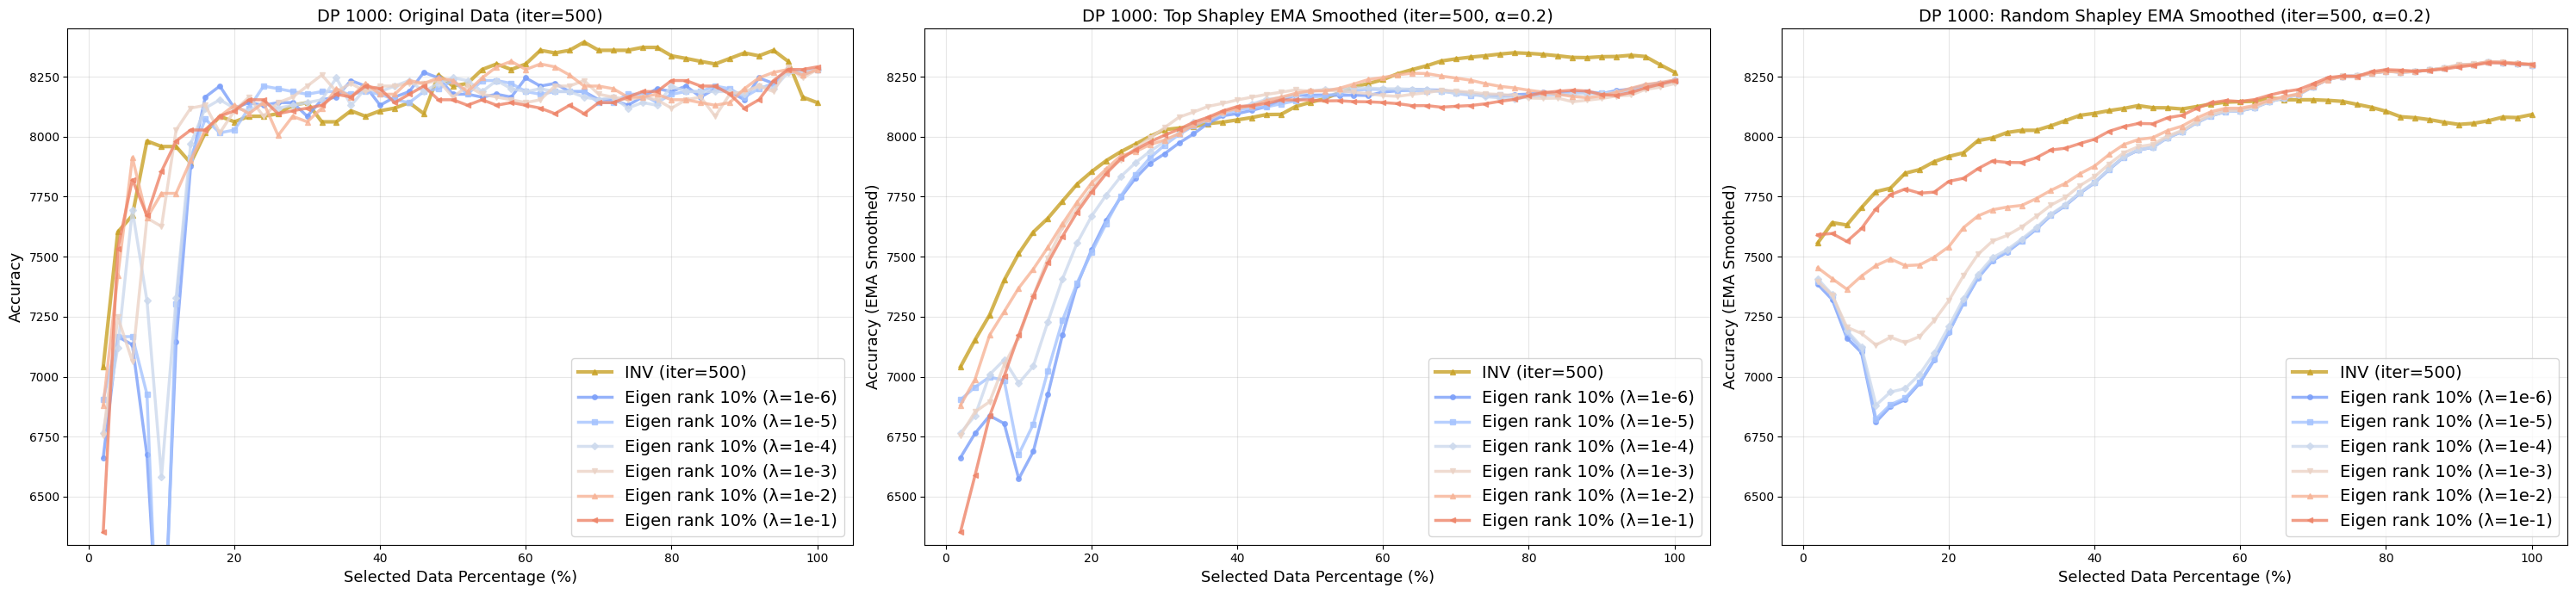

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# ===== Configuration =====
num_dp = 1000
rank = 10
iteration = 500
# =========================

def ema_smooth(data, alpha=0.2):
    """Apply Exponential Moving Average smoothing."""
    ema = [data[0]]
    for i in range(1, len(data)):
        ema.append(alpha * data[i] + (1 - alpha) * ema[-1])
    return ema

selected_dp_percent = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100]

# Prediction with top shapley values
inv_data      = [7041, 7603, 7672, 7982, 7959, 7959, 7890, 8016, 8085, 8062, 8085, 8085, 8096, 8131, 8142, 8062, 8062, 8108, 8085, 8108, 8119, 8142, 8096, 8257, 8211, 8222, 8280, 8303, 8280, 8303, 8360, 8349, 8360, 8394, 8360, 8360, 8360, 8372, 8372, 8337, 8326, 8314, 8303, 8326, 8349, 8337, 8360, 8314, 8165, 8142]
eigen_lam1e_6 = [6663, 7167, 7133, 6674, 5654, 7144, 7878, 8165, 8211, 8119, 8142, 8131, 8142, 8142, 8085, 8154, 8165, 8234, 8211, 8131, 8165, 8188, 8268, 8245, 8177, 8177, 8165, 8177, 8165, 8245, 8211, 8222, 8188, 8188, 8154, 8154, 8131, 8165, 8200, 8188, 8211, 8165, 8200, 8188, 8154, 8245, 8222, 8280, 8257, 8280]
eigen_lam1e_5 = [6904, 7167, 7167, 6927, 5447, 7305, 7913, 8073, 8016, 8028, 8119, 8211, 8200, 8188, 8177, 8188, 8188, 8177, 8188, 8177, 8154, 8142, 8188, 8200, 8234, 8177, 8234, 8234, 8222, 8188, 8177, 8188, 8188, 8188, 8142, 8142, 8177, 8177, 8142, 8177, 8188, 8188, 8211, 8200, 8165, 8200, 8222, 8280, 8268, 8280]
eigen_lam1e_4 = [6766, 7122, 7695, 7317, 6583, 7328, 7970, 8119, 8154, 8119, 8108, 8142, 8119, 8131, 8142, 8154, 8245, 8131, 8200, 8188, 8211, 8234, 8188, 8222, 8245, 8234, 8188, 8234, 8200, 8188, 8200, 8188, 8188, 8165, 8154, 8165, 8119, 8142, 8131, 8211, 8188, 8188, 8188, 8188, 8177, 8211, 8200, 8268, 8268, 8280]
eigen_lam1e_3 = [6755, 7248, 7064, 7661, 7626, 8028, 8119, 8131, 8016, 8108, 8165, 8085, 8142, 8165, 8211, 8257, 8188, 8222, 8188, 8211, 8211, 8222, 8222, 8234, 8165, 8211, 8177, 8165, 8154, 8142, 8154, 8211, 8211, 8234, 8177, 8165, 8154, 8165, 8154, 8119, 8154, 8165, 8085, 8177, 8188, 8211, 8188, 8291, 8245, 8280]
eigen_lam1e_2 = [6881, 7420, 7913, 7661, 7764, 7764, 7901, 8028, 8085, 8131, 8096, 8142, 8005, 8085, 8062, 8119, 8200, 8165, 8222, 8177, 8177, 8234, 8222, 8245, 8234, 8188, 8245, 8291, 8314, 8280, 8303, 8291, 8257, 8211, 8211, 8200, 8165, 8165, 8177, 8154, 8154, 8142, 8131, 8142, 8200, 8245, 8268, 8280, 8257, 8280]
eigen_lam1e_1 = [6353, 7534, 7821, 7672, 7856, 7982, 8028, 8028, 8085, 8108, 8154, 8154, 8096, 8108, 8119, 8131, 8177, 8165, 8211, 8200, 8142, 8177, 8211, 8154, 8154, 8131, 8154, 8131, 8142, 8131, 8119, 8096, 8131, 8096, 8142, 8142, 8165, 8188, 8188, 8234, 8234, 8211, 8211, 8177, 8119, 8154, 8234, 8280, 8280, 8291]

# Prediction with random shapley values
r_inv_data      = [7557, 7982, 7592, 7993, 8039, 7844, 8096, 7924, 8028, 8005, 7993, 8188, 8039, 8108, 8062, 8028, 8119, 8154, 8177, 8131, 8154, 8154, 8177, 8085, 8119, 8096, 8165, 8177, 8177, 8154, 8154, 8222, 8119, 8154, 8154, 8142, 8131, 8085, 8073, 8039, 7993, 8062, 8039, 8016, 8016, 8073, 8108, 8142, 8073, 8142]
r_eigen_lam1e_6 = [7385, 7064, 6525, 6858, 5654, 7133, 7018, 7248, 7454, 7649, 7787, 7833, 7775, 7661, 7752, 7810, 7901, 7878, 7970, 7982, 8085, 8119, 8062, 8005, 8154, 8119, 8211, 8200, 8177, 8119, 8177, 8245, 8222, 8234, 8337, 8360, 8303, 8257, 8314, 8303, 8257, 8280, 8303, 8314, 8349, 8314, 8349, 8303, 8280, 8280]
r_eigen_lam1e_5 = [7397, 7087, 6583, 6846, 5654, 7122, 7018, 7248, 7454, 7649, 7787, 7833, 7775, 7661, 7752, 7810, 7901, 7878, 7970, 7982, 8085, 8119, 8062, 8005, 8154, 8119, 8211, 8200, 8177, 8119, 8177, 8245, 8222, 8234, 8337, 8360, 8303, 8257, 8314, 8303, 8257, 8280, 8303, 8314, 8349, 8314, 8349, 8303, 8280, 8280]
r_eigen_lam1e_4 = [7408, 7076, 6594, 6858, 5906, 7156, 7007, 7248, 7454, 7649, 7787, 7833, 7775, 7661, 7752, 7810, 7901, 7878, 7970, 7982, 8085, 8119, 8062, 8005, 8154, 8119, 8211, 8200, 8177, 8119, 8177, 8245, 8222, 8234, 8337, 8360, 8303, 8257, 8314, 8303, 8257, 8280, 8303, 8314, 8349, 8314, 8349, 8303, 8280, 8280]
r_eigen_lam1e_3 = [7397, 7110, 6674, 7076, 6938, 7294, 7053, 7271, 7500, 7649, 7833, 7867, 7787, 7683, 7764, 7844, 7901, 7878, 7993, 7982, 8096, 8119, 8062, 8005, 8142, 8119, 8211, 8211, 8177, 8119, 8177, 8245, 8222, 8234, 8337, 8360, 8303, 8257, 8314, 8303, 8257, 8280, 8303, 8326, 8349, 8314, 8349, 8303, 8280, 8280]
r_eigen_lam1e_2 = [7454, 7225, 7190, 7638, 7638, 7603, 7351, 7477, 7626, 7718, 7936, 7867, 7798, 7752, 7741, 7856, 7913, 7924, 8005, 8005, 8119, 8131, 8073, 8028, 8142, 8119, 8211, 8211, 8177, 8119, 8177, 8245, 8222, 8222, 8337, 8349, 8303, 8257, 8314, 8303, 8257, 8280, 8303, 8314, 8349, 8314, 8360, 8303, 8291, 8280]
r_eigen_lam1e_1 = [7592, 7615, 7431, 7833, 8028, 7993, 7878, 7695, 7787, 7993, 7878, 8028, 8028, 7867, 7890, 7993, 8073, 7982, 8050, 8062, 8154, 8119, 8108, 8050, 8177, 8131, 8234, 8234, 8188, 8131, 8188, 8245, 8245, 8234, 8314, 8349, 8280, 8245, 8349, 8314, 8268, 8257, 8291, 8303, 8326, 8326, 8349, 8303, 8291, 8291]

# Apply EMA smoothing for top shapley values
alpha = 0.2  # smoothing factor (0.1-0.3 typically works well)
inv_ema = ema_smooth(inv_data, alpha)
eigen_ema_1e6 = ema_smooth(eigen_lam1e_6, alpha)
eigen_ema_1e5 = ema_smooth(eigen_lam1e_5, alpha)
eigen_ema_1e4 = ema_smooth(eigen_lam1e_4, alpha)
eigen_ema_1e3 = ema_smooth(eigen_lam1e_3, alpha)
eigen_ema_1e2 = ema_smooth(eigen_lam1e_2, alpha)
eigen_ema_1e1 = ema_smooth(eigen_lam1e_1, alpha)

# Apply EMA smoothing for random shapley values
r_inv_ema = ema_smooth(r_inv_data, alpha) if r_inv_data else []
r_eigen_ema_1e6 = ema_smooth(r_eigen_lam1e_6, alpha) if r_eigen_lam1e_6 else []
r_eigen_ema_1e5 = ema_smooth(r_eigen_lam1e_5, alpha) if r_eigen_lam1e_5 else []
r_eigen_ema_1e4 = ema_smooth(r_eigen_lam1e_4, alpha) if r_eigen_lam1e_4 else []
r_eigen_ema_1e3 = ema_smooth(r_eigen_lam1e_3, alpha) if r_eigen_lam1e_3 else []
r_eigen_ema_1e2 = ema_smooth(r_eigen_lam1e_2, alpha) if r_eigen_lam1e_2 else []
r_eigen_ema_1e1 = ema_smooth(r_eigen_lam1e_1, alpha) if r_eigen_lam1e_1 else []

# Create figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(30, 7))

# Lambda configs
lambda_configs_orig = [
    (eigen_lam1e_6, '1e-6', 'o'),
    (eigen_lam1e_5, '1e-5', 's'),
    (eigen_lam1e_4, '1e-4', 'D'),
    (eigen_lam1e_3, '1e-3', 'v'),
    (eigen_lam1e_2, '1e-2', '^'),
    (eigen_lam1e_1, '1e-1', '<'),
]

lambda_configs_ema = [
    (eigen_ema_1e6, '1e-6', 'o'),
    (eigen_ema_1e5, '1e-5', 's'),
    (eigen_ema_1e4, '1e-4', 'D'),
    (eigen_ema_1e3, '1e-3', 'v'),
    (eigen_ema_1e2, '1e-2', '^'),
    (eigen_ema_1e1, '1e-1', '<'),
]

lambda_configs_random_ema = [
    (r_eigen_ema_1e6, '1e-6', 'o'),
    (r_eigen_ema_1e5, '1e-5', 's'),
    (r_eigen_ema_1e4, '1e-4', 'D'),
    (r_eigen_ema_1e3, '1e-3', 'v'),
    (r_eigen_ema_1e2, '1e-2', '^'),
    (r_eigen_ema_1e1, '1e-1', '<'),
]

colors = plt.cm.coolwarm(np.linspace(0.2, 0.8, len(lambda_configs_orig)))

# ===== Left subplot (1,1): Original data =====
ax_left = axes[0]

# Plot baseline (Original)
ax_left.plot(selected_dp_percent, inv_data, 
         color='#C9A227', linewidth=3, linestyle='-', 
         label=f'INV (iter={iteration})', marker='^', markersize=5, alpha=0.8)

# Plot eigen with different lambda values (Original)
for i, (data, lam_label, marker) in enumerate(lambda_configs_orig):
    ax_left.plot(selected_dp_percent, data, 
             color=colors[i], linewidth=2.5, linestyle='-', 
             label=f'Eigen rank {rank}% (λ={lam_label})', 
             marker=marker, markersize=4, alpha=0.8)

ax_left.set_xlabel('Selected Data Percentage (%)', fontsize=13)
ax_left.set_ylabel('Accuracy', fontsize=13)
ax_left.set_title(f'DP {num_dp}: Original Data (iter={iteration})', fontsize=14)
ax_left.set_ylim(6300, 8450)
ax_left.legend(fontsize=14, loc='best')
ax_left.grid(True, alpha=0.3)

# ===== Middle subplot (1,2): Top Shapley EMA smoothed =====
ax_middle = axes[1]

# Plot baseline (EMA)
ax_middle.plot(selected_dp_percent, inv_ema, 
         color='#C9A227', linewidth=3, linestyle='-', 
         label=f'INV (iter={iteration})', marker='^', markersize=5, alpha=0.8)

# Plot eigen with different lambda values (EMA)
for i, (data, lam_label, marker) in enumerate(lambda_configs_ema):
    ax_middle.plot(selected_dp_percent, data, 
             color=colors[i], linewidth=2.5, linestyle='-', 
             label=f'Eigen rank {rank}% (λ={lam_label})', 
             marker=marker, markersize=4, alpha=0.8)

ax_middle.set_xlabel('Selected Data Percentage (%)', fontsize=13)
ax_middle.set_ylabel('Accuracy (EMA Smoothed)', fontsize=13)
ax_middle.set_title(f'DP {num_dp}: Top Shapley EMA Smoothed (iter={iteration}, α={alpha})', fontsize=14)
ax_middle.set_ylim(6300, 8450)
ax_middle.legend(fontsize=14, loc='best')
ax_middle.grid(True, alpha=0.3)

# ===== Right subplot (1,3): Random Shapley EMA smoothed =====
ax_right = axes[2]

# Plot baseline (Random EMA)
if r_inv_ema:
    ax_right.plot(selected_dp_percent, r_inv_ema, 
             color='#C9A227', linewidth=3, linestyle='-', 
             label=f'INV (iter={iteration})', marker='^', markersize=5, alpha=0.8)

# Plot eigen with different lambda values (Random EMA)
for i, (data, lam_label, marker) in enumerate(lambda_configs_random_ema):
    if data:  # Only plot if data exists
        ax_right.plot(selected_dp_percent, data, 
                 color=colors[i], linewidth=2.5, linestyle='-', 
                 label=f'Eigen rank {rank}% (λ={lam_label})', 
                 marker=marker, markersize=4, alpha=0.8)

ax_right.set_xlabel('Selected Data Percentage (%)', fontsize=13)
ax_right.set_ylabel('Accuracy (EMA Smoothed)', fontsize=13)
ax_right.set_title(f'DP {num_dp}: Random Shapley EMA Smoothed (iter={iteration}, α={alpha})', fontsize=14)
ax_right.set_ylim(6300, 8450)
ax_right.legend(fontsize=14, loc='best')
ax_right.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

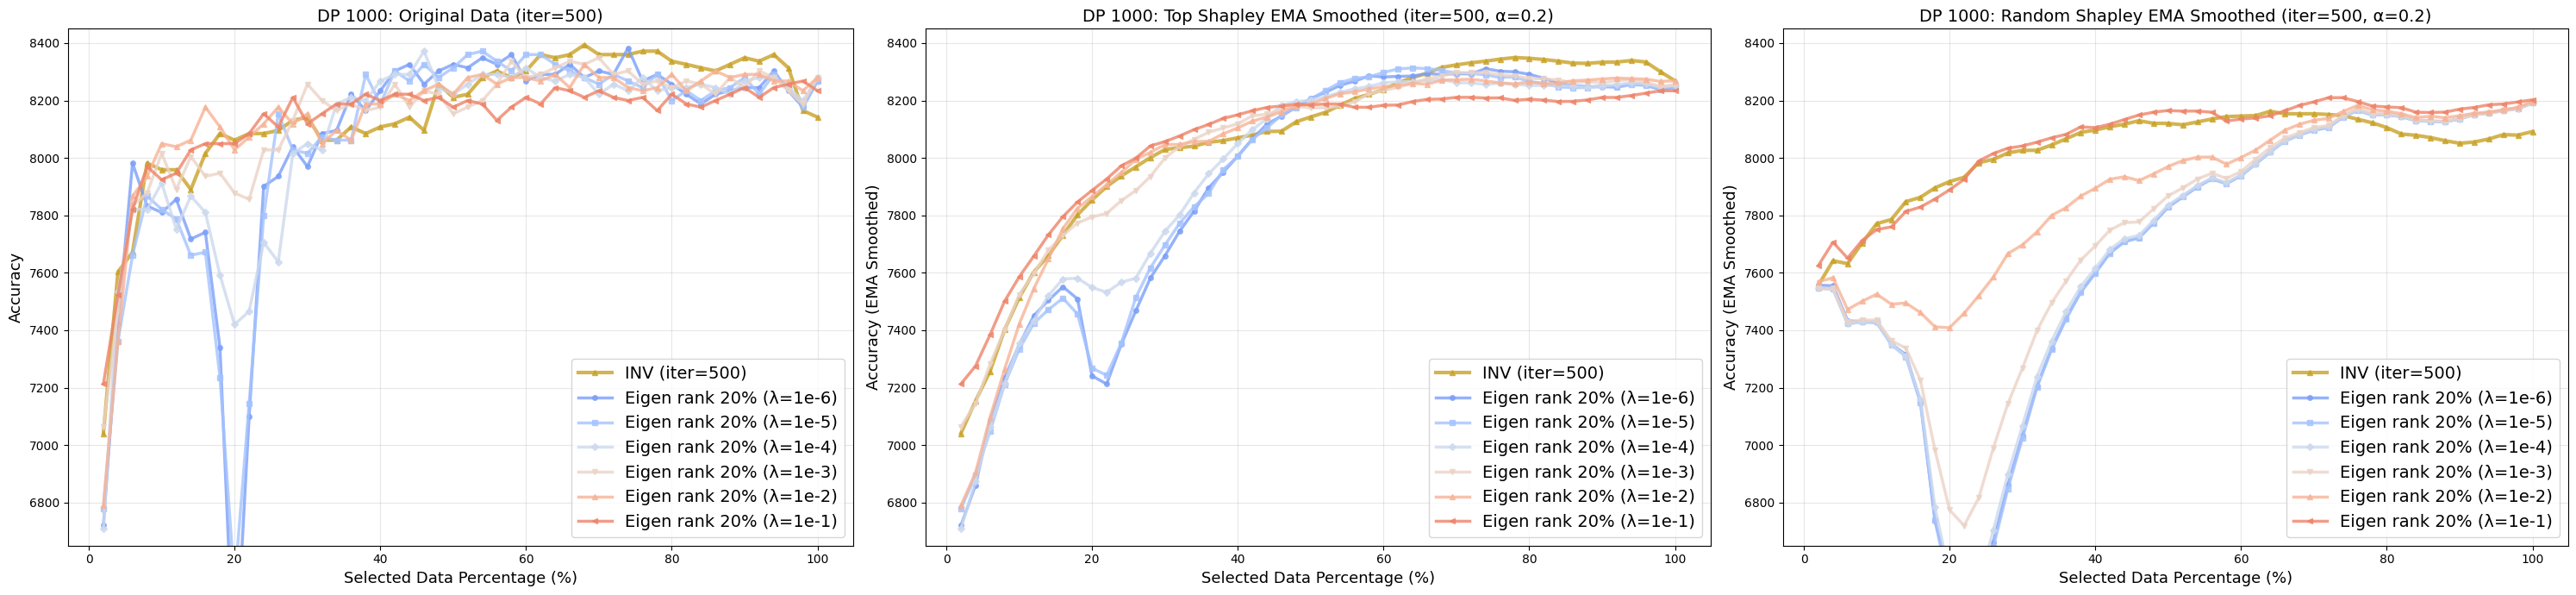

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# ===== Configuration =====
num_dp = 1000
rank = 20
iteration = 500
# =========================

def ema_smooth(data, alpha=0.2):
    """Apply Exponential Moving Average smoothing."""
    ema = [data[0]]
    for i in range(1, len(data)):
        ema.append(alpha * data[i] + (1 - alpha) * ema[-1])
    return ema

selected_dp_percent = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100]

# Prediction with top shapley values
inv_data      = [7041, 7603, 7672, 7982, 7959, 7959, 7890, 8016, 8085, 8062, 8085, 8085, 8096, 8131, 8142, 8062, 8062, 8108, 8085, 8108, 8119, 8142, 8096, 8257, 8211, 8222, 8280, 8303, 8280, 8303, 8360, 8349, 8360, 8394, 8360, 8360, 8360, 8372, 8372, 8337, 8326, 8314, 8303, 8326, 8349, 8337, 8360, 8314, 8165, 8142]
eigen_lam1e_6 = [6720, 7420, 7982, 7833, 7810, 7856, 7718, 7741, 7339, 6170, 7099, 7901, 7936, 8039, 7970, 8085, 8096, 8222, 8165, 8234, 8303, 8326, 8257, 8303, 8326, 8314, 8349, 8326, 8360, 8268, 8291, 8291, 8326, 8280, 8303, 8291, 8383, 8268, 8291, 8257, 8222, 8188, 8222, 8234, 8245, 8245, 8303, 8234, 8177, 8268]
eigen_lam1e_5 = [6778, 7362, 7661, 7867, 7821, 7787, 7661, 7672, 7236, 6514, 7144, 7798, 8154, 8028, 8016, 8073, 8062, 8062, 8291, 8188, 8303, 8268, 8326, 8280, 8314, 8360, 8372, 8337, 8303, 8360, 8360, 8326, 8303, 8280, 8257, 8291, 8268, 8245, 8291, 8200, 8234, 8200, 8234, 8245, 8280, 8222, 8291, 8245, 8177, 8268]
eigen_lam1e_4 = [6709, 7534, 7821, 7821, 7913, 7752, 7867, 7810, 7592, 7420, 7466, 7706, 7638, 8016, 8050, 8028, 8188, 8211, 8200, 8268, 8291, 8291, 8372, 8245, 8222, 8257, 8291, 8291, 8280, 8314, 8280, 8268, 8291, 8280, 8222, 8257, 8234, 8280, 8234, 8245, 8245, 8257, 8245, 8222, 8268, 8280, 8280, 8245, 8200, 8280]
eigen_lam1e_3 = [7064, 7466, 7833, 7878, 8016, 7890, 8005, 7936, 7947, 7878, 7856, 8028, 8028, 8131, 8257, 8200, 8165, 8188, 8165, 8177, 8257, 8177, 8234, 8222, 8154, 8177, 8200, 8257, 8337, 8280, 8291, 8314, 8337, 8326, 8349, 8291, 8303, 8257, 8268, 8245, 8268, 8257, 8222, 8280, 8245, 8303, 8280, 8234, 8188, 8280]
eigen_lam1e_2 = [6789, 7362, 7867, 7936, 8050, 8039, 8062, 8177, 8108, 8028, 8073, 8119, 8177, 8119, 8154, 8050, 8096, 8062, 8188, 8188, 8222, 8200, 8234, 8257, 8222, 8280, 8291, 8257, 8280, 8280, 8268, 8291, 8245, 8326, 8280, 8280, 8245, 8234, 8245, 8291, 8234, 8268, 8303, 8280, 8291, 8291, 8268, 8268, 8234, 8280]
eigen_lam1e_1 = [7213, 7523, 7821, 7970, 7924, 7947, 8028, 8050, 8050, 8050, 8085, 8154, 8108, 8211, 8119, 8154, 8188, 8188, 8222, 8200, 8222, 8222, 8200, 8211, 8177, 8200, 8188, 8131, 8177, 8211, 8188, 8245, 8234, 8211, 8234, 8211, 8200, 8211, 8165, 8222, 8188, 8177, 8200, 8222, 8245, 8211, 8245, 8257, 8268, 8234]

# Prediction with random shapley values
r_inv_data      = [7557, 7982, 7592, 7993, 8039, 7844, 8096, 7924, 8028, 8005, 7993, 8188, 8039, 8108, 8062, 8028, 8119, 8154, 8177, 8131, 8154, 8154, 8177, 8085, 8119, 8096, 8165, 8177, 8177, 8154, 8154, 8222, 8119, 8154, 8154, 8142, 8131, 8085, 8073, 8039, 7993, 8062, 8039, 8016, 8016, 8073, 8108, 8142, 8073, 8142]
r_eigen_lam1e_6 = [7557, 7546, 6950, 7408, 7420, 7053, 7167, 6502, 5069, 5780, 5631, 6927, 7408, 7661, 7729, 7890, 7856, 7867, 7901, 7867, 7947, 7867, 7775, 7982, 8050, 8005, 8039, 8039, 7844, 8050, 8142, 8188, 8211, 8165, 8165, 8142, 8291, 8257, 8085, 8154, 8119, 8073, 8119, 8119, 8177, 8211, 8177, 8200, 8200, 8268]
r_eigen_lam1e_5 = [7546, 7534, 6938, 7454, 7431, 7030, 7144, 6502, 5103, 5528, 5688, 6927, 7408, 7661, 7729, 7913, 7856, 7867, 7901, 7867, 7947, 7867, 7775, 7982, 8050, 8005, 8039, 8039, 7844, 8050, 8142, 8188, 8211, 8165, 8165, 8142, 8291, 8257, 8085, 8154, 8119, 8073, 8119, 8119, 8177, 8211, 8177, 8200, 8200, 8268]
r_eigen_lam1e_4 = [7546, 7534, 6938, 7454, 7431, 7041, 7144, 6560, 5275, 5596, 5814, 6995, 7443, 7683, 7741, 7924, 7856, 7878, 7901, 7867, 7947, 7867, 7775, 7993, 8050, 8005, 8039, 8039, 7844, 8050, 8142, 8188, 8211, 8165, 8177, 8142, 8291, 8257, 8085, 8154, 8119, 8073, 8119, 8119, 8177, 8211, 8177, 8200, 8200, 8280]
r_eigen_lam1e_3 = [7546, 7546, 6961, 7466, 7431, 7076, 7236, 6778, 6009, 5940, 6502, 7202, 7683, 7764, 7764, 7924, 7878, 7878, 7936, 7890, 7970, 7878, 7787, 8005, 8050, 8005, 8050, 8028, 7856, 8050, 8165, 8200, 8200, 8165, 8177, 8142, 8291, 8268, 8085, 8154, 8119, 8073, 8119, 8119, 8177, 8200, 8177, 8200, 8200, 8280]
r_eigen_lam1e_2 = [7569, 7638, 7030, 7615, 7626, 7351, 7511, 7328, 7213, 7397, 7661, 7764, 7844, 7993, 7821, 7924, 8028, 7936, 8028, 8005, 8050, 7970, 7867, 8039, 8073, 8073, 8050, 8005, 7878, 8096, 8131, 8200, 8234, 8200, 8188, 8165, 8257, 8268, 8108, 8142, 8119, 8085, 8165, 8119, 8177, 8188, 8177, 8200, 8211, 8280]
r_eigen_lam1e_1 = [7626, 8028, 7431, 7959, 7901, 7798, 8028, 7890, 7970, 8016, 8073, 8245, 8119, 8108, 8073, 8108, 8131, 8131, 8211, 8096, 8165, 8200, 8211, 8200, 8188, 8154, 8165, 8142, 8005, 8165, 8154, 8177, 8234, 8257, 8245, 8268, 8211, 8142, 8119, 8165, 8165, 8096, 8154, 8165, 8211, 8200, 8222, 8200, 8222, 8234]

# Apply EMA smoothing for top shapley values
alpha = 0.2  # smoothing factor (0.1-0.3 typically works well)
inv_ema = ema_smooth(inv_data, alpha)
eigen_ema_1e6 = ema_smooth(eigen_lam1e_6, alpha)
eigen_ema_1e5 = ema_smooth(eigen_lam1e_5, alpha)
eigen_ema_1e4 = ema_smooth(eigen_lam1e_4, alpha)
eigen_ema_1e3 = ema_smooth(eigen_lam1e_3, alpha)
eigen_ema_1e2 = ema_smooth(eigen_lam1e_2, alpha)
eigen_ema_1e1 = ema_smooth(eigen_lam1e_1, alpha)

# Apply EMA smoothing for random shapley values
r_inv_ema = ema_smooth(r_inv_data, alpha) if r_inv_data else []
r_eigen_ema_1e6 = ema_smooth(r_eigen_lam1e_6, alpha) if r_eigen_lam1e_6 else []
r_eigen_ema_1e5 = ema_smooth(r_eigen_lam1e_5, alpha) if r_eigen_lam1e_5 else []
r_eigen_ema_1e4 = ema_smooth(r_eigen_lam1e_4, alpha) if r_eigen_lam1e_4 else []
r_eigen_ema_1e3 = ema_smooth(r_eigen_lam1e_3, alpha) if r_eigen_lam1e_3 else []
r_eigen_ema_1e2 = ema_smooth(r_eigen_lam1e_2, alpha) if r_eigen_lam1e_2 else []
r_eigen_ema_1e1 = ema_smooth(r_eigen_lam1e_1, alpha) if r_eigen_lam1e_1 else []

# Create figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(30, 7))

# Lambda configs
lambda_configs_orig = [
    (eigen_lam1e_6, '1e-6', 'o'),
    (eigen_lam1e_5, '1e-5', 's'),
    (eigen_lam1e_4, '1e-4', 'D'),
    (eigen_lam1e_3, '1e-3', 'v'),
    (eigen_lam1e_2, '1e-2', '^'),
    (eigen_lam1e_1, '1e-1', '<'),
]

lambda_configs_ema = [
    (eigen_ema_1e6, '1e-6', 'o'),
    (eigen_ema_1e5, '1e-5', 's'),
    (eigen_ema_1e4, '1e-4', 'D'),
    (eigen_ema_1e3, '1e-3', 'v'),
    (eigen_ema_1e2, '1e-2', '^'),
    (eigen_ema_1e1, '1e-1', '<'),
]

lambda_configs_random_ema = [
    (r_eigen_ema_1e6, '1e-6', 'o'),
    (r_eigen_ema_1e5, '1e-5', 's'),
    (r_eigen_ema_1e4, '1e-4', 'D'),
    (r_eigen_ema_1e3, '1e-3', 'v'),
    (r_eigen_ema_1e2, '1e-2', '^'),
    (r_eigen_ema_1e1, '1e-1', '<'),
]

colors = plt.cm.coolwarm(np.linspace(0.2, 0.8, len(lambda_configs_orig)))

# ===== Left subplot (1,1): Original data =====
ax_left = axes[0]

# Plot baseline (Original)
ax_left.plot(selected_dp_percent, inv_data, 
         color='#C9A227', linewidth=3, linestyle='-', 
         label=f'INV (iter={iteration})', marker='^', markersize=5, alpha=0.8)

# Plot eigen with different lambda values (Original)
for i, (data, lam_label, marker) in enumerate(lambda_configs_orig):
    ax_left.plot(selected_dp_percent, data, 
             color=colors[i], linewidth=2.5, linestyle='-', 
             label=f'Eigen rank {rank}% (λ={lam_label})', 
             marker=marker, markersize=4, alpha=0.8)

ax_left.set_xlabel('Selected Data Percentage (%)', fontsize=13)
ax_left.set_ylabel('Accuracy', fontsize=13)
ax_left.set_title(f'DP {num_dp}: Original Data (iter={iteration})', fontsize=14)
ax_left.set_ylim(6650, 8450)
ax_left.legend(fontsize=14, loc='best')
ax_left.grid(True, alpha=0.3)

# ===== Middle subplot (1,2): Top Shapley EMA smoothed =====
ax_middle = axes[1]

# Plot baseline (EMA)
ax_middle.plot(selected_dp_percent, inv_ema, 
         color='#C9A227', linewidth=3, linestyle='-', 
         label=f'INV (iter={iteration})', marker='^', markersize=5, alpha=0.8)

# Plot eigen with different lambda values (EMA)
for i, (data, lam_label, marker) in enumerate(lambda_configs_ema):
    ax_middle.plot(selected_dp_percent, data, 
             color=colors[i], linewidth=2.5, linestyle='-', 
             label=f'Eigen rank {rank}% (λ={lam_label})', 
             marker=marker, markersize=4, alpha=0.8)

ax_middle.set_xlabel('Selected Data Percentage (%)', fontsize=13)
ax_middle.set_ylabel('Accuracy (EMA Smoothed)', fontsize=13)
ax_middle.set_title(f'DP {num_dp}: Top Shapley EMA Smoothed (iter={iteration}, α={alpha})', fontsize=14)
ax_middle.set_ylim(6650, 8450)
ax_middle.legend(fontsize=14, loc='best')
ax_middle.grid(True, alpha=0.3)

# ===== Right subplot (1,3): Random Shapley EMA smoothed =====
ax_right = axes[2]

# Plot baseline (Random EMA)
if r_inv_ema:
    ax_right.plot(selected_dp_percent, r_inv_ema, 
             color='#C9A227', linewidth=3, linestyle='-', 
             label=f'INV (iter={iteration})', marker='^', markersize=5, alpha=0.8)

# Plot eigen with different lambda values (Random EMA)
for i, (data, lam_label, marker) in enumerate(lambda_configs_random_ema):
    if data:  # Only plot if data exists
        ax_right.plot(selected_dp_percent, data, 
                 color=colors[i], linewidth=2.5, linestyle='-', 
                 label=f'Eigen rank {rank}% (λ={lam_label})', 
                 marker=marker, markersize=4, alpha=0.8)

ax_right.set_xlabel('Selected Data Percentage (%)', fontsize=13)
ax_right.set_ylabel('Accuracy (EMA Smoothed)', fontsize=13)
ax_right.set_title(f'DP {num_dp}: Random Shapley EMA Smoothed (iter={iteration}, α={alpha})', fontsize=14)
ax_right.set_ylim(6650, 8450)
ax_right.legend(fontsize=14, loc='best')
ax_right.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

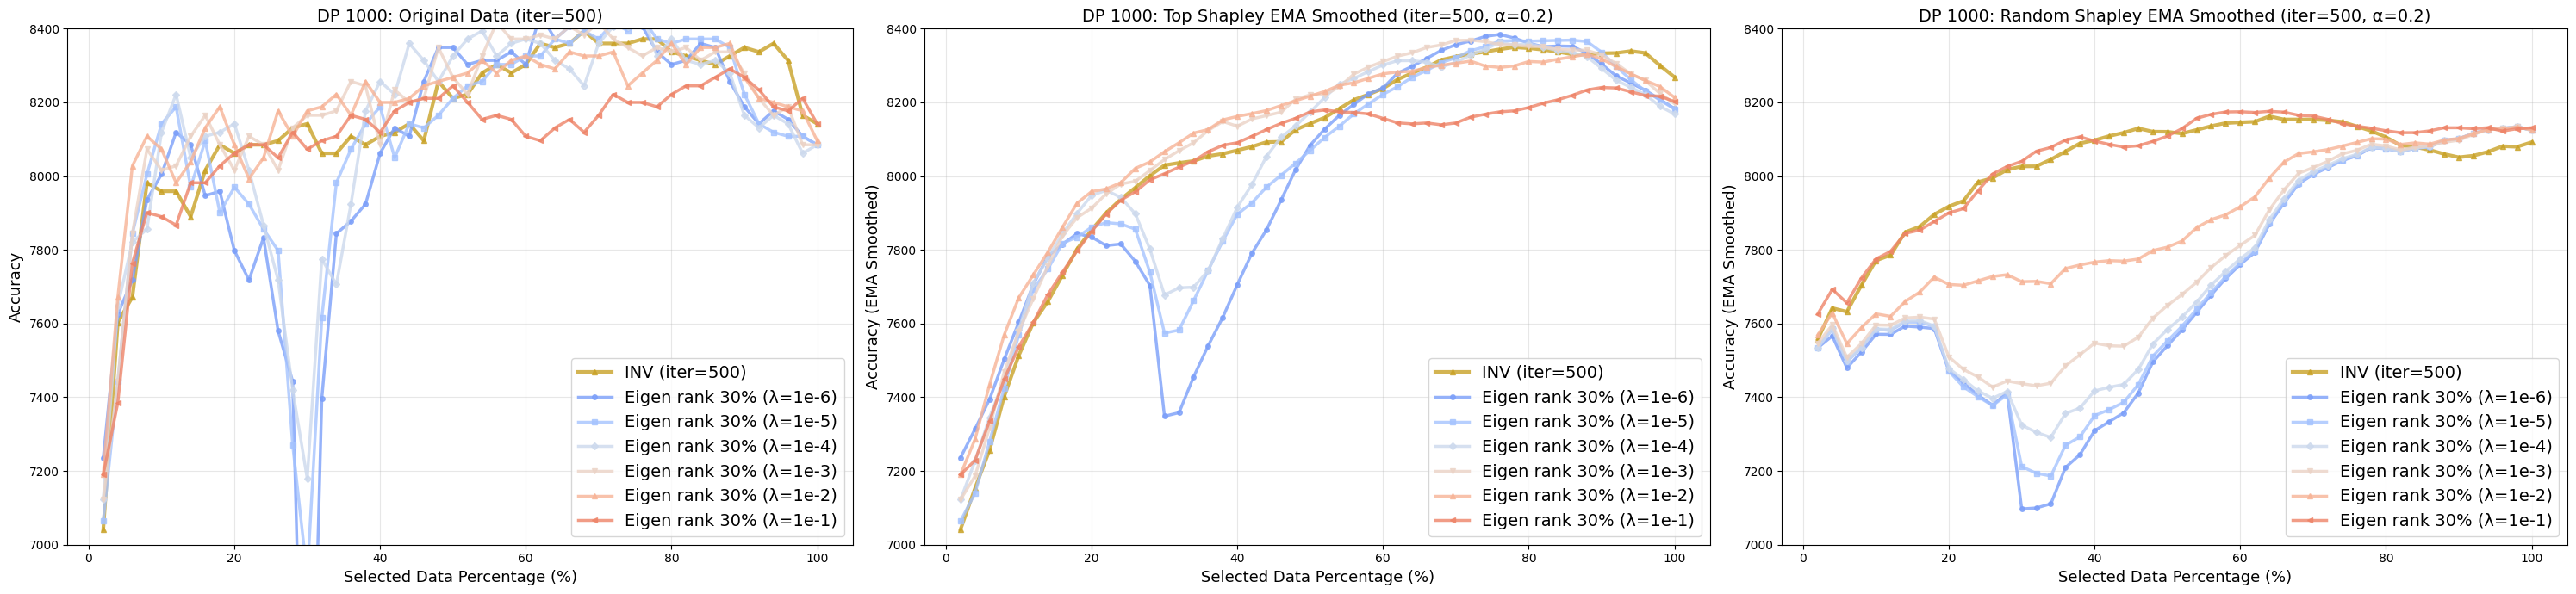

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# ===== Configuration =====
num_dp = 1000
rank = 30
iteration = 500
# =========================

def ema_smooth(data, alpha=0.2):
    """Apply Exponential Moving Average smoothing."""
    ema = [data[0]]
    for i in range(1, len(data)):
        ema.append(alpha * data[i] + (1 - alpha) * ema[-1])
    return ema

selected_dp_percent = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100]

# Prediction with top shapley values
inv_data      = [7041, 7603, 7672, 7982, 7959, 7959, 7890, 8016, 8085, 8062, 8085, 8085, 8096, 8131, 8142, 8062, 8062, 8108, 8085, 8108, 8119, 8142, 8096, 8257, 8211, 8222, 8280, 8303, 8280, 8303, 8360, 8349, 8360, 8394, 8360, 8360, 8360, 8372, 8372, 8337, 8326, 8314, 8303, 8326, 8349, 8337, 8360, 8314, 8165, 8142]
eigen_lam1e_6 = [7236, 7626, 7718, 7936, 8005, 8119, 8085, 7947, 7959, 7798, 7718, 7833, 7580, 7443, 5929, 7397, 7844, 7878, 7924, 8062, 8131, 8108, 8257, 8349, 8349, 8303, 8314, 8314, 8337, 8303, 8440, 8372, 8406, 8429, 8417, 8406, 8429, 8406, 8337, 8303, 8314, 8360, 8349, 8257, 8188, 8142, 8177, 8154, 8108, 8085]
eigen_lam1e_5 = [7064, 7443, 7844, 8005, 8142, 8188, 7970, 8096, 7901, 7970, 7924, 7856, 7798, 7271, 6915, 7615, 7982, 8073, 8142, 8188, 8050, 8142, 8131, 8165, 8211, 8245, 8257, 8303, 8303, 8326, 8326, 8372, 8360, 8394, 8372, 8417, 8394, 8429, 8372, 8360, 8372, 8372, 8372, 8349, 8222, 8142, 8119, 8108, 8108, 8085]
eigen_lam1e_4 = [7122, 7649, 7821, 7856, 8119, 8222, 8050, 8108, 8119, 8142, 8016, 7867, 7718, 7420, 7179, 7775, 7706, 7924, 8177, 8257, 8222, 8360, 8314, 8257, 8326, 8372, 8394, 8326, 8360, 8372, 8360, 8314, 8291, 8245, 8360, 8406, 8406, 8440, 8326, 8372, 8314, 8303, 8314, 8280, 8165, 8131, 8165, 8142, 8062, 8085]
eigen_lam1e_3 = [7122, 7443, 7844, 8073, 8016, 8028, 8108, 8165, 8085, 8016, 8108, 8085, 8016, 8131, 8165, 8165, 8177, 8257, 8245, 8085, 8234, 8200, 8211, 8349, 8268, 8222, 8326, 8417, 8372, 8372, 8383, 8372, 8406, 8383, 8417, 8372, 8349, 8326, 8349, 8337, 8349, 8314, 8337, 8337, 8280, 8211, 8165, 8188, 8085, 8085]
eigen_lam1e_2 = [7190, 7672, 8028, 8108, 8073, 7982, 8039, 8131, 8188, 8085, 7993, 8050, 8177, 8108, 8177, 8188, 8222, 8165, 8257, 8200, 8200, 8211, 8245, 8257, 8268, 8280, 8314, 8280, 8314, 8326, 8303, 8291, 8337, 8326, 8326, 8337, 8245, 8280, 8314, 8360, 8303, 8349, 8349, 8360, 8268, 8211, 8200, 8188, 8177, 8096]
eigen_lam1e_1 = [7190, 7385, 7764, 7901, 7890, 7867, 7982, 7982, 8028, 8062, 8085, 8085, 8050, 8119, 8073, 8096, 8108, 8165, 8154, 8119, 8177, 8200, 8211, 8211, 8245, 8200, 8154, 8165, 8154, 8108, 8096, 8131, 8154, 8119, 8165, 8222, 8200, 8200, 8188, 8222, 8245, 8245, 8268, 8291, 8268, 8234, 8188, 8177, 8211, 8142]

# Prediction with random shapley values
r_inv_data      = [7557, 7982, 7592, 7993, 8039, 7844, 8096, 7924, 8028, 8005, 7993, 8188, 8039, 8108, 8062, 8028, 8119, 8154, 8177, 8131, 8154, 8154, 8177, 8085, 8119, 8096, 8165, 8177, 8177, 8154, 8154, 8222, 8119, 8154, 8154, 8142, 8131, 8085, 8073, 8039, 7993, 8062, 8039, 8016, 8016, 8073, 8108, 8142, 8073, 8142]
r_eigen_lam1e_6 = [7534, 7695, 7133, 7695, 7764, 7569, 7683, 7580, 7569, 7018, 7305, 7271, 7271, 7546, 5837, 7110, 7156, 7603, 7385, 7569, 7431, 7454, 7626, 7833, 7718, 7752, 7821, 7867, 7901, 7913, 7924, 8177, 8154, 8188, 8108, 8096, 8119, 8108, 8165, 8062, 8039, 8108, 8096, 8165, 8119, 8177, 8165, 8142, 8154, 8085]
r_eigen_lam1e_5 = [7534, 7787, 7144, 7683, 7787, 7569, 7695, 7603, 7546, 6984, 7259, 7294, 7282, 7523, 6433, 7122, 7156, 7603, 7385, 7580, 7431, 7466, 7626, 7821, 7718, 7752, 7821, 7867, 7901, 7913, 7924, 8177, 8154, 8188, 8108, 8096, 8119, 8108, 8165, 8062, 8039, 8108, 8096, 8165, 8119, 8177, 8165, 8142, 8154, 8085]
r_eigen_lam1e_4 = [7534, 7798, 7144, 7683, 7787, 7580, 7695, 7615, 7534, 7018, 7328, 7294, 7317, 7489, 6961, 7225, 7236, 7615, 7431, 7603, 7466, 7466, 7638, 7821, 7741, 7752, 7821, 7890, 7890, 7913, 7924, 8188, 8165, 8188, 8108, 8096, 8119, 8108, 8154, 8062, 8039, 8108, 8096, 8165, 8119, 8177, 8165, 8142, 8154, 8085]
r_eigen_lam1e_3 = [7546, 7798, 7156, 7695, 7798, 7592, 7695, 7626, 7592, 7099, 7339, 7374, 7317, 7511, 7408, 7408, 7466, 7672, 7638, 7672, 7511, 7534, 7661, 7821, 7787, 7798, 7844, 7913, 7913, 7924, 7947, 8188, 8177, 8188, 8085, 8108, 8142, 8108, 8154, 8062, 8028, 8108, 8096, 8131, 8119, 8177, 8177, 8142, 8154, 8085]
r_eigen_lam1e_2 = [7569, 7867, 7213, 7764, 7775, 7592, 7821, 7787, 7890, 7626, 7695, 7764, 7775, 7752, 7638, 7718, 7683, 7913, 7798, 7798, 7787, 7764, 7798, 7890, 7844, 7890, 8005, 7970, 7947, 8005, 8050, 8200, 8211, 8154, 8085, 8096, 8119, 8131, 8142, 8096, 8028, 8108, 8073, 8142, 8119, 8165, 8177, 8131, 8154, 8096]
r_eigen_lam1e_1 = [7626, 7959, 7511, 7993, 7982, 7878, 8039, 7890, 7970, 7993, 7959, 8154, 8188, 8108, 8096, 8177, 8119, 8177, 8142, 8050, 8050, 8050, 8096, 8142, 8165, 8211, 8268, 8211, 8200, 8177, 8165, 8188, 8165, 8131, 8154, 8119, 8096, 8108, 8108, 8096, 8096, 8119, 8142, 8165, 8131, 8119, 8142, 8085, 8154, 8142]

# Apply EMA smoothing for top shapley values
alpha = 0.2  # smoothing factor (0.1-0.3 typically works well)
inv_ema = ema_smooth(inv_data, alpha)
eigen_ema_1e6 = ema_smooth(eigen_lam1e_6, alpha)
eigen_ema_1e5 = ema_smooth(eigen_lam1e_5, alpha)
eigen_ema_1e4 = ema_smooth(eigen_lam1e_4, alpha)
eigen_ema_1e3 = ema_smooth(eigen_lam1e_3, alpha)
eigen_ema_1e2 = ema_smooth(eigen_lam1e_2, alpha)
eigen_ema_1e1 = ema_smooth(eigen_lam1e_1, alpha)

# Apply EMA smoothing for random shapley values
r_inv_ema = ema_smooth(r_inv_data, alpha) if r_inv_data else []
r_eigen_ema_1e6 = ema_smooth(r_eigen_lam1e_6, alpha) if r_eigen_lam1e_6 else []
r_eigen_ema_1e5 = ema_smooth(r_eigen_lam1e_5, alpha) if r_eigen_lam1e_5 else []
r_eigen_ema_1e4 = ema_smooth(r_eigen_lam1e_4, alpha) if r_eigen_lam1e_4 else []
r_eigen_ema_1e3 = ema_smooth(r_eigen_lam1e_3, alpha) if r_eigen_lam1e_3 else []
r_eigen_ema_1e2 = ema_smooth(r_eigen_lam1e_2, alpha) if r_eigen_lam1e_2 else []
r_eigen_ema_1e1 = ema_smooth(r_eigen_lam1e_1, alpha) if r_eigen_lam1e_1 else []

# Create figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(30, 7))

# Lambda configs
lambda_configs_orig = [
    (eigen_lam1e_6, '1e-6', 'o'),
    (eigen_lam1e_5, '1e-5', 's'),
    (eigen_lam1e_4, '1e-4', 'D'),
    (eigen_lam1e_3, '1e-3', 'v'),
    (eigen_lam1e_2, '1e-2', '^'),
    (eigen_lam1e_1, '1e-1', '<'),
]

lambda_configs_ema = [
    (eigen_ema_1e6, '1e-6', 'o'),
    (eigen_ema_1e5, '1e-5', 's'),
    (eigen_ema_1e4, '1e-4', 'D'),
    (eigen_ema_1e3, '1e-3', 'v'),
    (eigen_ema_1e2, '1e-2', '^'),
    (eigen_ema_1e1, '1e-1', '<'),
]

lambda_configs_random_ema = [
    (r_eigen_ema_1e6, '1e-6', 'o'),
    (r_eigen_ema_1e5, '1e-5', 's'),
    (r_eigen_ema_1e4, '1e-4', 'D'),
    (r_eigen_ema_1e3, '1e-3', 'v'),
    (r_eigen_ema_1e2, '1e-2', '^'),
    (r_eigen_ema_1e1, '1e-1', '<'),
]

colors = plt.cm.coolwarm(np.linspace(0.2, 0.8, len(lambda_configs_orig)))

# ===== Left subplot (1,1): Original data =====
ax_left = axes[0]

# Plot baseline (Original)
ax_left.plot(selected_dp_percent, inv_data, 
         color='#C9A227', linewidth=3, linestyle='-', 
         label=f'INV (iter={iteration})', marker='^', markersize=5, alpha=0.8)

# Plot eigen with different lambda values (Original)
for i, (data, lam_label, marker) in enumerate(lambda_configs_orig):
    ax_left.plot(selected_dp_percent, data, 
             color=colors[i], linewidth=2.5, linestyle='-', 
             label=f'Eigen rank {rank}% (λ={lam_label})', 
             marker=marker, markersize=4, alpha=0.8)

ax_left.set_xlabel('Selected Data Percentage (%)', fontsize=13)
ax_left.set_ylabel('Accuracy', fontsize=13)
ax_left.set_title(f'DP {num_dp}: Original Data (iter={iteration})', fontsize=14)
ax_left.set_ylim(7000, 8400)
ax_left.legend(fontsize=14, loc='best')
ax_left.grid(True, alpha=0.3)

# ===== Middle subplot (1,2): Top Shapley EMA smoothed =====
ax_middle = axes[1]

# Plot baseline (EMA)
ax_middle.plot(selected_dp_percent, inv_ema, 
         color='#C9A227', linewidth=3, linestyle='-', 
         label=f'INV (iter={iteration})', marker='^', markersize=5, alpha=0.8)

# Plot eigen with different lambda values (EMA)
for i, (data, lam_label, marker) in enumerate(lambda_configs_ema):
    ax_middle.plot(selected_dp_percent, data, 
             color=colors[i], linewidth=2.5, linestyle='-', 
             label=f'Eigen rank {rank}% (λ={lam_label})', 
             marker=marker, markersize=4, alpha=0.8)

ax_middle.set_xlabel('Selected Data Percentage (%)', fontsize=13)
ax_middle.set_ylabel('Accuracy (EMA Smoothed)', fontsize=13)
ax_middle.set_title(f'DP {num_dp}: Top Shapley EMA Smoothed (iter={iteration}, α={alpha})', fontsize=14)
ax_middle.set_ylim(7000, 8400)
ax_middle.legend(fontsize=14, loc='best')
ax_middle.grid(True, alpha=0.3)

# ===== Right subplot (1,3): Random Shapley EMA smoothed =====
ax_right = axes[2]

# Plot baseline (Random EMA)
if r_inv_ema:
    ax_right.plot(selected_dp_percent, r_inv_ema, 
             color='#C9A227', linewidth=3, linestyle='-', 
             label=f'INV (iter={iteration})', marker='^', markersize=5, alpha=0.8)

# Plot eigen with different lambda values (Random EMA)
for i, (data, lam_label, marker) in enumerate(lambda_configs_random_ema):
    if data:  # Only plot if data exists
        ax_right.plot(selected_dp_percent, data, 
                 color=colors[i], linewidth=2.5, linestyle='-', 
                 label=f'Eigen rank {rank}% (λ={lam_label})', 
                 marker=marker, markersize=4, alpha=0.8)

ax_right.set_xlabel('Selected Data Percentage (%)', fontsize=13)
ax_right.set_ylabel('Accuracy (EMA Smoothed)', fontsize=13)
ax_right.set_title(f'DP {num_dp}: Random Shapley EMA Smoothed (iter={iteration}, α={alpha})', fontsize=14)
ax_right.set_ylim(7000, 8400)
ax_right.legend(fontsize=14, loc='best')
ax_right.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

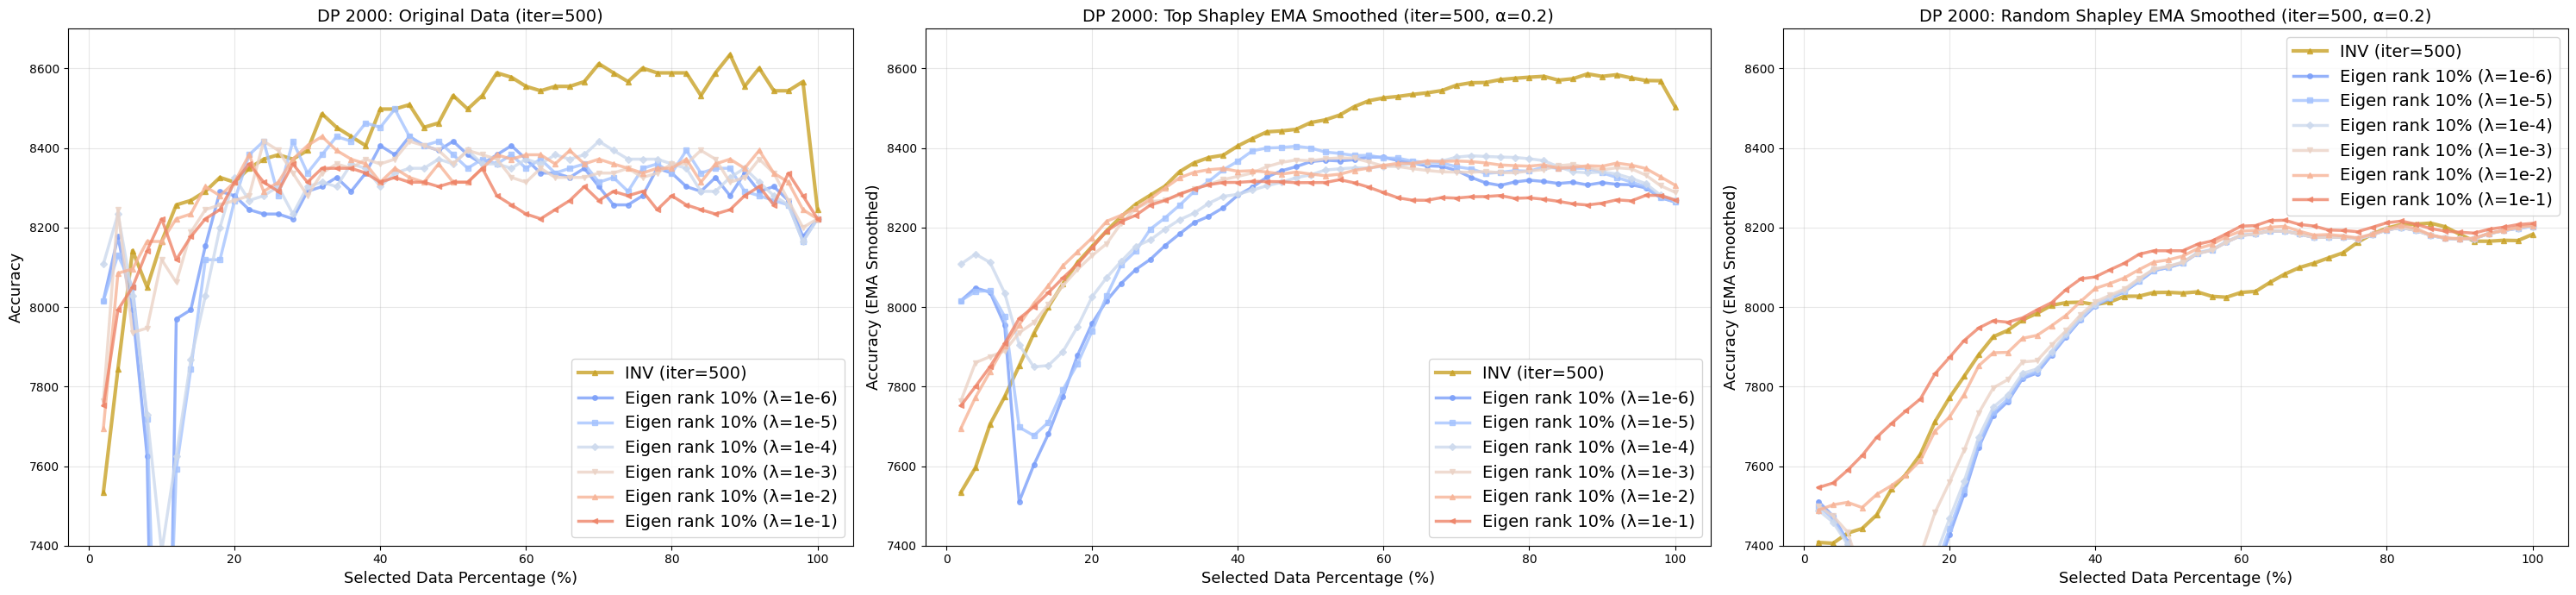

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# ===== Configuration =====
num_dp = 2000
rank = 10
iteration = 500
# =========================

def ema_smooth(data, alpha=0.2):
    """Apply Exponential Moving Average smoothing."""
    ema = [data[0]]
    for i in range(1, len(data)):
        ema.append(alpha * data[i] + (1 - alpha) * ema[-1])
    return ema

selected_dp_percent = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100]

# Prediction with top shapley values
inv_data      = [7534, 7844, 8142, 8050, 8165, 8257, 8268, 8291, 8326, 8314, 8349, 8372, 8383, 8372, 8394, 8486, 8452, 8429, 8406, 8498, 8498, 8509, 8452, 8463, 8532, 8498, 8532, 8589, 8578, 8555, 8544, 8555, 8555, 8567, 8612, 8589, 8567, 8601, 8589, 8589, 8589, 8532, 8589, 8635, 8555, 8601, 8544, 8544, 8567, 8245]
eigen_lam1e_6 = [8016, 8177, 7993, 7626, 5734, 7970, 7993, 8154, 8291, 8280, 8245, 8234, 8234, 8222, 8291, 8303, 8326, 8291, 8337, 8406, 8383, 8429, 8406, 8394, 8417, 8383, 8360, 8383, 8406, 8372, 8337, 8337, 8326, 8349, 8303, 8257, 8257, 8280, 8349, 8337, 8303, 8291, 8326, 8280, 8337, 8291, 8303, 8268, 8177, 8222]
eigen_lam1e_5 = [8016, 8131, 8050, 7718, 6583, 7592, 7844, 8119, 8119, 8268, 8383, 8417, 8280, 8417, 8337, 8383, 8429, 8417, 8463, 8452, 8498, 8429, 8406, 8417, 8383, 8349, 8372, 8360, 8383, 8349, 8372, 8337, 8349, 8360, 8314, 8326, 8291, 8349, 8360, 8337, 8394, 8337, 8349, 8349, 8291, 8280, 8268, 8257, 8165, 8222]
eigen_lam1e_4 = [8108, 8234, 8028, 7729, 7385, 7626, 7867, 8028, 8200, 8326, 8268, 8280, 8303, 8234, 8303, 8314, 8303, 8360, 8349, 8303, 8337, 8349, 8349, 8372, 8360, 8394, 8360, 8360, 8349, 8372, 8360, 8383, 8372, 8383, 8417, 8394, 8372, 8372, 8372, 8360, 8349, 8291, 8291, 8326, 8349, 8314, 8280, 8257, 8165, 8222]
eigen_lam1e_3 = [7764, 8245, 7936, 7947, 8119, 8062, 8188, 8245, 8257, 8268, 8280, 8417, 8394, 8337, 8280, 8337, 8360, 8349, 8372, 8360, 8372, 8417, 8406, 8394, 8360, 8394, 8383, 8372, 8326, 8314, 8349, 8326, 8326, 8326, 8337, 8337, 8349, 8326, 8337, 8360, 8360, 8394, 8372, 8314, 8326, 8372, 8337, 8268, 8200, 8222]
eigen_lam1e_2 = [7695, 8085, 8096, 8165, 8165, 8222, 8234, 8303, 8280, 8314, 8383, 8291, 8314, 8372, 8406, 8429, 8394, 8372, 8360, 8314, 8349, 8326, 8314, 8360, 8314, 8314, 8349, 8383, 8372, 8383, 8383, 8360, 8394, 8360, 8372, 8360, 8349, 8337, 8349, 8349, 8372, 8314, 8360, 8372, 8349, 8394, 8337, 8314, 8245, 8222]
eigen_lam1e_1 = [7752, 7993, 8050, 8142, 8222, 8119, 8177, 8222, 8245, 8314, 8360, 8314, 8291, 8360, 8314, 8349, 8349, 8349, 8337, 8314, 8326, 8314, 8314, 8303, 8314, 8314, 8349, 8280, 8257, 8234, 8222, 8245, 8268, 8303, 8268, 8291, 8280, 8291, 8245, 8280, 8257, 8245, 8234, 8245, 8280, 8303, 8257, 8337, 8280, 8222]

# Prediction with random shapley values
r_inv_data      = [7408, 7397, 7534, 7489, 7615, 7798, 7729, 7833, 8039, 8016, 8039, 8096, 8108, 8005, 8073, 8050, 8085, 8039, 8016, 7982, 8039, 8085, 8028, 8073, 8039, 8028, 8050, 7982, 8016, 8085, 8050, 8154, 8165, 8165, 8154, 8177, 8188, 8268, 8268, 8257, 8245, 8211, 8222, 8165, 8108, 8096, 8165, 8177, 8165, 8245]
r_eigen_lam1e_6 = [7511, 7328, 7156, 6697, 5619, 7053, 7385, 7752, 7856, 7856, 7936, 8119, 8050, 7901, 8050, 7890, 8062, 8108, 8142, 8142, 8096, 8108, 8165, 8200, 8131, 8154, 8234, 8177, 8245, 8245, 8200, 8222, 8188, 8154, 8142, 8177, 8177, 8154, 8222, 8245, 8222, 8165, 8131, 8142, 8165, 8177, 8234, 8222, 8222, 8222]
r_eigen_lam1e_5 = [7500, 7339, 7167, 6686, 5849, 7064, 7385, 7752, 7856, 7856, 7936, 8119, 8050, 7901, 8050, 7890, 8062, 8108, 8142, 8142, 8096, 8108, 8165, 8200, 8131, 8154, 8234, 8177, 8245, 8245, 8200, 8222, 8188, 8154, 8142, 8177, 8177, 8154, 8222, 8245, 8222, 8165, 8131, 8142, 8165, 8177, 8234, 8222, 8222, 8222]
r_eigen_lam1e_4 = [7489, 7339, 7179, 6709, 6170, 7122, 7374, 7741, 7867, 7856, 7936, 8119, 8050, 7901, 8050, 7890, 8062, 8108, 8142, 8142, 8096, 8108, 8177, 8200, 8131, 8154, 8234, 8177, 8245, 8245, 8200, 8222, 8188, 8154, 8142, 8177, 8177, 8154, 8222, 8245, 8222, 8165, 8131, 8142, 8165, 8177, 8234, 8222, 8222, 8222]
r_eigen_lam1e_3 = [7500, 7374, 7271, 6869, 6800, 7362, 7454, 7729, 7913, 7867, 7959, 8108, 8050, 7901, 8039, 7878, 8062, 8085, 8142, 8142, 8096, 8108, 8177, 8188, 8131, 8154, 8222, 8177, 8245, 8245, 8200, 8222, 8188, 8154, 8142, 8177, 8177, 8154, 8222, 8245, 8222, 8165, 8131, 8142, 8165, 8177, 8234, 8222, 8234, 8222]
r_eigen_lam1e_2 = [7489, 7557, 7534, 7443, 7661, 7638, 7683, 7764, 7982, 7867, 8005, 8142, 8016, 7890, 8062, 7959, 8050, 8085, 8154, 8177, 8108, 8131, 8177, 8188, 8142, 8165, 8222, 8200, 8257, 8245, 8200, 8234, 8211, 8142, 8142, 8188, 8165, 8154, 8222, 8245, 8245, 8165, 8119, 8142, 8165, 8177, 8234, 8222, 8234, 8222]
r_eigen_lam1e_1 = [7546, 7603, 7718, 7775, 7856, 7844, 7867, 7890, 8085, 8039, 8085, 8073, 8039, 7947, 8016, 8073, 8085, 8177, 8177, 8096, 8165, 8177, 8222, 8177, 8142, 8142, 8222, 8200, 8257, 8280, 8211, 8268, 8222, 8165, 8188, 8154, 8188, 8177, 8245, 8257, 8234, 8177, 8154, 8165, 8177, 8177, 8234, 8222, 8234, 8222]

# Apply EMA smoothing for top shapley values
alpha = 0.2  # smoothing factor (0.1-0.3 typically works well)
inv_ema = ema_smooth(inv_data, alpha)
eigen_ema_1e6 = ema_smooth(eigen_lam1e_6, alpha)
eigen_ema_1e5 = ema_smooth(eigen_lam1e_5, alpha)
eigen_ema_1e4 = ema_smooth(eigen_lam1e_4, alpha)
eigen_ema_1e3 = ema_smooth(eigen_lam1e_3, alpha)
eigen_ema_1e2 = ema_smooth(eigen_lam1e_2, alpha)
eigen_ema_1e1 = ema_smooth(eigen_lam1e_1, alpha)

# Apply EMA smoothing for random shapley values
r_inv_ema = ema_smooth(r_inv_data, alpha) if r_inv_data else []
r_eigen_ema_1e6 = ema_smooth(r_eigen_lam1e_6, alpha) if r_eigen_lam1e_6 else []
r_eigen_ema_1e5 = ema_smooth(r_eigen_lam1e_5, alpha) if r_eigen_lam1e_5 else []
r_eigen_ema_1e4 = ema_smooth(r_eigen_lam1e_4, alpha) if r_eigen_lam1e_4 else []
r_eigen_ema_1e3 = ema_smooth(r_eigen_lam1e_3, alpha) if r_eigen_lam1e_3 else []
r_eigen_ema_1e2 = ema_smooth(r_eigen_lam1e_2, alpha) if r_eigen_lam1e_2 else []
r_eigen_ema_1e1 = ema_smooth(r_eigen_lam1e_1, alpha) if r_eigen_lam1e_1 else []

# Create figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(30, 7))

# Lambda configs
lambda_configs_orig = [
    (eigen_lam1e_6, '1e-6', 'o'),
    (eigen_lam1e_5, '1e-5', 's'),
    (eigen_lam1e_4, '1e-4', 'D'),
    (eigen_lam1e_3, '1e-3', 'v'),
    (eigen_lam1e_2, '1e-2', '^'),
    (eigen_lam1e_1, '1e-1', '<'),
]

lambda_configs_ema = [
    (eigen_ema_1e6, '1e-6', 'o'),
    (eigen_ema_1e5, '1e-5', 's'),
    (eigen_ema_1e4, '1e-4', 'D'),
    (eigen_ema_1e3, '1e-3', 'v'),
    (eigen_ema_1e2, '1e-2', '^'),
    (eigen_ema_1e1, '1e-1', '<'),
]

lambda_configs_random_ema = [
    (r_eigen_ema_1e6, '1e-6', 'o'),
    (r_eigen_ema_1e5, '1e-5', 's'),
    (r_eigen_ema_1e4, '1e-4', 'D'),
    (r_eigen_ema_1e3, '1e-3', 'v'),
    (r_eigen_ema_1e2, '1e-2', '^'),
    (r_eigen_ema_1e1, '1e-1', '<'),
]

colors = plt.cm.coolwarm(np.linspace(0.2, 0.8, len(lambda_configs_orig)))

# ===== Left subplot (1,1): Original data =====
ax_left = axes[0]

# Plot baseline (Original)
ax_left.plot(selected_dp_percent, inv_data, 
         color='#C9A227', linewidth=3, linestyle='-', 
         label=f'INV (iter={iteration})', marker='^', markersize=5, alpha=0.8)

# Plot eigen with different lambda values (Original)
for i, (data, lam_label, marker) in enumerate(lambda_configs_orig):
    ax_left.plot(selected_dp_percent, data, 
             color=colors[i], linewidth=2.5, linestyle='-', 
             label=f'Eigen rank {rank}% (λ={lam_label})', 
             marker=marker, markersize=4, alpha=0.8)

ax_left.set_xlabel('Selected Data Percentage (%)', fontsize=13)
ax_left.set_ylabel('Accuracy', fontsize=13)
ax_left.set_title(f'DP {num_dp}: Original Data (iter={iteration})', fontsize=14)
ax_left.set_ylim(7400, 8700)
ax_left.legend(fontsize=14, loc='best')
ax_left.grid(True, alpha=0.3)

# ===== Middle subplot (1,2): Top Shapley EMA smoothed =====
ax_middle = axes[1]

# Plot baseline (EMA)
ax_middle.plot(selected_dp_percent, inv_ema, 
         color='#C9A227', linewidth=3, linestyle='-', 
         label=f'INV (iter={iteration})', marker='^', markersize=5, alpha=0.8)

# Plot eigen with different lambda values (EMA)
for i, (data, lam_label, marker) in enumerate(lambda_configs_ema):
    ax_middle.plot(selected_dp_percent, data, 
             color=colors[i], linewidth=2.5, linestyle='-', 
             label=f'Eigen rank {rank}% (λ={lam_label})', 
             marker=marker, markersize=4, alpha=0.8)

ax_middle.set_xlabel('Selected Data Percentage (%)', fontsize=13)
ax_middle.set_ylabel('Accuracy (EMA Smoothed)', fontsize=13)
ax_middle.set_title(f'DP {num_dp}: Top Shapley EMA Smoothed (iter={iteration}, α={alpha})', fontsize=14)
ax_middle.set_ylim(7400, 8700)
ax_middle.legend(fontsize=14, loc='best')
ax_middle.grid(True, alpha=0.3)

# ===== Right subplot (1,3): Random Shapley EMA smoothed =====
ax_right = axes[2]

# Plot baseline (Random EMA)
if r_inv_ema:
    ax_right.plot(selected_dp_percent, r_inv_ema, 
             color='#C9A227', linewidth=3, linestyle='-', 
             label=f'INV (iter={iteration})', marker='^', markersize=5, alpha=0.8)

# Plot eigen with different lambda values (Random EMA)
for i, (data, lam_label, marker) in enumerate(lambda_configs_random_ema):
    if data:  # Only plot if data exists
        ax_right.plot(selected_dp_percent, data, 
                 color=colors[i], linewidth=2.5, linestyle='-', 
                 label=f'Eigen rank {rank}% (λ={lam_label})', 
                 marker=marker, markersize=4, alpha=0.8)

ax_right.set_xlabel('Selected Data Percentage (%)', fontsize=13)
ax_right.set_ylabel('Accuracy (EMA Smoothed)', fontsize=13)
ax_right.set_title(f'DP {num_dp}: Random Shapley EMA Smoothed (iter={iteration}, α={alpha})', fontsize=14)
ax_right.set_ylim(7400, 8700)
ax_right.legend(fontsize=14, loc='best')
ax_right.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

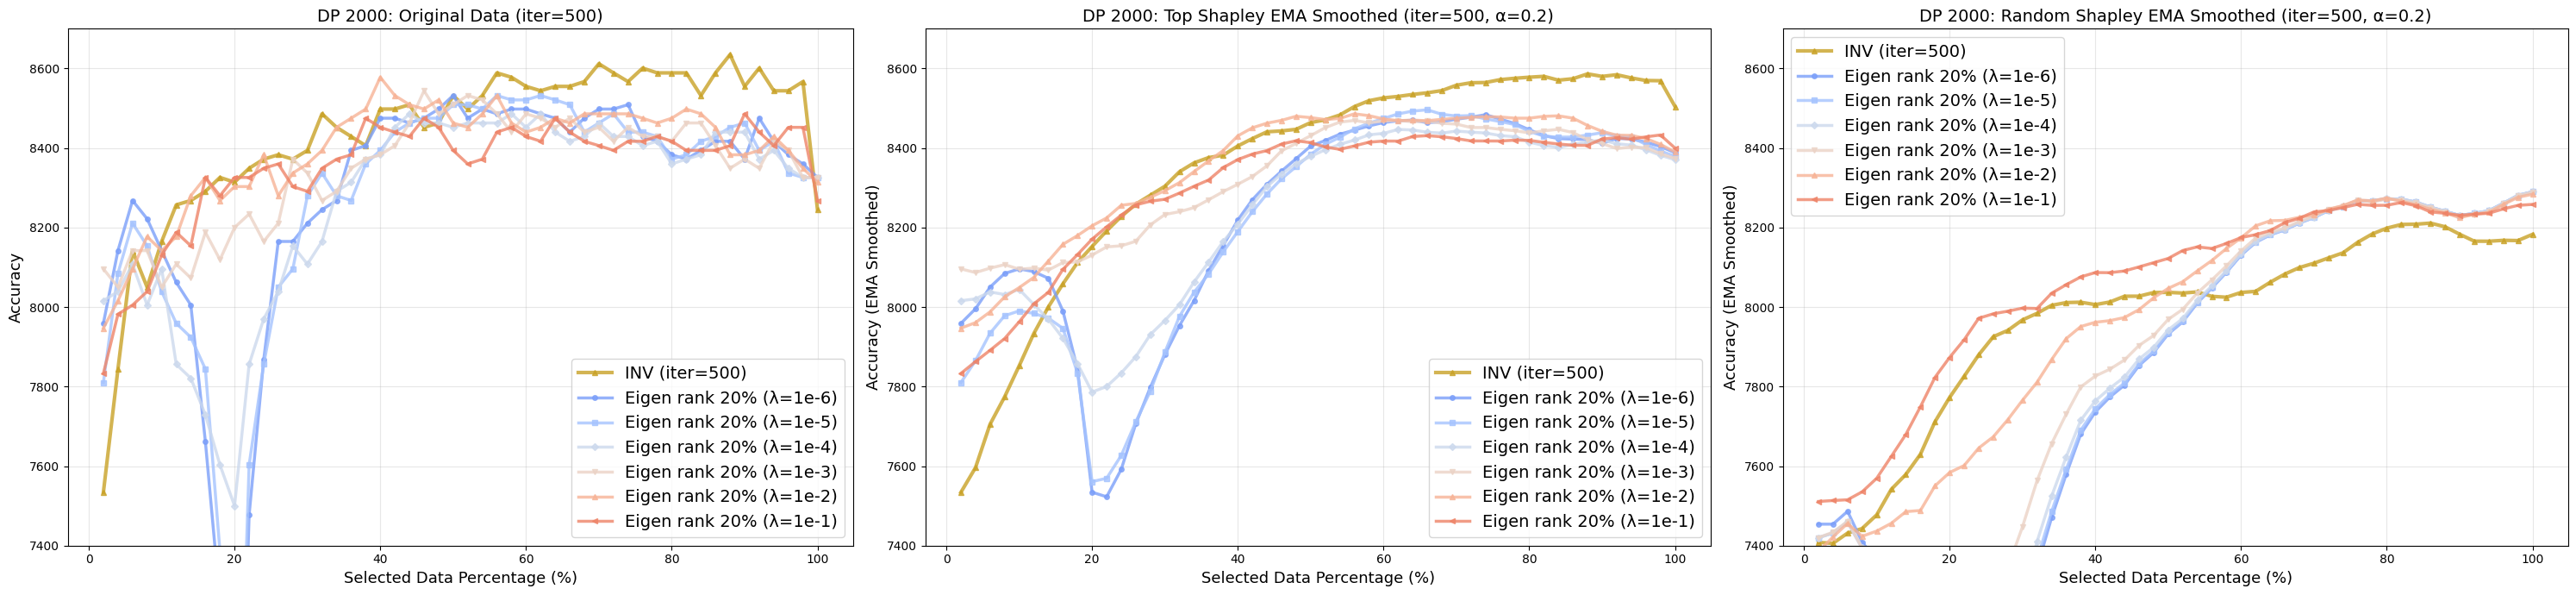

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# ===== Configuration =====
num_dp = 2000
rank = 20
iteration = 500
# =========================

def ema_smooth(data, alpha=0.2):
    """Apply Exponential Moving Average smoothing."""
    ema = [data[0]]
    for i in range(1, len(data)):
        ema.append(alpha * data[i] + (1 - alpha) * ema[-1])
    return ema

selected_dp_percent = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100]

# Prediction with top shapley values
inv_data      = [7534, 7844, 8142, 8050, 8165, 8257, 8268, 8291, 8326, 8314, 8349, 8372, 8383, 8372, 8394, 8486, 8452, 8429, 8406, 8498, 8498, 8509, 8452, 8463, 8532, 8498, 8532, 8589, 8578, 8555, 8544, 8555, 8555, 8567, 8612, 8589, 8567, 8601, 8589, 8589, 8589, 8532, 8589, 8635, 8555, 8601, 8544, 8544, 8567, 8245]
eigen_lam1e_6 = [7959, 8142, 8268, 8222, 8142, 8062, 8005, 7661, 7259, 6296, 7477, 7867, 8165, 8165, 8211, 8245, 8268, 8394, 8406, 8475, 8475, 8463, 8475, 8498, 8532, 8475, 8498, 8486, 8498, 8498, 8486, 8475, 8440, 8475, 8498, 8498, 8509, 8429, 8417, 8383, 8372, 8394, 8417, 8417, 8372, 8475, 8417, 8383, 8360, 8326]
eigen_lam1e_5 = [7810, 8085, 8211, 8154, 8039, 7959, 7924, 7844, 7385, 6468, 7603, 7856, 8050, 8096, 8280, 8337, 8280, 8268, 8360, 8394, 8440, 8463, 8475, 8475, 8509, 8509, 8498, 8532, 8521, 8521, 8532, 8521, 8509, 8440, 8463, 8486, 8440, 8440, 8429, 8372, 8383, 8417, 8429, 8452, 8463, 8394, 8417, 8337, 8326, 8326]
eigen_lam1e_4 = [8016, 8039, 8108, 8005, 8096, 7856, 7821, 7729, 7603, 7500, 7856, 7970, 8039, 8154, 8108, 8165, 8291, 8314, 8372, 8383, 8452, 8486, 8463, 8463, 8452, 8463, 8463, 8463, 8486, 8452, 8486, 8440, 8417, 8429, 8463, 8429, 8429, 8406, 8417, 8360, 8372, 8383, 8440, 8440, 8440, 8372, 8394, 8349, 8326, 8326]
eigen_lam1e_3 = [8096, 8050, 8142, 8142, 8050, 8108, 8073, 8188, 8119, 8200, 8234, 8165, 8211, 8372, 8337, 8268, 8291, 8349, 8372, 8383, 8406, 8463, 8544, 8486, 8509, 8532, 8521, 8486, 8440, 8486, 8475, 8452, 8475, 8440, 8452, 8417, 8452, 8429, 8429, 8417, 8463, 8463, 8406, 8349, 8372, 8349, 8417, 8394, 8326, 8326]
eigen_lam1e_2 = [7947, 8016, 8096, 8177, 8142, 8177, 8280, 8326, 8268, 8303, 8303, 8383, 8280, 8337, 8360, 8394, 8452, 8475, 8498, 8578, 8532, 8509, 8498, 8521, 8463, 8452, 8486, 8532, 8463, 8440, 8452, 8475, 8463, 8486, 8486, 8486, 8486, 8475, 8463, 8475, 8498, 8486, 8452, 8383, 8383, 8394, 8429, 8394, 8349, 8314]
eigen_lam1e_1 = [7833, 7982, 8005, 8039, 8131, 8188, 8154, 8326, 8280, 8326, 8326, 8349, 8360, 8303, 8291, 8349, 8372, 8383, 8475, 8452, 8440, 8429, 8475, 8452, 8394, 8360, 8372, 8440, 8452, 8429, 8417, 8475, 8440, 8417, 8406, 8394, 8417, 8417, 8429, 8417, 8394, 8394, 8394, 8406, 8486, 8440, 8406, 8452, 8452, 8268]

# Prediction with random shapley values
r_inv_data      = [7408, 7397, 7534, 7489, 7615, 7798, 7729, 7833, 8039, 8016, 8039, 8096, 8108, 8005, 8073, 8050, 8085, 8039, 8016, 7982, 8039, 8085, 8028, 8073, 8039, 8028, 8050, 7982, 8016, 8085, 8050, 8154, 8165, 8165, 8154, 8177, 8188, 8268, 8268, 8257, 8245, 8211, 8222, 8165, 8108, 8096, 8165, 8177, 8165, 8245]
r_eigen_lam1e_6 = [7454, 7454, 7615, 7099, 7179, 7179, 7305, 6892, 6778, 5596, 6525, 6915, 7397, 7466, 7798, 7993, 7970, 8016, 8085, 7959, 7924, 7924, 8050, 8016, 8119, 8085, 8200, 8200, 8245, 8303, 8291, 8257, 8245, 8280, 8280, 8314, 8291, 8326, 8268, 8291, 8268, 8234, 8200, 8200, 8188, 8257, 8268, 8337, 8360, 8326]
r_eigen_lam1e_5 = [7420, 7477, 7569, 7133, 7167, 7190, 7305, 6927, 6743, 5986, 6537, 6915, 7397, 7477, 7798, 7982, 7970, 8016, 8085, 7959, 7924, 7924, 8050, 8016, 8119, 8085, 8200, 8200, 8245, 8303, 8291, 8257, 8245, 8280, 8280, 8314, 8291, 8326, 8268, 8291, 8268, 8234, 8200, 8200, 8188, 8257, 8268, 8337, 8360, 8326]
r_eigen_lam1e_4 = [7420, 7477, 7580, 7133, 7179, 7202, 7317, 6938, 6789, 6353, 6755, 6972, 7420, 7477, 7810, 7982, 7982, 8016, 8085, 7959, 7924, 7936, 8050, 8016, 8119, 8085, 8200, 8200, 8245, 8303, 8291, 8257, 8245, 8280, 8280, 8314, 8291, 8326, 8268, 8291, 8268, 8234, 8200, 8200, 8188, 8257, 8268, 8337, 8360, 8326]
r_eigen_lam1e_3 = [7420, 7489, 7569, 7122, 7248, 7305, 7339, 7122, 7144, 7144, 7053, 7339, 7466, 7603, 7856, 8028, 8028, 8028, 8073, 7936, 7913, 7959, 8050, 8028, 8131, 8096, 8200, 8200, 8245, 8291, 8303, 8245, 8245, 8280, 8280, 8314, 8291, 8326, 8245, 8303, 8257, 8234, 8200, 8200, 8177, 8257, 8268, 8337, 8360, 8326]
r_eigen_lam1e_2 = [7385, 7569, 7592, 7294, 7489, 7534, 7603, 7500, 7798, 7718, 7672, 7821, 7787, 7890, 7959, 7993, 8096, 8131, 8073, 8005, 7982, 8005, 8073, 8142, 8142, 8131, 8200, 8222, 8268, 8280, 8326, 8268, 8222, 8257, 8257, 8303, 8291, 8326, 8257, 8303, 8234, 8222, 8200, 8200, 8177, 8268, 8257, 8337, 8349, 8314]
r_eigen_lam1e_1 = [7511, 7523, 7523, 7615, 7706, 7844, 7901, 8028, 8119, 8073, 8096, 8188, 8028, 8016, 8028, 7993, 8188, 8142, 8154, 8131, 8085, 8108, 8142, 8154, 8165, 8222, 8188, 8131, 8211, 8234, 8211, 8234, 8291, 8268, 8303, 8257, 8280, 8291, 8245, 8257, 8291, 8222, 8177, 8222, 8211, 8245, 8245, 8291, 8291, 8268]

# Apply EMA smoothing for top shapley values
alpha = 0.2  # smoothing factor (0.1-0.3 typically works well)
inv_ema = ema_smooth(inv_data, alpha)
eigen_ema_1e6 = ema_smooth(eigen_lam1e_6, alpha)
eigen_ema_1e5 = ema_smooth(eigen_lam1e_5, alpha)
eigen_ema_1e4 = ema_smooth(eigen_lam1e_4, alpha)
eigen_ema_1e3 = ema_smooth(eigen_lam1e_3, alpha)
eigen_ema_1e2 = ema_smooth(eigen_lam1e_2, alpha)
eigen_ema_1e1 = ema_smooth(eigen_lam1e_1, alpha)

# Apply EMA smoothing for random shapley values
r_inv_ema = ema_smooth(r_inv_data, alpha) if r_inv_data else []
r_eigen_ema_1e6 = ema_smooth(r_eigen_lam1e_6, alpha) if r_eigen_lam1e_6 else []
r_eigen_ema_1e5 = ema_smooth(r_eigen_lam1e_5, alpha) if r_eigen_lam1e_5 else []
r_eigen_ema_1e4 = ema_smooth(r_eigen_lam1e_4, alpha) if r_eigen_lam1e_4 else []
r_eigen_ema_1e3 = ema_smooth(r_eigen_lam1e_3, alpha) if r_eigen_lam1e_3 else []
r_eigen_ema_1e2 = ema_smooth(r_eigen_lam1e_2, alpha) if r_eigen_lam1e_2 else []
r_eigen_ema_1e1 = ema_smooth(r_eigen_lam1e_1, alpha) if r_eigen_lam1e_1 else []

# Create figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(30, 7))

# Lambda configs
lambda_configs_orig = [
    (eigen_lam1e_6, '1e-6', 'o'),
    (eigen_lam1e_5, '1e-5', 's'),
    (eigen_lam1e_4, '1e-4', 'D'),
    (eigen_lam1e_3, '1e-3', 'v'),
    (eigen_lam1e_2, '1e-2', '^'),
    (eigen_lam1e_1, '1e-1', '<'),
]

lambda_configs_ema = [
    (eigen_ema_1e6, '1e-6', 'o'),
    (eigen_ema_1e5, '1e-5', 's'),
    (eigen_ema_1e4, '1e-4', 'D'),
    (eigen_ema_1e3, '1e-3', 'v'),
    (eigen_ema_1e2, '1e-2', '^'),
    (eigen_ema_1e1, '1e-1', '<'),
]

lambda_configs_random_ema = [
    (r_eigen_ema_1e6, '1e-6', 'o'),
    (r_eigen_ema_1e5, '1e-5', 's'),
    (r_eigen_ema_1e4, '1e-4', 'D'),
    (r_eigen_ema_1e3, '1e-3', 'v'),
    (r_eigen_ema_1e2, '1e-2', '^'),
    (r_eigen_ema_1e1, '1e-1', '<'),
]

colors = plt.cm.coolwarm(np.linspace(0.2, 0.8, len(lambda_configs_orig)))

# ===== Left subplot (1,1): Original data =====
ax_left = axes[0]

# Plot baseline (Original)
ax_left.plot(selected_dp_percent, inv_data, 
         color='#C9A227', linewidth=3, linestyle='-', 
         label=f'INV (iter={iteration})', marker='^', markersize=5, alpha=0.8)

# Plot eigen with different lambda values (Original)
for i, (data, lam_label, marker) in enumerate(lambda_configs_orig):
    ax_left.plot(selected_dp_percent, data, 
             color=colors[i], linewidth=2.5, linestyle='-', 
             label=f'Eigen rank {rank}% (λ={lam_label})', 
             marker=marker, markersize=4, alpha=0.8)

ax_left.set_xlabel('Selected Data Percentage (%)', fontsize=13)
ax_left.set_ylabel('Accuracy', fontsize=13)
ax_left.set_title(f'DP {num_dp}: Original Data (iter={iteration})', fontsize=14)
ax_left.set_ylim(7400, 8700)
ax_left.legend(fontsize=14, loc='best')
ax_left.grid(True, alpha=0.3)

# ===== Middle subplot (1,2): Top Shapley EMA smoothed =====
ax_middle = axes[1]

# Plot baseline (EMA)
ax_middle.plot(selected_dp_percent, inv_ema, 
         color='#C9A227', linewidth=3, linestyle='-', 
         label=f'INV (iter={iteration})', marker='^', markersize=5, alpha=0.8)

# Plot eigen with different lambda values (EMA)
for i, (data, lam_label, marker) in enumerate(lambda_configs_ema):
    ax_middle.plot(selected_dp_percent, data, 
             color=colors[i], linewidth=2.5, linestyle='-', 
             label=f'Eigen rank {rank}% (λ={lam_label})', 
             marker=marker, markersize=4, alpha=0.8)

ax_middle.set_xlabel('Selected Data Percentage (%)', fontsize=13)
ax_middle.set_ylabel('Accuracy (EMA Smoothed)', fontsize=13)
ax_middle.set_title(f'DP {num_dp}: Top Shapley EMA Smoothed (iter={iteration}, α={alpha})', fontsize=14)
ax_middle.set_ylim(7400, 8700)
ax_middle.legend(fontsize=14, loc='best')
ax_middle.grid(True, alpha=0.3)

# ===== Right subplot (1,3): Random Shapley EMA smoothed =====
ax_right = axes[2]

# Plot baseline (Random EMA)
if r_inv_ema:
    ax_right.plot(selected_dp_percent, r_inv_ema, 
             color='#C9A227', linewidth=3, linestyle='-', 
             label=f'INV (iter={iteration})', marker='^', markersize=5, alpha=0.8)

# Plot eigen with different lambda values (Random EMA)
for i, (data, lam_label, marker) in enumerate(lambda_configs_random_ema):
    if data:  # Only plot if data exists
        ax_right.plot(selected_dp_percent, data, 
                 color=colors[i], linewidth=2.5, linestyle='-', 
                 label=f'Eigen rank {rank}% (λ={lam_label})', 
                 marker=marker, markersize=4, alpha=0.8)

ax_right.set_xlabel('Selected Data Percentage (%)', fontsize=13)
ax_right.set_ylabel('Accuracy (EMA Smoothed)', fontsize=13)
ax_right.set_title(f'DP {num_dp}: Random Shapley EMA Smoothed (iter={iteration}, α={alpha})', fontsize=14)
ax_right.set_ylim(7400, 8700)
ax_right.legend(fontsize=14, loc='best')
ax_right.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

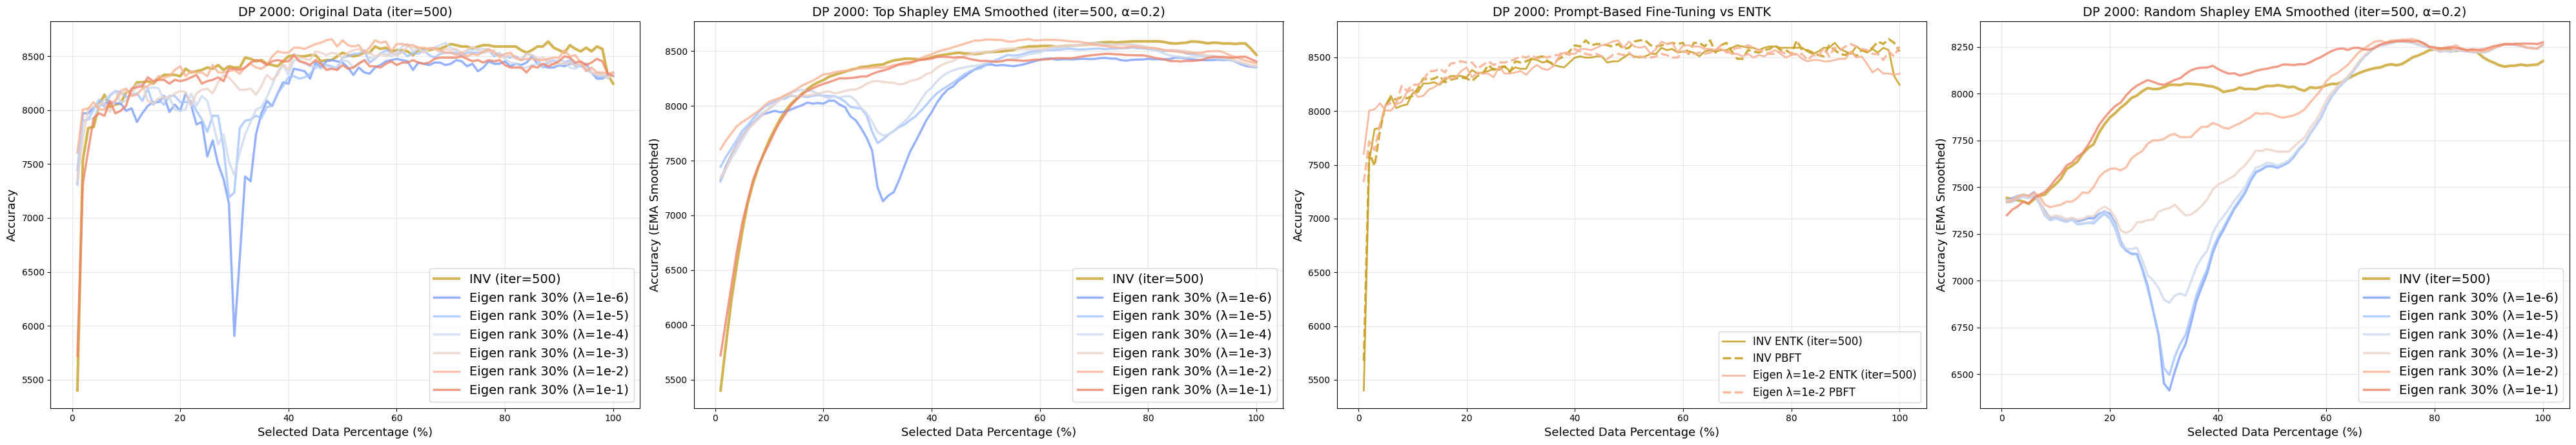

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# ===== Configuration =====
num_dp = 2000
rank = 30
iteration = 500
# =========================

def ema_smooth(data, alpha=0.2):
    """Apply Exponential Moving Average smoothing."""
    ema = [data[0]]
    for i in range(1, len(data)):
        ema.append(alpha * data[i] + (1 - alpha) * ema[-1])
    return ema

selected_dp_percent = [i for i in range(1, 101)]

# Prediction with top shapley values
inv_data      = [5401, 7534, 7833, 7844, 8050, 8142, 8028, 8050, 8062, 8165, 8177, 8257, 8257, 8268, 8245, 8291, 8326, 8326, 8326, 8314, 8383, 8349, 8360, 8372, 8394, 8383, 8417, 8372, 8406, 8394, 8394, 8486, 8475, 8452, 8463, 8429, 8417, 8406, 8452, 8498, 8509, 8498, 8498, 8509, 8509, 8452, 8463, 8463, 8498, 8532, 8509, 8498, 8509, 8532, 8532, 8589, 8567, 8578, 8544, 8555, 8555, 8544, 8509, 8555, 8567, 8555, 8567, 8567, 8589, 8612, 8601, 8589, 8589, 8567, 8589, 8601, 8601, 8589, 8589, 8589, 8589, 8589, 8555, 8532, 8555, 8589, 8589, 8635, 8578, 8555, 8532, 8601, 8567, 8544, 8578, 8544, 8589, 8567, 8326, 8245]
eigen_lam1e_6 = [7317, 7970, 7970, 8028, 8039, 8062, 8073, 8062, 8062, 7993, 8016, 7890, 7970, 8039, 8073, 8073, 8131, 7982, 8050, 7993, 8154, 8050, 7867, 7890, 7569, 7718, 7500, 7362, 7133, 5906, 6628, 7385, 7339, 7775, 7970, 8085, 8039, 8154, 8257, 8245, 8383, 8372, 8360, 8291, 8440, 8394, 8452, 8463, 8452, 8440, 8394, 8326, 8394, 8349, 8337, 8394, 8417, 8452, 8463, 8475, 8463, 8452, 8372, 8440, 8429, 8417, 8440, 8440, 8417, 8429, 8463, 8452, 8406, 8429, 8360, 8394, 8452, 8429, 8429, 8452, 8406, 8429, 8417, 8440, 8498, 8429, 8406, 8394, 8394, 8417, 8406, 8429, 8429, 8406, 8429, 8349, 8291, 8291, 8326, 8337]
eigen_lam1e_5 = [7443, 7901, 7913, 8005, 8096, 8028, 8131, 8177, 8165, 8119, 8142, 8154, 8085, 8200, 8050, 8096, 8050, 8131, 8131, 8073, 8073, 8085, 7993, 7913, 7798, 7947, 7947, 7649, 7190, 7236, 7833, 7901, 7913, 7947, 7924, 8028, 8039, 8154, 8222, 8303, 8314, 8291, 8303, 8337, 8394, 8440, 8417, 8406, 8383, 8486, 8498, 8521, 8521, 8555, 8440, 8475, 8521, 8555, 8532, 8509, 8544, 8498, 8532, 8521, 8555, 8509, 8486, 8521, 8532, 8532, 8532, 8498, 8532, 8532, 8532, 8532, 8555, 8498, 8521, 8498, 8486, 8498, 8463, 8521, 8509, 8475, 8394, 8440, 8463, 8406, 8440, 8463, 8406, 8417, 8372, 8349, 8314, 8303, 8326, 8337]
eigen_lam1e_4 = [7305, 7890, 7913, 7924, 8039, 8096, 8142, 8177, 8073, 8085, 8177, 8234, 8245, 8200, 8211, 8200, 8096, 8119, 8005, 7993, 8005, 8154, 8039, 8131, 8085, 7890, 7683, 7775, 7523, 7397, 7603, 7775, 7890, 8005, 8028, 8119, 8234, 8360, 8417, 8326, 8463, 8463, 8429, 8406, 8406, 8383, 8406, 8383, 8406, 8463, 8452, 8394, 8440, 8452, 8486, 8475, 8532, 8521, 8498, 8532, 8589, 8612, 8544, 8567, 8544, 8567, 8578, 8601, 8624, 8578, 8555, 8521, 8555, 8555, 8567, 8567, 8555, 8509, 8532, 8475, 8440, 8429, 8394, 8394, 8417, 8429, 8406, 8475, 8452, 8463, 8452, 8394, 8383, 8417, 8406, 8349, 8337, 8337, 8291, 8337]
eigen_lam1e_3 = [7351, 7729, 8016, 8028, 8050, 8062, 7982, 8085, 8142, 8177, 8142, 8234, 8234, 8085, 8062, 8108, 8119, 8119, 8154, 8177, 8165, 8039, 8154, 8188, 8200, 8154, 8257, 8326, 8303, 8245, 8188, 8188, 8200, 8142, 8222, 8326, 8280, 8326, 8429, 8372, 8521, 8486, 8475, 8463, 8544, 8532, 8509, 8532, 8521, 8486, 8532, 8555, 8567, 8532, 8532, 8498, 8521, 8498, 8532, 8509, 8532, 8589, 8578, 8578, 8532, 8578, 8567, 8532, 8567, 8555, 8567, 8532, 8555, 8589, 8555, 8532, 8544, 8555, 8486, 8498, 8509, 8475, 8475, 8521, 8509, 8475, 8486, 8452, 8417, 8429, 8429, 8440, 8417, 8429, 8394, 8349, 8326, 8326, 8303, 8349]
eigen_lam1e_2 = [7603, 8005, 8016, 8073, 8005, 8005, 8062, 8085, 8177, 8200, 8131, 8142, 8200, 8222, 8257, 8314, 8303, 8314, 8372, 8406, 8314, 8360, 8349, 8349, 8314, 8417, 8349, 8349, 8360, 8372, 8337, 8394, 8429, 8394, 8383, 8417, 8498, 8544, 8532, 8532, 8578, 8578, 8567, 8589, 8612, 8624, 8647, 8658, 8589, 8647, 8601, 8589, 8601, 8532, 8578, 8647, 8624, 8635, 8544, 8612, 8612, 8601, 8601, 8578, 8578, 8567, 8578, 8555, 8532, 8532, 8509, 8532, 8498, 8521, 8509, 8544, 8567, 8532, 8498, 8521, 8532, 8486, 8463, 8475, 8475, 8463, 8463, 8475, 8486, 8486, 8555, 8498, 8509, 8440, 8360, 8394, 8349, 8349, 8337, 8349]
eigen_lam1e_1 = [5722, 7317, 7626, 7924, 7970, 7947, 8085, 7970, 7993, 8039, 8200, 8211, 8222, 8303, 8268, 8280, 8280, 8245, 8280, 8268, 8280, 8303, 8326, 8245, 8268, 8280, 8303, 8268, 8383, 8383, 8372, 8394, 8440, 8463, 8452, 8417, 8452, 8463, 8452, 8452, 8509, 8452, 8440, 8417, 8463, 8429, 8372, 8383, 8372, 8417, 8383, 8394, 8429, 8463, 8406, 8406, 8394, 8429, 8452, 8417, 8440, 8440, 8463, 8440, 8429, 8440, 8475, 8486, 8486, 8486, 8486, 8498, 8475, 8452, 8463, 8440, 8463, 8452, 8463, 8417, 8394, 8394, 8394, 8349, 8406, 8394, 8429, 8406, 8429, 8452, 8498, 8486, 8440, 8452, 8417, 8440, 8475, 8452, 8337, 8314]

# Prediction with random shapley values
r_inv_data      = [7443, 7408, 7408, 7397, 7362, 7534, 7523, 7489, 7615, 7615, 7672, 7798, 7683, 7729, 7844, 7833, 7810, 8039, 8016, 8016, 7993, 8039, 8039, 8096, 8039, 8108, 8096, 8005, 8028, 8073, 8096, 8050, 8039, 8085, 8050, 8039, 8039, 8016, 8028, 7982, 7936, 8039, 8039, 8085, 7993, 8028, 8016, 8073, 8073, 8039, 8062, 8028, 8005, 8050, 7970, 7982, 8108, 8016, 8050, 8085, 8085, 8050, 8108, 8154, 8154, 8165, 8165, 8165, 8165, 8154, 8200, 8177, 8131, 8188, 8245, 8268, 8245, 8268, 8291, 8257, 8257, 8245, 8200, 8211, 8257, 8222, 8234, 8165, 8096, 8108, 8119, 8096, 8119, 8165, 8154, 8177, 8131, 8165, 8165, 8245]
r_eigen_lam1e_6 = [7431, 7477, 7511, 7477, 7431, 7557, 7202, 7190, 7179, 7351, 7294, 7294, 7362, 7271, 7351, 7374, 7328, 7454, 7420, 7317, 7099, 6823, 6972, 7064, 7144, 6755, 6594, 6319, 6193, 5413, 6261, 6915, 6950, 6904, 7225, 7362, 7271, 7339, 7569, 7511, 7477, 7557, 7603, 7592, 7649, 7787, 7764, 7649, 7683, 7615, 7569, 7672, 7695, 7787, 7867, 7856, 7993, 7993, 8050, 8188, 8188, 8177, 8177, 8188, 8280, 8326, 8337, 8326, 8360, 8291, 8280, 8303, 8326, 8280, 8257, 8257, 8222, 8222, 8222, 8200, 8177, 8245, 8200, 8280, 8211, 8211, 8211, 8222, 8211, 8257, 8303, 8314, 8291, 8268, 8245, 8234, 8211, 8234, 8234, 8337]
r_eigen_lam1e_5 = [7420, 7431, 7511, 7489, 7408, 7511, 7248, 7087, 7225, 7374, 7282, 7282, 7374, 7202, 7317, 7328, 7294, 7443, 7454, 7236, 7064, 6835, 7041, 7087, 7133, 6720, 6560, 6376, 6204, 5814, 6342, 6984, 6938, 6904, 7225, 7362, 7294, 7328, 7580, 7511, 7477, 7557, 7603, 7603, 7649, 7787, 7764, 7649, 7683, 7615, 7569, 7672, 7695, 7787, 7867, 7856, 7993, 7993, 8050, 8188, 8188, 8177, 8177, 8188, 8280, 8326, 8337, 8326, 8360, 8291, 8280, 8303, 8326, 8280, 8257, 8257, 8222, 8222, 8222, 8200, 8177, 8245, 8200, 8280, 8211, 8211, 8211, 8222, 8211, 8257, 8303, 8314, 8291, 8268, 8245, 8234, 8211, 8234, 8234, 8337]
r_eigen_lam1e_4 = [7420, 7443, 7511, 7477, 7408, 7534, 7248, 7099, 7225, 7374, 7294, 7282, 7374, 7225, 7294, 7328, 7339, 7477, 7477, 7236, 7099, 6812, 7053, 7167, 7202, 6846, 6709, 6892, 6800, 6651, 6812, 7076, 6972, 6881, 7294, 7385, 7328, 7305, 7626, 7523, 7489, 7546, 7603, 7603, 7661, 7787, 7787, 7649, 7695, 7615, 7569, 7672, 7706, 7798, 7856, 7844, 7993, 8005, 8050, 8188, 8188, 8177, 8177, 8188, 8280, 8326, 8337, 8326, 8360, 8291, 8280, 8303, 8326, 8280, 8257, 8257, 8222, 8222, 8222, 8188, 8177, 8245, 8200, 8280, 8211, 8211, 8211, 8222, 8211, 8257, 8303, 8314, 8291, 8268, 8245, 8234, 8211, 8234, 8234, 8337]
r_eigen_lam1e_3 = [7431, 7443, 7523, 7489, 7397, 7534, 7271, 7133, 7236, 7385, 7317, 7271, 7374, 7282, 7351, 7397, 7351, 7511, 7466, 7317, 7179, 6984, 7202, 7328, 7477, 7328, 7362, 7339, 7534, 7431, 7420, 7477, 7259, 7236, 7374, 7454, 7511, 7569, 7695, 7626, 7580, 7615, 7626, 7718, 7718, 7798, 7867, 7683, 7741, 7672, 7661, 7695, 7683, 7821, 7856, 7856, 8016, 8005, 8108, 8200, 8177, 8165, 8177, 8211, 8268, 8337, 8337, 8326, 8360, 8291, 8280, 8303, 8326, 8291, 8257, 8257, 8234, 8234, 8211, 8188, 8188, 8245, 8222, 8268, 8222, 8211, 8211, 8222, 8211, 8257, 8303, 8326, 8291, 8268, 8245, 8234, 8211, 8234, 8234, 8349]
r_eigen_lam1e_2 = [7420, 7466, 7511, 7523, 7420, 7546, 7374, 7225, 7339, 7431, 7431, 7489, 7420, 7523, 7592, 7454, 7626, 7764, 7695, 7661, 7615, 7546, 7672, 7844, 7764, 7764, 7890, 7821, 7752, 7787, 7856, 7810, 7706, 7764, 7775, 7913, 7924, 7821, 7924, 7798, 7752, 7798, 7890, 7890, 7924, 7936, 7993, 7867, 7913, 7867, 7833, 7844, 7901, 7913, 7947, 7993, 8096, 8119, 8154, 8257, 8211, 8165, 8222, 8245, 8326, 8349, 8326, 8337, 8349, 8303, 8234, 8326, 8291, 8303, 8291, 8303, 8245, 8222, 8177, 8200, 8211, 8303, 8257, 8291, 8154, 8200, 8222, 8234, 8222, 8257, 8291, 8291, 8303, 8268, 8257, 8234, 8211, 8222, 8234, 8349]
r_eigen_lam1e_1 = [7351, 7500, 7466, 7523, 7374, 7569, 7523, 7534, 7626, 7695, 7695, 7787, 7695, 7787, 7764, 7901, 7982, 8050, 8028, 8039, 8050, 8028, 8142, 8142, 8131, 8119, 8131, 8028, 8005, 8028, 8108, 8131, 8119, 8200, 8200, 8177, 8154, 8142, 8188, 8062, 8062, 8062, 8119, 8050, 8131, 8142, 8165, 8154, 8154, 8165, 8165, 8200, 8154, 8142, 8177, 8154, 8211, 8245, 8245, 8280, 8291, 8280, 8257, 8200, 8291, 8245, 8200, 8234, 8280, 8337, 8303, 8303, 8291, 8280, 8291, 8268, 8291, 8222, 8177, 8234, 8222, 8245, 8257, 8245, 8222, 8200, 8257, 8222, 8245, 8280, 8291, 8280, 8291, 8257, 8280, 8268, 8268, 8268, 8257, 8314]

# PBFT
selected_dp_percent_prompt_based_ft = [i for i in range(1, 101)]
pbft_inv           = [5677, 7615, 7489, 7821, 8050, 8119, 8108, 8131, 8119, 8142, 8211, 8303, 8291, 8303, 8326, 8268, 8291, 8303, 8314, 8303, 8280, 8326, 8349, 8429, 8383, 8406, 8417, 8360, 8463, 8452, 8463, 8486, 8498, 8509, 8463, 8440, 8486, 8509, 8555, 8612, 8601, 8658, 8612, 8624, 8624, 8612, 8601, 8624, 8578, 8589, 8647, 8658, 8658, 8612, 8601, 8612, 8624, 8635, 8624, 8635, 8532, 8635, 8635, 8601, 8658, 8544, 8612, 8635, 8555, 8486, 8486, 8567, 8555, 8544, 8567, 8578, 8612, 8567, 8567, 8532, 8658, 8567, 8567, 8544, 8521, 8509, 8612, 8567, 8532, 8521, 8555, 8509, 8567, 8555, 8589, 8647, 8624, 8670, 8635, 8555]
pbft_eigen_lam1e_2 = [7339, 7718, 7638, 7878, 8050, 8073, 8073, 8234, 8188, 8245, 8245, 8280, 8372, 8372, 8394, 8360, 8440, 8452, 8463, 8452, 8452, 8394, 8429, 8463, 8429, 8452, 8452, 8463, 8486, 8509, 8498, 8521, 8486, 8509, 8498, 8521, 8521, 8555, 8521, 8578, 8555, 8532, 8521, 8532, 8509, 8486, 8521, 8532, 8521, 8544, 8498, 8509, 8498, 8498, 8509, 8532, 8521, 8498, 8498, 8555, 8544, 8532, 8544, 8532, 8544, 8567, 8612, 8544, 8567, 8589, 8589, 8612, 8589, 8567, 8555, 8532, 8532, 8555, 8532, 8544, 8521, 8532, 8475, 8521, 8509, 8589, 8509, 8589, 8567, 8601, 8624, 8601, 8578, 8567, 8532, 8532, 8475, 8555, 8509, 8601]

# Apply EMA smoothing for top shapley values
alpha = 0.2  # smoothing factor (0.1-0.3 typically works well)
inv_ema = ema_smooth(inv_data, alpha)
eigen_ema_1e6 = ema_smooth(eigen_lam1e_6, alpha)
eigen_ema_1e5 = ema_smooth(eigen_lam1e_5, alpha)
eigen_ema_1e4 = ema_smooth(eigen_lam1e_4, alpha)
eigen_ema_1e3 = ema_smooth(eigen_lam1e_3, alpha)
eigen_ema_1e2 = ema_smooth(eigen_lam1e_2, alpha)
eigen_ema_1e1 = ema_smooth(eigen_lam1e_1, alpha)

# Apply EMA smoothing for random shapley values
r_inv_ema = ema_smooth(r_inv_data, alpha) if r_inv_data else []
r_eigen_ema_1e6 = ema_smooth(r_eigen_lam1e_6, alpha) if r_eigen_lam1e_6 else []
r_eigen_ema_1e5 = ema_smooth(r_eigen_lam1e_5, alpha) if r_eigen_lam1e_5 else []
r_eigen_ema_1e4 = ema_smooth(r_eigen_lam1e_4, alpha) if r_eigen_lam1e_4 else []
r_eigen_ema_1e3 = ema_smooth(r_eigen_lam1e_3, alpha) if r_eigen_lam1e_3 else []
r_eigen_ema_1e2 = ema_smooth(r_eigen_lam1e_2, alpha) if r_eigen_lam1e_2 else []
r_eigen_ema_1e1 = ema_smooth(r_eigen_lam1e_1, alpha) if r_eigen_lam1e_1 else []

# Create figure with 4 subplots
fig, axes = plt.subplots(1, 4, figsize=(40, 7))

# Lambda configs
lambda_configs_orig = [
    (eigen_lam1e_6, '1e-6', 'o'),
    (eigen_lam1e_5, '1e-5', 's'),
    (eigen_lam1e_4, '1e-4', 'D'),
    (eigen_lam1e_3, '1e-3', 'v'),
    (eigen_lam1e_2, '1e-2', '^'),
    (eigen_lam1e_1, '1e-1', '<'),
]

lambda_configs_ema = [
    (eigen_ema_1e6, '1e-6', 'o'),
    (eigen_ema_1e5, '1e-5', 's'),
    (eigen_ema_1e4, '1e-4', 'D'),
    (eigen_ema_1e3, '1e-3', 'v'),
    (eigen_ema_1e2, '1e-2', '^'),
    (eigen_ema_1e1, '1e-1', '<'),
]

lambda_configs_random_ema = [
    (r_eigen_ema_1e6, '1e-6', 'o'),
    (r_eigen_ema_1e5, '1e-5', 's'),
    (r_eigen_ema_1e4, '1e-4', 'D'),
    (r_eigen_ema_1e3, '1e-3', 'v'),
    (r_eigen_ema_1e2, '1e-2', '^'),
    (r_eigen_ema_1e1, '1e-1', '<'),
]

colors = plt.cm.coolwarm(np.linspace(0.2, 0.8, len(lambda_configs_orig)))

# Color settings for consistency
inv_color = '#C9A227'
eigen_1e2_color = colors[4]  # Lambda 1e-2 color

# ===== Subplot (1,1): Original data =====
ax_left = axes[0]

# Plot baseline (Original)
ax_left.plot(selected_dp_percent, inv_data, 
         color=inv_color, linewidth=3, linestyle='-', 
         label=f'INV (iter={iteration})', alpha=0.8)

# Plot eigen with different lambda values (Original)
for i, (data, lam_label, marker) in enumerate(lambda_configs_orig):
    ax_left.plot(selected_dp_percent, data, 
             color=colors[i], linewidth=2.5, linestyle='-', 
             label=f'Eigen rank {rank}% (λ={lam_label})', alpha=0.8)

ax_left.set_xlabel('Selected Data Percentage (%)', fontsize=13)
ax_left.set_ylabel('Accuracy', fontsize=13)
ax_left.set_title(f'DP {num_dp}: Original Data (iter={iteration})', fontsize=14)
ax_left.legend(fontsize=14, loc='best')
ax_left.grid(True, alpha=0.3)

# ===== Subplot (1,2): Top Shapley EMA smoothed =====
ax_middle = axes[1]

# Plot baseline (EMA)
ax_middle.plot(selected_dp_percent, inv_ema, 
         color=inv_color, linewidth=3, linestyle='-', 
         label=f'INV (iter={iteration})', alpha=0.8)

# Plot eigen with different lambda values (EMA)
for i, (data, lam_label, marker) in enumerate(lambda_configs_ema):
    ax_middle.plot(selected_dp_percent, data, 
             color=colors[i], linewidth=2.5, linestyle='-', 
             label=f'Eigen rank {rank}% (λ={lam_label})', alpha=0.8)

ax_middle.set_xlabel('Selected Data Percentage (%)', fontsize=13)
ax_middle.set_ylabel('Accuracy (EMA Smoothed)', fontsize=13)
ax_middle.set_title(f'DP {num_dp}: Top Shapley EMA Smoothed (iter={iteration}, α={alpha})', fontsize=14)
ax_middle.legend(fontsize=14, loc='best')
ax_middle.grid(True, alpha=0.3)

# ===== Subplot (1,3): Prompt-Based Fine-Tuning vs ENTK =====
ax_pbft = axes[2]

# Use all 100 data points for ENTK (1% to 100%)
entk_selected_percent = selected_dp_percent  # [1, 2, 3, ..., 100]
entk_inv_values = inv_data  # All 100 values
entk_eigen_1e2_values = eigen_lam1e_2  # All 100 values

# Plot INV: ENTK (solid, no marker) and PBFT (dashed, no marker)
ax_pbft.plot(entk_selected_percent, entk_inv_values, 
         color=inv_color, linewidth=2.0, linestyle='-', 
         label=f'INV ENTK (iter={iteration})', alpha=0.9)
ax_pbft.plot(selected_dp_percent, pbft_inv, 
         color=inv_color, linewidth=2.5, linestyle='--', 
         label='INV PBFT', alpha=0.9)

# Plot Eigen λ=1e-2: ENTK (solid, no marker) and PBFT (dashed, no marker)
ax_pbft.plot(entk_selected_percent, entk_eigen_1e2_values, 
         color=eigen_1e2_color, linewidth=2.0, linestyle='-', 
         label=f'Eigen λ=1e-2 ENTK (iter={iteration})', alpha=0.9)
ax_pbft.plot(selected_dp_percent, pbft_eigen_lam1e_2, 
         color=eigen_1e2_color, linewidth=2.5, linestyle='--', 
         label='Eigen λ=1e-2 PBFT', alpha=0.9)

ax_pbft.set_xlabel('Selected Data Percentage (%)', fontsize=13)
ax_pbft.set_ylabel('Accuracy', fontsize=13)
ax_pbft.set_title(f'DP {num_dp}: Prompt-Based Fine-Tuning vs ENTK', fontsize=14)
ax_pbft.legend(fontsize=12, loc='best')
ax_pbft.grid(True, alpha=0.3)

# ===== Subplot (1,4): Random Shapley EMA smoothed =====
ax_right = axes[3]

# Plot baseline (Random EMA)
if r_inv_ema:
    ax_right.plot(selected_dp_percent, r_inv_ema, 
             color=inv_color, linewidth=3, linestyle='-', 
             label=f'INV (iter={iteration})', alpha=0.8)

# Plot eigen with different lambda values (Random EMA)
for i, (data, lam_label, marker) in enumerate(lambda_configs_random_ema):
    if data:  # Only plot if data exists
        ax_right.plot(selected_dp_percent, data, 
                 color=colors[i], linewidth=2.5, linestyle='-', 
                 label=f'Eigen rank {rank}% (λ={lam_label})', alpha=0.8)

ax_right.set_xlabel('Selected Data Percentage (%)', fontsize=13)
ax_right.set_ylabel('Accuracy (EMA Smoothed)', fontsize=13)
ax_right.set_title(f'DP {num_dp}: Random Shapley EMA Smoothed (iter={iteration}, α={alpha})', fontsize=14)
ax_right.legend(fontsize=14, loc='best')
ax_right.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

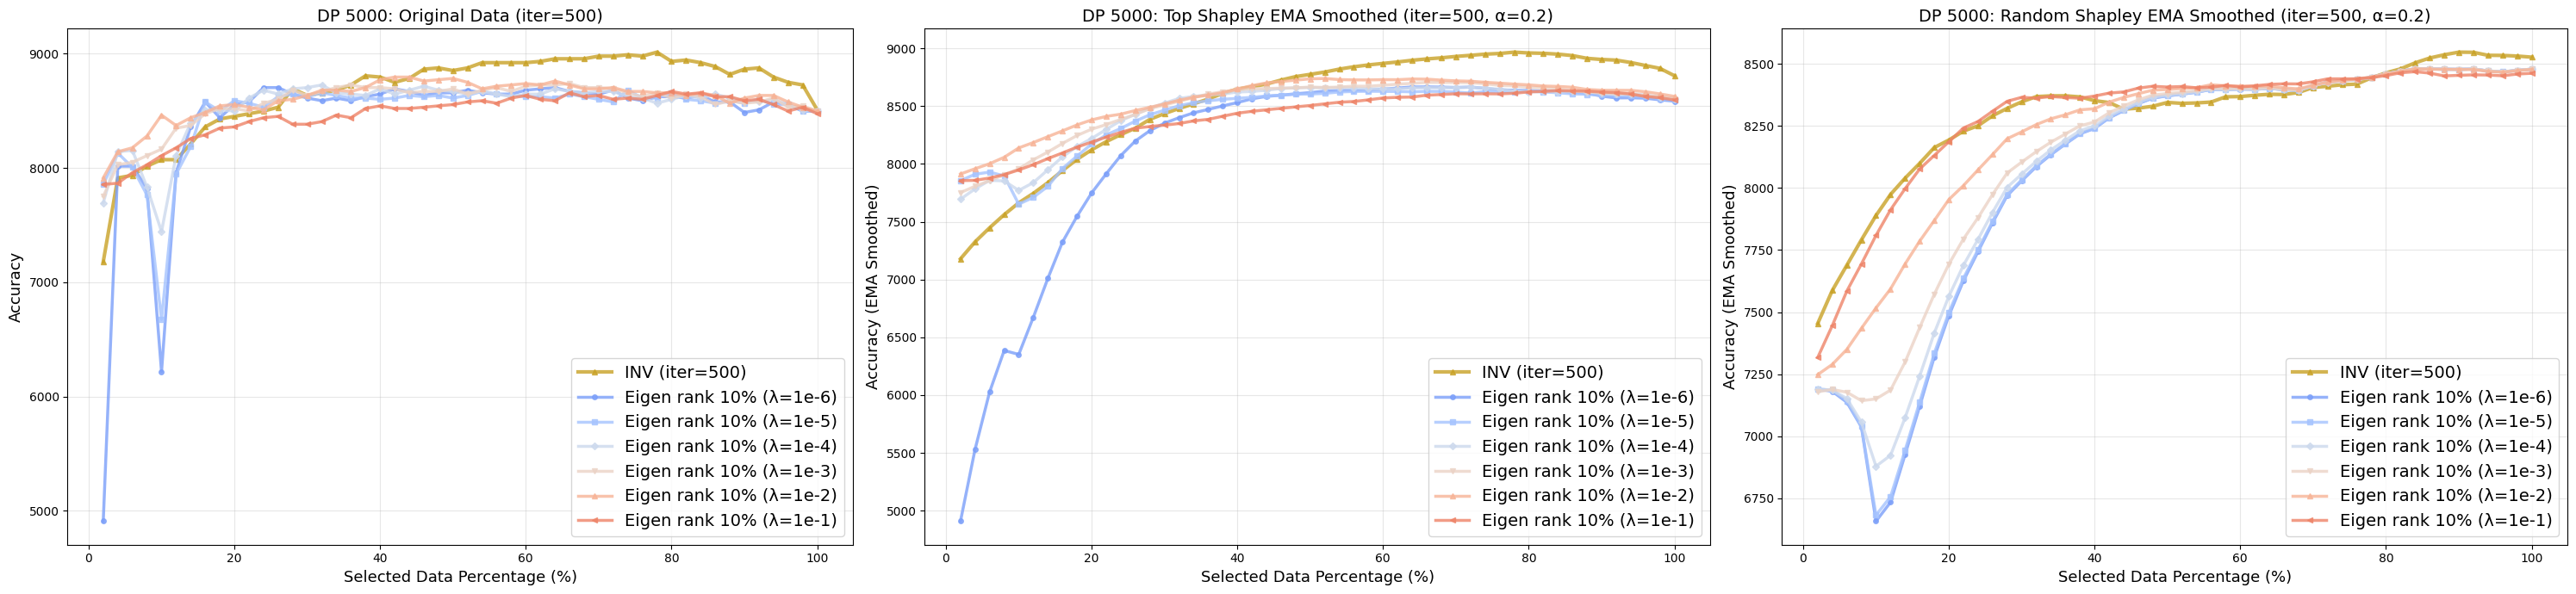

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# ===== Configuration =====
num_dp = 5000
rank = 10
iteration = 500
# =========================

def ema_smooth(data, alpha=0.2):
    """Apply Exponential Moving Average smoothing."""
    ema = [data[0]]
    for i in range(1, len(data)):
        ema.append(alpha * data[i] + (1 - alpha) * ema[-1])
    return ema

selected_dp_percent = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100]

# Prediction with top shapley values
inv_data      = [7179, 7913, 7936, 8016, 8073, 8073, 8211, 8360, 8429, 8452, 8475, 8498, 8532, 8693, 8635, 8658, 8681, 8727, 8807, 8796, 8750, 8784, 8865, 8876, 8853, 8876, 8922, 8922, 8922, 8922, 8933, 8956, 8956, 8956, 8979, 8979, 8991, 8979, 9014, 8933, 8945, 8922, 8888, 8819, 8865, 8876, 8796, 8750, 8727, 8509]
eigen_lam1e_6 = [4908, 8016, 8016, 7821, 6216, 7959, 8360, 8578, 8440, 8555, 8578, 8704, 8704, 8647, 8612, 8589, 8612, 8589, 8624, 8647, 8693, 8670, 8635, 8658, 8658, 8681, 8658, 8647, 8647, 8681, 8693, 8704, 8670, 8658, 8647, 8681, 8612, 8589, 8624, 8624, 8612, 8635, 8578, 8578, 8486, 8509, 8578, 8555, 8498, 8498]
eigen_lam1e_5 = [7856, 8131, 8005, 7764, 6674, 7947, 8188, 8578, 8498, 8589, 8567, 8532, 8624, 8647, 8624, 8658, 8635, 8612, 8612, 8601, 8612, 8635, 8624, 8635, 8612, 8635, 8670, 8647, 8635, 8624, 8624, 8612, 8647, 8624, 8601, 8578, 8681, 8612, 8612, 8658, 8601, 8589, 8567, 8589, 8567, 8601, 8555, 8555, 8498, 8498]
eigen_lam1e_4 = [7695, 8142, 8154, 7833, 7443, 8108, 8394, 8509, 8509, 8498, 8612, 8681, 8647, 8693, 8704, 8727, 8658, 8647, 8635, 8693, 8647, 8681, 8716, 8681, 8670, 8647, 8670, 8647, 8624, 8647, 8647, 8693, 8670, 8658, 8670, 8670, 8624, 8612, 8567, 8601, 8635, 8612, 8647, 8612, 8589, 8578, 8601, 8555, 8509, 8498]
eigen_lam1e_3 = [7752, 8028, 8050, 8108, 8165, 8349, 8372, 8475, 8521, 8521, 8498, 8567, 8601, 8681, 8635, 8670, 8704, 8727, 8704, 8704, 8693, 8658, 8670, 8670, 8693, 8647, 8681, 8704, 8670, 8716, 8727, 8727, 8739, 8704, 8704, 8693, 8658, 8624, 8658, 8612, 8647, 8624, 8555, 8589, 8567, 8578, 8612, 8532, 8544, 8498]
eigen_lam1e_2 = [7913, 8142, 8177, 8280, 8463, 8372, 8440, 8486, 8544, 8555, 8532, 8509, 8589, 8601, 8635, 8681, 8681, 8670, 8704, 8773, 8796, 8796, 8761, 8773, 8784, 8750, 8693, 8716, 8727, 8739, 8727, 8761, 8727, 8693, 8693, 8704, 8670, 8670, 8658, 8658, 8635, 8658, 8635, 8567, 8612, 8635, 8635, 8578, 8532, 8498]
eigen_lam1e_1 = [7856, 7867, 7959, 8028, 8108, 8177, 8257, 8291, 8349, 8360, 8406, 8440, 8452, 8383, 8383, 8406, 8463, 8440, 8521, 8544, 8521, 8521, 8532, 8544, 8555, 8578, 8589, 8567, 8612, 8635, 8601, 8589, 8658, 8624, 8635, 8601, 8612, 8601, 8635, 8670, 8647, 8658, 8624, 8624, 8589, 8601, 8555, 8498, 8532, 8475]

# Prediction with random shapley values
r_inv_data      = [7454, 8119, 8096, 8200, 8280, 8314, 8303, 8337, 8417, 8314, 8372, 8337, 8452, 8440, 8452, 8452, 8383, 8372, 8349, 8291, 8314, 8211, 8337, 8360, 8406, 8326, 8349, 8360, 8452, 8372, 8394, 8394, 8372, 8417, 8486, 8429, 8440, 8429, 8544, 8544, 8544, 8601, 8601, 8589, 8589, 8544, 8486, 8532, 8521, 8509]
r_eigen_lam1e_6 = [7190, 7144, 6961, 6640, 5138, 7041, 7695, 7901, 8108, 8154, 8188, 8211, 8326, 8406, 8268, 8314, 8326, 8349, 8383, 8326, 8452, 8429, 8452, 8452, 8406, 8406, 8417, 8440, 8394, 8406, 8394, 8417, 8372, 8383, 8486, 8486, 8452, 8463, 8475, 8521, 8509, 8521, 8475, 8475, 8475, 8486, 8440, 8452, 8498, 8498]
r_eigen_lam1e_5 = [7190, 7167, 6972, 6628, 5252, 7053, 7695, 7913, 8119, 8154, 8188, 8211, 8326, 8406, 8268, 8314, 8326, 8349, 8383, 8326, 8452, 8429, 8452, 8452, 8406, 8406, 8417, 8440, 8394, 8406, 8394, 8417, 8372, 8383, 8486, 8486, 8452, 8463, 8475, 8521, 8509, 8521, 8475, 8475, 8475, 8486, 8440, 8452, 8498, 8498]
r_eigen_lam1e_4 = [7190, 7167, 7018, 6674, 6170, 7099, 7683, 7913, 8108, 8154, 8188, 8211, 8337, 8406, 8268, 8314, 8337, 8349, 8383, 8326, 8452, 8429, 8452, 8452, 8406, 8406, 8417, 8440, 8394, 8406, 8394, 8417, 8372, 8383, 8486, 8475, 8452, 8463, 8475, 8521, 8509, 8521, 8475, 8475, 8475, 8486, 8440, 8452, 8498, 8498]
r_eigen_lam1e_3 = [7179, 7225, 7133, 7007, 7179, 7328, 7752, 7993, 8108, 8177, 8200, 8222, 8349, 8406, 8280, 8314, 8337, 8349, 8383, 8326, 8452, 8440, 8452, 8452, 8406, 8406, 8417, 8440, 8394, 8406, 8394, 8417, 8372, 8383, 8486, 8475, 8452, 8463, 8475, 8521, 8509, 8521, 8475, 8475, 8475, 8486, 8440, 8452, 8498, 8498]
r_eigen_lam1e_2 = [7248, 7454, 7592, 7775, 7844, 7901, 8096, 8154, 8200, 8291, 8234, 8326, 8383, 8452, 8337, 8372, 8372, 8360, 8394, 8337, 8452, 8440, 8440, 8452, 8406, 8417, 8417, 8463, 8394, 8406, 8406, 8417, 8372, 8383, 8475, 8475, 8463, 8463, 8475, 8509, 8509, 8521, 8475, 8475, 8475, 8475, 8440, 8452, 8498, 8498]
r_eigen_lam1e_1 = [7317, 7959, 8142, 8131, 8268, 8326, 8337, 8394, 8349, 8406, 8463, 8372, 8475, 8509, 8429, 8349, 8394, 8349, 8349, 8406, 8429, 8406, 8463, 8440, 8394, 8417, 8383, 8417, 8440, 8383, 8429, 8440, 8429, 8417, 8463, 8486, 8440, 8440, 8463, 8486, 8509, 8486, 8440, 8406, 8463, 8463, 8452, 8440, 8486, 8475]

# Apply EMA smoothing for top shapley values
alpha = 0.2  # smoothing factor (0.1-0.3 typically works well)
inv_ema = ema_smooth(inv_data, alpha)
eigen_ema_1e6 = ema_smooth(eigen_lam1e_6, alpha)
eigen_ema_1e5 = ema_smooth(eigen_lam1e_5, alpha)
eigen_ema_1e4 = ema_smooth(eigen_lam1e_4, alpha)
eigen_ema_1e3 = ema_smooth(eigen_lam1e_3, alpha)
eigen_ema_1e2 = ema_smooth(eigen_lam1e_2, alpha)
eigen_ema_1e1 = ema_smooth(eigen_lam1e_1, alpha)

# Apply EMA smoothing for random shapley values
r_inv_ema = ema_smooth(r_inv_data, alpha) if r_inv_data else []
r_eigen_ema_1e6 = ema_smooth(r_eigen_lam1e_6, alpha) if r_eigen_lam1e_6 else []
r_eigen_ema_1e5 = ema_smooth(r_eigen_lam1e_5, alpha) if r_eigen_lam1e_5 else []
r_eigen_ema_1e4 = ema_smooth(r_eigen_lam1e_4, alpha) if r_eigen_lam1e_4 else []
r_eigen_ema_1e3 = ema_smooth(r_eigen_lam1e_3, alpha) if r_eigen_lam1e_3 else []
r_eigen_ema_1e2 = ema_smooth(r_eigen_lam1e_2, alpha) if r_eigen_lam1e_2 else []
r_eigen_ema_1e1 = ema_smooth(r_eigen_lam1e_1, alpha) if r_eigen_lam1e_1 else []

# Create figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(30, 7))

# Lambda configs
lambda_configs_orig = [
    (eigen_lam1e_6, '1e-6', 'o'),
    (eigen_lam1e_5, '1e-5', 's'),
    (eigen_lam1e_4, '1e-4', 'D'),
    (eigen_lam1e_3, '1e-3', 'v'),
    (eigen_lam1e_2, '1e-2', '^'),
    (eigen_lam1e_1, '1e-1', '<'),
]

lambda_configs_ema = [
    (eigen_ema_1e6, '1e-6', 'o'),
    (eigen_ema_1e5, '1e-5', 's'),
    (eigen_ema_1e4, '1e-4', 'D'),
    (eigen_ema_1e3, '1e-3', 'v'),
    (eigen_ema_1e2, '1e-2', '^'),
    (eigen_ema_1e1, '1e-1', '<'),
]

lambda_configs_random_ema = [
    (r_eigen_ema_1e6, '1e-6', 'o'),
    (r_eigen_ema_1e5, '1e-5', 's'),
    (r_eigen_ema_1e4, '1e-4', 'D'),
    (r_eigen_ema_1e3, '1e-3', 'v'),
    (r_eigen_ema_1e2, '1e-2', '^'),
    (r_eigen_ema_1e1, '1e-1', '<'),
]

colors = plt.cm.coolwarm(np.linspace(0.2, 0.8, len(lambda_configs_orig)))

# ===== Left subplot (1,1): Original data =====
ax_left = axes[0]

# Plot baseline (Original)
ax_left.plot(selected_dp_percent, inv_data, 
         color='#C9A227', linewidth=3, linestyle='-', 
         label=f'INV (iter={iteration})', marker='^', markersize=5, alpha=0.8)

# Plot eigen with different lambda values (Original)
for i, (data, lam_label, marker) in enumerate(lambda_configs_orig):
    ax_left.plot(selected_dp_percent, data, 
             color=colors[i], linewidth=2.5, linestyle='-', 
             label=f'Eigen rank {rank}% (λ={lam_label})', 
             marker=marker, markersize=4, alpha=0.8)

ax_left.set_xlabel('Selected Data Percentage (%)', fontsize=13)
ax_left.set_ylabel('Accuracy', fontsize=13)
ax_left.set_title(f'DP {num_dp}: Original Data (iter={iteration})', fontsize=14)
ax_left.legend(fontsize=14, loc='best')
ax_left.grid(True, alpha=0.3)

# ===== Middle subplot (1,2): Top Shapley EMA smoothed =====
ax_middle = axes[1]

# Plot baseline (EMA)
ax_middle.plot(selected_dp_percent, inv_ema, 
         color='#C9A227', linewidth=3, linestyle='-', 
         label=f'INV (iter={iteration})', marker='^', markersize=5, alpha=0.8)

# Plot eigen with different lambda values (EMA)
for i, (data, lam_label, marker) in enumerate(lambda_configs_ema):
    ax_middle.plot(selected_dp_percent, data, 
             color=colors[i], linewidth=2.5, linestyle='-', 
             label=f'Eigen rank {rank}% (λ={lam_label})', 
             marker=marker, markersize=4, alpha=0.8)

ax_middle.set_xlabel('Selected Data Percentage (%)', fontsize=13)
ax_middle.set_ylabel('Accuracy (EMA Smoothed)', fontsize=13)
ax_middle.set_title(f'DP {num_dp}: Top Shapley EMA Smoothed (iter={iteration}, α={alpha})', fontsize=14)
ax_middle.legend(fontsize=14, loc='best')
ax_middle.grid(True, alpha=0.3)

# ===== Right subplot (1,3): Random Shapley EMA smoothed =====
ax_right = axes[2]

# Plot baseline (Random EMA)
if r_inv_ema:
    ax_right.plot(selected_dp_percent, r_inv_ema, 
             color='#C9A227', linewidth=3, linestyle='-', 
             label=f'INV (iter={iteration})', marker='^', markersize=5, alpha=0.8)

# Plot eigen with different lambda values (Random EMA)
for i, (data, lam_label, marker) in enumerate(lambda_configs_random_ema):
    if data:  # Only plot if data exists
        ax_right.plot(selected_dp_percent, data, 
                 color=colors[i], linewidth=2.5, linestyle='-', 
                 label=f'Eigen rank {rank}% (λ={lam_label})', 
                 marker=marker, markersize=4, alpha=0.8)

ax_right.set_xlabel('Selected Data Percentage (%)', fontsize=13)
ax_right.set_ylabel('Accuracy (EMA Smoothed)', fontsize=13)
ax_right.set_title(f'DP {num_dp}: Random Shapley EMA Smoothed (iter={iteration}, α={alpha})', fontsize=14)
ax_right.legend(fontsize=14, loc='best')
ax_right.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

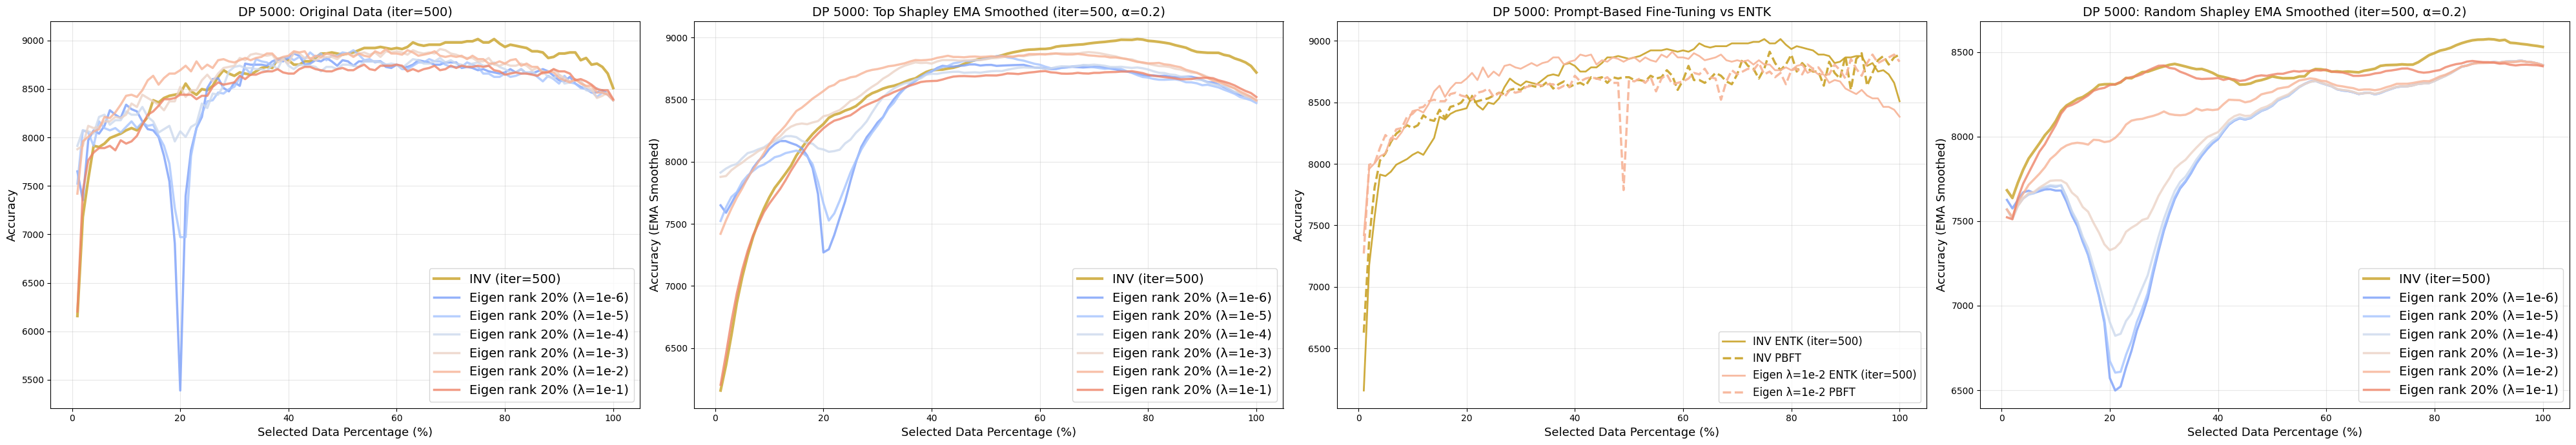

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# ===== Configuration =====
num_dp = 5000
rank = 20
iteration = 500
# =========================

def ema_smooth(data, alpha=0.2):
    """Apply Exponential Moving Average smoothing."""
    ema = [data[0]]
    for i in range(1, len(data)):
        ema.append(alpha * data[i] + (1 - alpha) * ema[-1])
    return ema

selected_dp_percent = [i for i in range(1, 101)]

# Prediction with top shapley values
inv_data      = [6158, 7179, 7569, 7913, 7901, 7936, 7993, 8016, 8039, 8073, 8096, 8073, 8142, 8211, 8383, 8360, 8406, 8429, 8440, 8452, 8555, 8475, 8440, 8498, 8486, 8532, 8624, 8693, 8658, 8635, 8670, 8658, 8647, 8681, 8716, 8727, 8716, 8807, 8819, 8796, 8750, 8750, 8784, 8784, 8819, 8865, 8865, 8876, 8865, 8853, 8865, 8876, 8899, 8922, 8922, 8922, 8933, 8922, 8911, 8922, 8911, 8933, 8979, 8956, 8945, 8956, 8956, 8956, 8979, 8979, 8979, 8979, 8991, 8991, 9014, 8979, 8979, 9014, 8968, 8933, 8956, 8945, 8933, 8922, 8888, 8888, 8876, 8819, 8830, 8865, 8865, 8876, 8876, 8796, 8819, 8750, 8761, 8727, 8658, 8509]
eigen_lam1e_6 = [7649, 7351, 7970, 8073, 8039, 8119, 8280, 8234, 8200, 8337, 8291, 8268, 8165, 8085, 8073, 8005, 7810, 7546, 6904, 5390, 7397, 7867, 8096, 8211, 8509, 8601, 8612, 8509, 8475, 8567, 8532, 8761, 8750, 8750, 8750, 8739, 8784, 8807, 8784, 8819, 8865, 8842, 8750, 8761, 8796, 8784, 8819, 8784, 8739, 8796, 8784, 8739, 8784, 8784, 8784, 8784, 8784, 8727, 8716, 8750, 8727, 8727, 8750, 8796, 8784, 8773, 8750, 8750, 8773, 8773, 8773, 8716, 8727, 8716, 8693, 8704, 8681, 8670, 8658, 8670, 8704, 8670, 8704, 8658, 8658, 8681, 8704, 8681, 8635, 8589, 8578, 8624, 8555, 8521, 8498, 8463, 8463, 8486, 8452, 8383]
eigen_lam1e_5 = [7523, 8073, 8050, 7913, 8165, 8096, 8073, 8096, 8050, 8108, 8165, 8096, 8154, 8119, 8131, 8016, 7913, 7729, 7271, 6972, 6972, 7810, 8096, 8245, 8372, 8383, 8463, 8452, 8498, 8521, 8612, 8716, 8658, 8807, 8784, 8773, 8739, 8807, 8819, 8830, 8796, 8830, 8807, 8876, 8830, 8865, 8796, 8842, 8842, 8876, 8865, 8899, 8853, 8796, 8807, 8773, 8784, 8750, 8739, 8750, 8704, 8704, 8739, 8773, 8773, 8807, 8784, 8784, 8750, 8727, 8727, 8727, 8773, 8750, 8727, 8658, 8658, 8624, 8624, 8658, 8624, 8635, 8658, 8670, 8670, 8624, 8578, 8635, 8601, 8555, 8635, 8567, 8555, 8509, 8498, 8475, 8417, 8463, 8440, 8383]
eigen_lam1e_4 = [7913, 8073, 8062, 8039, 8211, 8234, 8131, 8177, 8177, 8268, 8234, 8234, 8314, 8211, 8165, 8050, 8085, 8119, 7959, 8062, 8005, 8108, 8142, 8349, 8303, 8452, 8440, 8532, 8681, 8727, 8739, 8716, 8716, 8704, 8704, 8681, 8750, 8704, 8819, 8739, 8704, 8750, 8739, 8739, 8727, 8681, 8727, 8727, 8704, 8750, 8750, 8739, 8727, 8784, 8784, 8784, 8773, 8750, 8761, 8750, 8716, 8761, 8807, 8796, 8761, 8761, 8784, 8819, 8773, 8796, 8761, 8750, 8727, 8761, 8773, 8739, 8739, 8773, 8727, 8704, 8670, 8670, 8704, 8658, 8681, 8635, 8681, 8624, 8612, 8647, 8555, 8567, 8589, 8578, 8486, 8475, 8509, 8463, 8452, 8383]
eigen_lam1e_3 = [7878, 7913, 8119, 8096, 8108, 8165, 8165, 8211, 8200, 8234, 8349, 8314, 8440, 8406, 8372, 8337, 8280, 8372, 8372, 8521, 8417, 8486, 8486, 8589, 8647, 8578, 8658, 8716, 8727, 8739, 8819, 8796, 8853, 8865, 8853, 8842, 8853, 8773, 8807, 8761, 8876, 8865, 8819, 8819, 8796, 8819, 8830, 8830, 8807, 8853, 8865, 8842, 8865, 8876, 8853, 8876, 8830, 8888, 8876, 8888, 8876, 8853, 8899, 8876, 8865, 8876, 8865, 8911, 8899, 8865, 8853, 8830, 8819, 8819, 8784, 8784, 8819, 8750, 8739, 8761, 8739, 8739, 8761, 8739, 8693, 8716, 8681, 8670, 8704, 8647, 8612, 8578, 8589, 8578, 8521, 8498, 8406, 8429, 8463, 8383]
eigen_lam1e_2 = [7420, 7959, 8005, 8062, 8085, 8211, 8200, 8257, 8337, 8429, 8440, 8417, 8486, 8589, 8635, 8544, 8612, 8658, 8658, 8693, 8739, 8681, 8784, 8704, 8750, 8716, 8796, 8807, 8784, 8773, 8796, 8819, 8796, 8819, 8830, 8865, 8865, 8807, 8830, 8842, 8888, 8876, 8888, 8807, 8842, 8830, 8865, 8853, 8830, 8853, 8865, 8830, 8865, 8842, 8830, 8888, 8865, 8911, 8865, 8865, 8853, 8899, 8876, 8842, 8853, 8865, 8888, 8842, 8830, 8842, 8830, 8842, 8807, 8842, 8807, 8807, 8761, 8761, 8784, 8761, 8796, 8807, 8739, 8761, 8727, 8727, 8658, 8681, 8670, 8612, 8589, 8567, 8601, 8555, 8532, 8532, 8463, 8463, 8440, 8383]
eigen_lam1e_1 = [6204, 7443, 7764, 7844, 7890, 7890, 7913, 7867, 7970, 7936, 7959, 8016, 8131, 8234, 8268, 8326, 8394, 8394, 8406, 8440, 8440, 8440, 8394, 8429, 8429, 8521, 8567, 8544, 8555, 8567, 8635, 8601, 8647, 8647, 8670, 8681, 8681, 8704, 8670, 8658, 8658, 8704, 8727, 8727, 8704, 8693, 8681, 8681, 8704, 8716, 8693, 8693, 8727, 8750, 8704, 8693, 8739, 8739, 8739, 8750, 8739, 8681, 8704, 8681, 8704, 8716, 8739, 8693, 8704, 8739, 8716, 8739, 8727, 8727, 8739, 8727, 8739, 8693, 8681, 8647, 8658, 8670, 8658, 8658, 8647, 8635, 8670, 8670, 8704, 8681, 8681, 8658, 8589, 8601, 8578, 8544, 8498, 8486, 8486, 8394]

# Prediction with random shapley values
r_inv_data      = [7683, 7454, 8085, 8119, 8131, 8096, 8142, 8200, 8188, 8280, 8394, 8314, 8280, 8303, 8280, 8337, 8372, 8417, 8326, 8314, 8303, 8372, 8452, 8337, 8440, 8452, 8394, 8440, 8452, 8452, 8463, 8452, 8394, 8383, 8372, 8372, 8406, 8349, 8326, 8291, 8326, 8314, 8280, 8211, 8314, 8337, 8383, 8360, 8383, 8406, 8326, 8326, 8349, 8349, 8394, 8360, 8509, 8452, 8394, 8372, 8349, 8394, 8372, 8394, 8372, 8372, 8429, 8417, 8429, 8486, 8440, 8429, 8429, 8440, 8417, 8429, 8498, 8544, 8567, 8544, 8567, 8544, 8567, 8601, 8601, 8601, 8601, 8589, 8578, 8589, 8567, 8544, 8589, 8486, 8544, 8532, 8532, 8521, 8521, 8509]
r_eigen_lam1e_6 = [7626, 7374, 7821, 7856, 7718, 7615, 7718, 7729, 7695, 7649, 7683, 7351, 7202, 7225, 7007, 6984, 6697, 6560, 6273, 5264, 6204, 6617, 7087, 7122, 7339, 7294, 7443, 7775, 7856, 7936, 7936, 7982, 7947, 7890, 7982, 8073, 8073, 8085, 8096, 8085, 8211, 8234, 8188, 8165, 8073, 8142, 8222, 8234, 8211, 8257, 8337, 8291, 8291, 8372, 8406, 8383, 8383, 8349, 8268, 8268, 8257, 8211, 8245, 8257, 8234, 8211, 8280, 8268, 8211, 8291, 8326, 8326, 8337, 8314, 8303, 8326, 8349, 8326, 8326, 8383, 8406, 8417, 8440, 8475, 8486, 8452, 8475, 8463, 8440, 8440, 8452, 8429, 8463, 8452, 8452, 8463, 8417, 8429, 8406, 8383]
r_eigen_lam1e_5 = [7569, 7305, 7901, 7798, 7752, 7695, 7798, 7718, 7752, 7683, 7752, 7362, 7190, 7225, 7007, 6927, 6743, 6548, 6342, 5700, 6330, 6628, 7110, 7122, 7351, 7294, 7443, 7775, 7856, 7936, 7936, 7982, 7947, 7890, 7982, 8073, 8073, 8085, 8096, 8085, 8211, 8234, 8188, 8165, 8073, 8142, 8222, 8234, 8211, 8257, 8337, 8291, 8291, 8372, 8394, 8383, 8383, 8349, 8268, 8268, 8257, 8211, 8245, 8257, 8234, 8211, 8280, 8268, 8211, 8291, 8326, 8326, 8337, 8314, 8303, 8326, 8349, 8326, 8326, 8383, 8406, 8417, 8440, 8475, 8486, 8452, 8475, 8463, 8440, 8440, 8452, 8429, 8463, 8452, 8452, 8463, 8417, 8429, 8406, 8383]
r_eigen_lam1e_4 = [7569, 7294, 7901, 7821, 7752, 7695, 7798, 7741, 7752, 7695, 7718, 7374, 7225, 7259, 7041, 7064, 6800, 6743, 6548, 6445, 6502, 6881, 7213, 7122, 7339, 7408, 7477, 7764, 7856, 7936, 7947, 7993, 7947, 7890, 8005, 8073, 8073, 8108, 8096, 8085, 8211, 8234, 8188, 8165, 8073, 8142, 8222, 8234, 8211, 8257, 8337, 8291, 8291, 8372, 8394, 8383, 8383, 8349, 8268, 8268, 8257, 8211, 8257, 8257, 8234, 8211, 8280, 8268, 8211, 8291, 8326, 8326, 8337, 8314, 8303, 8326, 8349, 8326, 8326, 8383, 8406, 8417, 8440, 8475, 8486, 8452, 8475, 8463, 8440, 8440, 8452, 8429, 8463, 8452, 8452, 8463, 8417, 8429, 8406, 8383]
r_eigen_lam1e_3 = [7569, 7294, 7890, 7821, 7787, 7706, 7798, 7798, 7821, 7752, 7741, 7649, 7454, 7534, 7351, 7443, 7225, 7202, 7087, 7190, 7397, 7511, 7683, 7557, 7557, 7615, 7557, 7821, 7936, 7924, 7947, 8039, 7959, 7959, 8050, 8073, 8096, 8119, 8073, 8085, 8200, 8245, 8211, 8177, 8085, 8131, 8245, 8245, 8222, 8268, 8337, 8291, 8303, 8372, 8383, 8372, 8372, 8360, 8280, 8268, 8257, 8211, 8257, 8257, 8234, 8211, 8268, 8268, 8234, 8291, 8326, 8326, 8337, 8314, 8291, 8326, 8349, 8326, 8326, 8383, 8406, 8417, 8440, 8475, 8486, 8452, 8475, 8463, 8440, 8440, 8452, 8429, 8463, 8452, 8452, 8463, 8417, 8429, 8406, 8383]
r_eigen_lam1e_2 = [7569, 7351, 7959, 7867, 7924, 7878, 7913, 7970, 8062, 8005, 8062, 8028, 8005, 7982, 7947, 7924, 8096, 7970, 7924, 7993, 8073, 8154, 8257, 8188, 8131, 8119, 8154, 8154, 8177, 8211, 8073, 8108, 8119, 8142, 8200, 8257, 8108, 8188, 8142, 8177, 8314, 8326, 8211, 8211, 8154, 8234, 8291, 8349, 8291, 8291, 8360, 8314, 8314, 8394, 8406, 8360, 8372, 8326, 8291, 8314, 8257, 8257, 8280, 8268, 8268, 8234, 8291, 8280, 8257, 8303, 8337, 8337, 8360, 8314, 8314, 8337, 8349, 8349, 8326, 8394, 8417, 8406, 8440, 8463, 8486, 8440, 8475, 8452, 8440, 8440, 8452, 8429, 8463, 8429, 8452, 8463, 8429, 8429, 8406, 8383]
r_eigen_lam1e_1 = [7523, 7466, 8131, 8073, 8039, 8096, 8165, 8131, 8245, 8291, 8406, 8337, 8234, 8268, 8303, 8326, 8383, 8326, 8314, 8372, 8326, 8383, 8429, 8383, 8383, 8417, 8475, 8463, 8475, 8429, 8349, 8383, 8314, 8326, 8303, 8291, 8326, 8349, 8349, 8360, 8291, 8372, 8326, 8291, 8349, 8394, 8406, 8383, 8349, 8394, 8394, 8372, 8417, 8417, 8372, 8406, 8383, 8417, 8383, 8417, 8337, 8372, 8372, 8337, 8314, 8360, 8372, 8383, 8406, 8394, 8429, 8406, 8417, 8429, 8406, 8360, 8337, 8360, 8394, 8417, 8417, 8475, 8463, 8463, 8452, 8486, 8463, 8429, 8429, 8440, 8429, 8406, 8440, 8394, 8406, 8440, 8429, 8417, 8417, 8394]

# PBFT
selected_dp_percent_prompt_based_ft = [i for i in range(1, 101)]
pbft_inv           = [6628, 7385, 7810, 8028, 8085, 8177, 8245, 8280, 8314, 8291, 8314, 8394, 8360, 8349, 8440, 8372, 8463, 8475, 8498, 8555, 8498, 8509, 8521, 8532, 8555, 8578, 8567, 8601, 8612, 8601, 8635, 8635, 8624, 8635, 8670, 8612, 8647, 8670, 8624, 8647, 8658, 8635, 8704, 8693, 8704, 8658, 8704, 8693, 8704, 8704, 8681, 8681, 8670, 8716, 8693, 8704, 8761, 8716, 8601, 8681, 8796, 8681, 8681, 8658, 8693, 8739, 8716, 8670, 8647, 8727, 8853, 8796, 8773, 8693, 8773, 8911, 8819, 8761, 8807, 8888, 8750, 8819, 8773, 8750, 8750, 8635, 8830, 8739, 8693, 8876, 8601, 8853, 8899, 8635, 8739, 8842, 8876, 8807, 8865, 8888]
pbft_eigen_lam1e_2 = [7271, 7993, 8005, 8131, 8234, 8188, 8280, 8291, 8383, 8406, 8452, 8463, 8509, 8521, 8509, 8509, 8567, 8578, 8555, 8544, 8521, 8578, 8589, 8612, 8544, 8578, 8544, 8601, 8578, 8589, 8624, 8635, 8647, 8635, 8647, 8647, 8612, 8635, 8624, 8716, 8670, 8693, 8704, 8693, 8681, 8704, 8658, 8658, 7787, 8681, 8670, 8693, 8658, 8704, 8589, 8693, 8727, 8647, 8658, 8670, 8693, 8739, 8727, 8773, 8704, 8693, 8521, 8670, 8761, 8727, 8750, 8773, 8761, 8819, 8727, 8750, 8704, 8739, 8647, 8761, 8773, 8727, 8807, 8773, 8784, 8727, 8727, 8807, 8761, 8693, 8853, 8773, 8716, 8819, 8888, 8819, 8842, 8865, 8888, 8830]

# Apply EMA smoothing for top shapley values
alpha = 0.2  # smoothing factor (0.1-0.3 typically works well)
inv_ema = ema_smooth(inv_data, alpha)
eigen_ema_1e6 = ema_smooth(eigen_lam1e_6, alpha)
eigen_ema_1e5 = ema_smooth(eigen_lam1e_5, alpha)
eigen_ema_1e4 = ema_smooth(eigen_lam1e_4, alpha)
eigen_ema_1e3 = ema_smooth(eigen_lam1e_3, alpha)
eigen_ema_1e2 = ema_smooth(eigen_lam1e_2, alpha)
eigen_ema_1e1 = ema_smooth(eigen_lam1e_1, alpha)

# Apply EMA smoothing for random shapley values
r_inv_ema = ema_smooth(r_inv_data, alpha) if r_inv_data else []
r_eigen_ema_1e6 = ema_smooth(r_eigen_lam1e_6, alpha) if r_eigen_lam1e_6 else []
r_eigen_ema_1e5 = ema_smooth(r_eigen_lam1e_5, alpha) if r_eigen_lam1e_5 else []
r_eigen_ema_1e4 = ema_smooth(r_eigen_lam1e_4, alpha) if r_eigen_lam1e_4 else []
r_eigen_ema_1e3 = ema_smooth(r_eigen_lam1e_3, alpha) if r_eigen_lam1e_3 else []
r_eigen_ema_1e2 = ema_smooth(r_eigen_lam1e_2, alpha) if r_eigen_lam1e_2 else []
r_eigen_ema_1e1 = ema_smooth(r_eigen_lam1e_1, alpha) if r_eigen_lam1e_1 else []

# Create figure with 4 subplots
fig, axes = plt.subplots(1, 4, figsize=(40, 7))

# Lambda configs
lambda_configs_orig = [
    (eigen_lam1e_6, '1e-6', 'o'),
    (eigen_lam1e_5, '1e-5', 's'),
    (eigen_lam1e_4, '1e-4', 'D'),
    (eigen_lam1e_3, '1e-3', 'v'),
    (eigen_lam1e_2, '1e-2', '^'),
    (eigen_lam1e_1, '1e-1', '<'),
]

lambda_configs_ema = [
    (eigen_ema_1e6, '1e-6', 'o'),
    (eigen_ema_1e5, '1e-5', 's'),
    (eigen_ema_1e4, '1e-4', 'D'),
    (eigen_ema_1e3, '1e-3', 'v'),
    (eigen_ema_1e2, '1e-2', '^'),
    (eigen_ema_1e1, '1e-1', '<'),
]

lambda_configs_random_ema = [
    (r_eigen_ema_1e6, '1e-6', 'o'),
    (r_eigen_ema_1e5, '1e-5', 's'),
    (r_eigen_ema_1e4, '1e-4', 'D'),
    (r_eigen_ema_1e3, '1e-3', 'v'),
    (r_eigen_ema_1e2, '1e-2', '^'),
    (r_eigen_ema_1e1, '1e-1', '<'),
]

colors = plt.cm.coolwarm(np.linspace(0.2, 0.8, len(lambda_configs_orig)))

# Color settings for consistency
inv_color = '#C9A227'
eigen_1e2_color = colors[4]  # Lambda 1e-2 color

# ===== Subplot (1,1): Original data =====
ax_left = axes[0]

# Plot baseline (Original)
ax_left.plot(selected_dp_percent, inv_data, 
         color=inv_color, linewidth=3, linestyle='-', 
         label=f'INV (iter={iteration})', alpha=0.8)

# Plot eigen with different lambda values (Original)
for i, (data, lam_label, marker) in enumerate(lambda_configs_orig):
    ax_left.plot(selected_dp_percent, data, 
             color=colors[i], linewidth=2.5, linestyle='-', 
             label=f'Eigen rank {rank}% (λ={lam_label})', alpha=0.8)

ax_left.set_xlabel('Selected Data Percentage (%)', fontsize=13)
ax_left.set_ylabel('Accuracy', fontsize=13)
ax_left.set_title(f'DP {num_dp}: Original Data (iter={iteration})', fontsize=14)
ax_left.legend(fontsize=14, loc='best')
ax_left.grid(True, alpha=0.3)

# ===== Subplot (1,2): Top Shapley EMA smoothed =====
ax_middle = axes[1]

# Plot baseline (EMA)
ax_middle.plot(selected_dp_percent, inv_ema, 
         color=inv_color, linewidth=3, linestyle='-', 
         label=f'INV (iter={iteration})', alpha=0.8)

# Plot eigen with different lambda values (EMA)
for i, (data, lam_label, marker) in enumerate(lambda_configs_ema):
    ax_middle.plot(selected_dp_percent, data, 
             color=colors[i], linewidth=2.5, linestyle='-', 
             label=f'Eigen rank {rank}% (λ={lam_label})', alpha=0.8)

ax_middle.set_xlabel('Selected Data Percentage (%)', fontsize=13)
ax_middle.set_ylabel('Accuracy (EMA Smoothed)', fontsize=13)
ax_middle.set_title(f'DP {num_dp}: Top Shapley EMA Smoothed (iter={iteration}, α={alpha})', fontsize=14)
ax_middle.legend(fontsize=14, loc='best')
ax_middle.grid(True, alpha=0.3)

# ===== Subplot (1,3): Prompt-Based Fine-Tuning vs ENTK =====
ax_pbft = axes[2]

# Use all 100 data points for ENTK (1% to 100%)
entk_selected_percent = selected_dp_percent  # [1, 2, 3, ..., 100]
entk_inv_values = inv_data  # All 100 values
entk_eigen_1e2_values = eigen_lam1e_2  # All 100 values

# Plot INV: ENTK (solid, no marker) and PBFT (dashed, no marker)
ax_pbft.plot(entk_selected_percent, entk_inv_values, 
         color=inv_color, linewidth=2.0, linestyle='-', 
         label=f'INV ENTK (iter={iteration})', alpha=0.9)
ax_pbft.plot(selected_dp_percent_prompt_based_ft, pbft_inv, 
         color=inv_color, linewidth=2.5, linestyle='--', 
         label='INV PBFT', alpha=0.9)

# Plot Eigen λ=1e-2: ENTK (solid, no marker) and PBFT (dashed, no marker)
ax_pbft.plot(entk_selected_percent, entk_eigen_1e2_values, 
         color=eigen_1e2_color, linewidth=2.0, linestyle='-', 
         label=f'Eigen λ=1e-2 ENTK (iter={iteration})', alpha=0.9)
ax_pbft.plot(selected_dp_percent_prompt_based_ft, pbft_eigen_lam1e_2, 
         color=eigen_1e2_color, linewidth=2.5, linestyle='--', 
         label='Eigen λ=1e-2 PBFT', alpha=0.9)

ax_pbft.set_xlabel('Selected Data Percentage (%)', fontsize=13)
ax_pbft.set_ylabel('Accuracy', fontsize=13)
ax_pbft.set_title(f'DP {num_dp}: Prompt-Based Fine-Tuning vs ENTK', fontsize=14)
ax_pbft.legend(fontsize=12, loc='best')
ax_pbft.grid(True, alpha=0.3)

# ===== Subplot (1,4): Random Shapley EMA smoothed =====
ax_right = axes[3]

# Plot baseline (Random EMA)
if r_inv_ema:
    ax_right.plot(selected_dp_percent, r_inv_ema, 
             color=inv_color, linewidth=3, linestyle='-', 
             label=f'INV (iter={iteration})', alpha=0.8)

# Plot eigen with different lambda values (Random EMA)
for i, (data, lam_label, marker) in enumerate(lambda_configs_random_ema):
    if data:  # Only plot if data exists
        ax_right.plot(selected_dp_percent, data, 
                 color=colors[i], linewidth=2.5, linestyle='-', 
                 label=f'Eigen rank {rank}% (λ={lam_label})', alpha=0.8)

ax_right.set_xlabel('Selected Data Percentage (%)', fontsize=13)
ax_right.set_ylabel('Accuracy (EMA Smoothed)', fontsize=13)
ax_right.set_title(f'DP {num_dp}: Random Shapley EMA Smoothed (iter={iteration}, α={alpha})', fontsize=14)
ax_right.legend(fontsize=14, loc='best')
ax_right.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

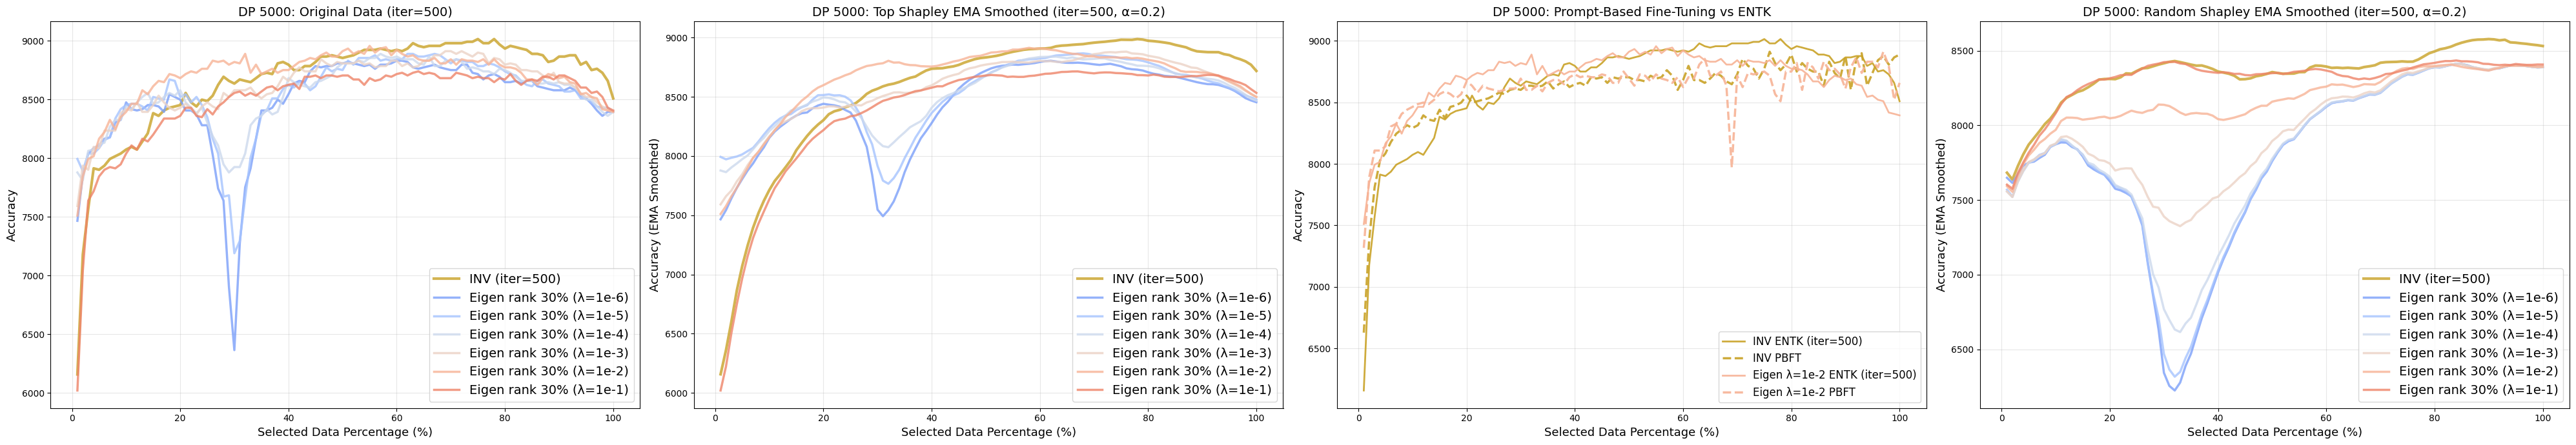

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# ===== Configuration =====
num_dp = 5000
rank = 30
iteration = 500
# =========================

def ema_smooth(data, alpha=0.2):
    """Apply Exponential Moving Average smoothing."""
    ema = [data[0]]
    for i in range(1, len(data)):
        ema.append(alpha * data[i] + (1 - alpha) * ema[-1])
    return ema

selected_dp_percent = [i for i in range(1, 101)]

# Prediction with top shapley values
inv_data      = [6158, 7179, 7569, 7913, 7901, 7936, 7993, 8016, 8039, 8073, 8096, 8073, 8142, 8211, 8383, 8360, 8406, 8429, 8440, 8452, 8555, 8475, 8440, 8498, 8486, 8532, 8624, 8693, 8658, 8635, 8670, 8658, 8647, 8681, 8716, 8727, 8716, 8807, 8819, 8796, 8750, 8750, 8784, 8784, 8819, 8865, 8865, 8876, 8865, 8853, 8865, 8876, 8899, 8922, 8922, 8922, 8933, 8922, 8911, 8922, 8911, 8933, 8979, 8956, 8945, 8956, 8956, 8956, 8979, 8979, 8979, 8979, 8991, 8991, 9014, 8979, 8979, 9014, 8968, 8933, 8956, 8945, 8933, 8922, 8888, 8888, 8876, 8819, 8830, 8865, 8865, 8876, 8876, 8796, 8819, 8750, 8761, 8727, 8658, 8509]
eigen_lam1e_6 = [7466, 7856, 8039, 8085, 8108, 8165, 8177, 8303, 8326, 8475, 8417, 8406, 8417, 8452, 8452, 8440, 8394, 8544, 8521, 8498, 8406, 8406, 8372, 8280, 8280, 8028, 7741, 7638, 6904, 6365, 7271, 7752, 7913, 8165, 8406, 8406, 8429, 8498, 8463, 8544, 8635, 8658, 8647, 8739, 8784, 8773, 8784, 8784, 8807, 8807, 8819, 8807, 8796, 8784, 8796, 8761, 8796, 8796, 8807, 8830, 8830, 8819, 8773, 8761, 8773, 8784, 8796, 8773, 8761, 8750, 8750, 8796, 8796, 8727, 8716, 8670, 8704, 8716, 8693, 8647, 8647, 8658, 8635, 8658, 8658, 8612, 8601, 8589, 8578, 8578, 8578, 8601, 8578, 8532, 8509, 8463, 8406, 8360, 8394, 8394]
eigen_lam1e_5 = [7993, 7890, 8039, 8039, 8085, 8154, 8177, 8337, 8417, 8452, 8463, 8463, 8440, 8406, 8521, 8509, 8498, 8670, 8658, 8521, 8544, 8475, 8521, 8452, 8349, 8165, 8039, 7672, 7683, 7190, 7294, 7661, 8005, 8165, 8372, 8406, 8509, 8509, 8589, 8624, 8601, 8647, 8635, 8578, 8612, 8693, 8773, 8739, 8761, 8750, 8830, 8796, 8853, 8853, 8853, 8876, 8830, 8842, 8830, 8842, 8842, 8888, 8888, 8865, 8865, 8876, 8888, 8876, 8842, 8807, 8842, 8830, 8819, 8819, 8784, 8784, 8807, 8796, 8773, 8739, 8716, 8704, 8658, 8624, 8612, 8658, 8670, 8635, 8624, 8612, 8567, 8567, 8578, 8509, 8509, 8475, 8440, 8429, 8429, 8394]
eigen_lam1e_4 = [7878, 7810, 8062, 8073, 8119, 8131, 8268, 8326, 8326, 8440, 8417, 8475, 8521, 8555, 8463, 8475, 8521, 8555, 8532, 8578, 8475, 8429, 8383, 8429, 8303, 8188, 8108, 7947, 7878, 7924, 7924, 8039, 8280, 8337, 8360, 8417, 8372, 8394, 8521, 8681, 8647, 8624, 8612, 8601, 8647, 8658, 8681, 8704, 8773, 8807, 8807, 8807, 8830, 8819, 8853, 8853, 8888, 8865, 8853, 8865, 8842, 8842, 8842, 8807, 8796, 8865, 8784, 8784, 8830, 8830, 8842, 8819, 8761, 8773, 8761, 8739, 8739, 8716, 8761, 8750, 8727, 8693, 8658, 8658, 8658, 8635, 8635, 8647, 8635, 8647, 8624, 8624, 8601, 8544, 8498, 8498, 8440, 8394, 8360, 8394]
eigen_lam1e_3 = [7592, 7936, 7901, 8096, 8085, 8234, 8234, 8234, 8383, 8417, 8406, 8475, 8394, 8394, 8452, 8532, 8475, 8429, 8406, 8429, 8463, 8417, 8372, 8440, 8475, 8440, 8417, 8555, 8521, 8578, 8578, 8578, 8601, 8544, 8509, 8544, 8555, 8612, 8693, 8658, 8727, 8773, 8739, 8739, 8739, 8842, 8807, 8784, 8819, 8807, 8807, 8807, 8830, 8796, 8807, 8773, 8784, 8784, 8830, 8830, 8784, 8807, 8773, 8784, 8830, 8830, 8876, 8876, 8911, 8911, 8888, 8911, 8888, 8865, 8899, 8888, 8807, 8853, 8842, 8796, 8807, 8796, 8750, 8750, 8739, 8739, 8704, 8681, 8727, 8647, 8635, 8635, 8601, 8555, 8521, 8521, 8475, 8440, 8417, 8394]
eigen_lam1e_2 = [7511, 7844, 7993, 8016, 8165, 8222, 8326, 8245, 8349, 8394, 8463, 8463, 8578, 8544, 8612, 8658, 8647, 8716, 8704, 8681, 8716, 8739, 8727, 8761, 8761, 8830, 8819, 8830, 8796, 8819, 8807, 8888, 8727, 8796, 8716, 8739, 8761, 8727, 8750, 8750, 8784, 8819, 8830, 8853, 8842, 8876, 8899, 8865, 8865, 8911, 8933, 8888, 8911, 8888, 8956, 8899, 8933, 8945, 8876, 8922, 8888, 8865, 8876, 8842, 8830, 8830, 8853, 8807, 8807, 8842, 8796, 8842, 8830, 8830, 8819, 8842, 8796, 8842, 8796, 8773, 8773, 8761, 8727, 8670, 8670, 8624, 8681, 8716, 8704, 8681, 8693, 8647, 8635, 8544, 8555, 8521, 8509, 8417, 8406, 8394]
eigen_lam1e_1 = [6021, 7041, 7638, 7718, 7844, 7901, 7924, 7913, 7947, 8039, 8108, 8073, 8165, 8142, 8200, 8268, 8337, 8337, 8337, 8360, 8429, 8429, 8360, 8349, 8417, 8372, 8440, 8475, 8521, 8555, 8567, 8532, 8555, 8532, 8567, 8601, 8612, 8578, 8612, 8624, 8635, 8589, 8693, 8693, 8704, 8681, 8704, 8704, 8693, 8704, 8704, 8670, 8670, 8624, 8681, 8658, 8670, 8704, 8693, 8716, 8727, 8704, 8727, 8739, 8716, 8727, 8716, 8681, 8681, 8681, 8727, 8716, 8704, 8681, 8693, 8681, 8681, 8647, 8681, 8670, 8716, 8658, 8624, 8658, 8670, 8658, 8693, 8693, 8670, 8704, 8704, 8681, 8658, 8601, 8601, 8555, 8567, 8521, 8429, 8406]

# Prediction with random shapley values
r_inv_data      = [7683, 7454, 8085, 8119, 8131, 8096, 8142, 8200, 8188, 8280, 8394, 8314, 8280, 8303, 8280, 8337, 8372, 8417, 8326, 8314, 8303, 8372, 8452, 8337, 8440, 8452, 8394, 8440, 8452, 8452, 8463, 8452, 8394, 8383, 8372, 8372, 8406, 8349, 8326, 8291, 8326, 8314, 8280, 8211, 8314, 8337, 8383, 8360, 8383, 8406, 8326, 8326, 8349, 8349, 8394, 8360, 8509, 8452, 8394, 8372, 8349, 8394, 8372, 8394, 8372, 8372, 8429, 8417, 8429, 8486, 8440, 8429, 8429, 8440, 8417, 8429, 8498, 8544, 8567, 8544, 8567, 8544, 8567, 8601, 8601, 8601, 8601, 8589, 8578, 8589, 8567, 8544, 8589, 8486, 8544, 8532, 8532, 8521, 8521, 8509]
r_eigen_lam1e_6 = [7649, 7477, 7901, 7959, 7833, 7787, 7878, 7890, 8062, 7947, 7936, 7878, 7741, 7775, 7603, 7489, 7603, 7603, 7603, 7454, 7374, 7523, 7477, 7431, 7076, 6915, 6078, 5975, 5745, 5172, 5906, 6101, 6491, 6835, 6800, 7076, 7179, 7190, 7328, 7431, 7466, 7500, 7626, 7649, 7695, 7856, 7821, 7947, 7878, 8039, 8050, 8073, 7993, 7959, 8131, 8188, 8211, 8177, 8200, 8245, 8245, 8188, 8177, 8200, 8154, 8245, 8245, 8257, 8200, 8268, 8372, 8406, 8394, 8417, 8406, 8326, 8406, 8429, 8440, 8417, 8383, 8429, 8440, 8440, 8406, 8372, 8337, 8349, 8349, 8349, 8417, 8394, 8429, 8440, 8406, 8394, 8383, 8372, 8372, 8394]
r_eigen_lam1e_5 = [7569, 7339, 8028, 7993, 7959, 7844, 7936, 7867, 8039, 7924, 8028, 7856, 7729, 7741, 7672, 7489, 7638, 7557, 7603, 7534, 7397, 7523, 7477, 7362, 7099, 6961, 6078, 6021, 6067, 5493, 5952, 6124, 6479, 6812, 6823, 7064, 7179, 7190, 7328, 7431, 7477, 7500, 7638, 7649, 7695, 7856, 7821, 7947, 7878, 8039, 8050, 8073, 7993, 7959, 8131, 8188, 8211, 8177, 8200, 8245, 8245, 8188, 8177, 8200, 8154, 8245, 8245, 8257, 8200, 8268, 8372, 8406, 8394, 8417, 8406, 8326, 8406, 8429, 8440, 8417, 8383, 8429, 8440, 8440, 8406, 8372, 8337, 8349, 8349, 8349, 8417, 8394, 8429, 8440, 8406, 8394, 8383, 8372, 8372, 8394]
r_eigen_lam1e_4 = [7557, 7374, 8028, 7970, 7970, 7844, 7913, 7878, 8039, 7947, 8039, 7856, 7741, 7718, 7672, 7534, 7683, 7569, 7603, 7546, 7385, 7511, 7511, 7408, 7133, 7064, 6342, 6330, 6571, 6181, 6411, 6376, 6548, 6904, 6869, 7156, 7282, 7225, 7351, 7454, 7466, 7546, 7661, 7649, 7706, 7856, 7810, 7947, 7890, 8039, 8039, 8073, 8005, 7947, 8131, 8188, 8211, 8177, 8211, 8257, 8245, 8188, 8177, 8200, 8154, 8245, 8257, 8257, 8200, 8268, 8372, 8406, 8394, 8417, 8417, 8326, 8406, 8429, 8440, 8417, 8383, 8429, 8440, 8440, 8406, 8360, 8337, 8349, 8349, 8349, 8417, 8394, 8429, 8440, 8406, 8394, 8383, 8372, 8372, 8394]
r_eigen_lam1e_3 = [7557, 7374, 8039, 7993, 7982, 7844, 7901, 7878, 8062, 7936, 8096, 7947, 7844, 7787, 7741, 7626, 7729, 7661, 7741, 7672, 7511, 7752, 7729, 7706, 7408, 7408, 7202, 7190, 7420, 7156, 7236, 7271, 7259, 7454, 7431, 7603, 7557, 7592, 7661, 7569, 7706, 7683, 7752, 7798, 7787, 7913, 7878, 8039, 7970, 8096, 8039, 8108, 8016, 7959, 8165, 8188, 8234, 8211, 8268, 8268, 8245, 8200, 8222, 8188, 8165, 8245, 8280, 8268, 8200, 8291, 8383, 8417, 8406, 8440, 8406, 8337, 8406, 8417, 8440, 8417, 8394, 8417, 8440, 8429, 8406, 8360, 8349, 8360, 8349, 8360, 8417, 8394, 8429, 8429, 8406, 8394, 8383, 8372, 8372, 8394]
r_eigen_lam1e_2 = [7592, 7408, 8062, 8062, 8039, 7993, 8062, 8016, 8085, 8073, 8268, 8142, 8050, 8039, 7993, 8062, 8062, 8085, 8073, 8005, 8073, 8108, 8154, 8165, 8050, 8062, 8154, 8131, 8280, 8131, 8096, 8028, 7993, 8005, 8119, 8096, 8062, 8073, 8016, 7947, 8016, 8073, 8085, 8108, 8119, 8200, 8188, 8188, 8131, 8268, 8200, 8200, 8211, 8165, 8257, 8280, 8337, 8280, 8291, 8280, 8337, 8257, 8280, 8234, 8222, 8291, 8326, 8268, 8268, 8360, 8429, 8440, 8452, 8440, 8406, 8349, 8440, 8417, 8394, 8406, 8417, 8417, 8417, 8372, 8360, 8360, 8360, 8360, 8349, 8349, 8417, 8417, 8440, 8417, 8394, 8406, 8394, 8383, 8383, 8394]
r_eigen_lam1e_1 = [7603, 7466, 8096, 8039, 8073, 8085, 8177, 8142, 8234, 8303, 8383, 8383, 8280, 8349, 8349, 8349, 8349, 8372, 8303, 8349, 8360, 8383, 8349, 8337, 8452, 8452, 8475, 8440, 8440, 8463, 8429, 8429, 8372, 8394, 8326, 8303, 8326, 8337, 8337, 8337, 8372, 8337, 8314, 8349, 8303, 8326, 8372, 8349, 8360, 8360, 8360, 8314, 8372, 8394, 8372, 8383, 8406, 8394, 8360, 8337, 8326, 8268, 8291, 8314, 8268, 8280, 8337, 8291, 8349, 8372, 8406, 8360, 8394, 8406, 8406, 8440, 8440, 8452, 8429, 8440, 8452, 8452, 8429, 8452, 8406, 8429, 8417, 8406, 8372, 8406, 8383, 8394, 8417, 8394, 8440, 8394, 8394, 8406, 8417, 8406]

# PBFT
selected_dp_percent_prompt_based_ft = [i for i in range(1, 101)]
pbft_inv           = [6628, 7385, 7810, 8028, 8085, 8177, 8245, 8280, 8314, 8291, 8314, 8394, 8360, 8349, 8440, 8372, 8463, 8475, 8498, 8555, 8498, 8509, 8521, 8532, 8555, 8578, 8567, 8601, 8612, 8601, 8635, 8635, 8624, 8635, 8670, 8612, 8647, 8670, 8624, 8647, 8658, 8635, 8704, 8693, 8704, 8658, 8704, 8693, 8704, 8704, 8681, 8681, 8670, 8716, 8693, 8704, 8761, 8716, 8601, 8681, 8796, 8681, 8681, 8658, 8693, 8739, 8716, 8670, 8647, 8727, 8853, 8796, 8773, 8693, 8773, 8911, 8819, 8761, 8807, 8888, 8750, 8819, 8773, 8750, 8750, 8635, 8830, 8739, 8693, 8876, 8601, 8853, 8899, 8635, 8739, 8842, 8876, 8807, 8865, 8888]
pbft_eigen_lam1e_2 = [7317, 7890, 8108, 8108, 8142, 8303, 8326, 8406, 8440, 8463, 8486, 8498, 8486, 8521, 8567, 8589, 8567, 8532, 8567, 8670, 8635, 8578, 8635, 8612, 8601, 8589, 8601, 8612, 8612, 8693, 8601, 8601, 8635, 8589, 8658, 8681, 8681, 8647, 8704, 8727, 8704, 8716, 8704, 8704, 8727, 8716, 8658, 8658, 8750, 8693, 8635, 8727, 8716, 8670, 8727, 8693, 8681, 8658, 8704, 8624, 8704, 8693, 8807, 8853, 8716, 8716, 8750, 8635, 7970, 8716, 8624, 8739, 8727, 8739, 8750, 8716, 8567, 8509, 8750, 8750, 8819, 8601, 8819, 8784, 8693, 8830, 8761, 8773, 8727, 8612, 8784, 8865, 8739, 8830, 8830, 8784, 8911, 8796, 8521, 8658]

# Apply EMA smoothing for top shapley values
alpha = 0.2  # smoothing factor (0.1-0.3 typically works well)
inv_ema = ema_smooth(inv_data, alpha)
eigen_ema_1e6 = ema_smooth(eigen_lam1e_6, alpha)
eigen_ema_1e5 = ema_smooth(eigen_lam1e_5, alpha)
eigen_ema_1e4 = ema_smooth(eigen_lam1e_4, alpha)
eigen_ema_1e3 = ema_smooth(eigen_lam1e_3, alpha)
eigen_ema_1e2 = ema_smooth(eigen_lam1e_2, alpha)
eigen_ema_1e1 = ema_smooth(eigen_lam1e_1, alpha)

# Apply EMA smoothing for random shapley values
r_inv_ema = ema_smooth(r_inv_data, alpha) if r_inv_data else []
r_eigen_ema_1e6 = ema_smooth(r_eigen_lam1e_6, alpha) if r_eigen_lam1e_6 else []
r_eigen_ema_1e5 = ema_smooth(r_eigen_lam1e_5, alpha) if r_eigen_lam1e_5 else []
r_eigen_ema_1e4 = ema_smooth(r_eigen_lam1e_4, alpha) if r_eigen_lam1e_4 else []
r_eigen_ema_1e3 = ema_smooth(r_eigen_lam1e_3, alpha) if r_eigen_lam1e_3 else []
r_eigen_ema_1e2 = ema_smooth(r_eigen_lam1e_2, alpha) if r_eigen_lam1e_2 else []
r_eigen_ema_1e1 = ema_smooth(r_eigen_lam1e_1, alpha) if r_eigen_lam1e_1 else []

# Create figure with 4 subplots
fig, axes = plt.subplots(1, 4, figsize=(40, 7))

# Lambda configs
lambda_configs_orig = [
    (eigen_lam1e_6, '1e-6', 'o'),
    (eigen_lam1e_5, '1e-5', 's'),
    (eigen_lam1e_4, '1e-4', 'D'),
    (eigen_lam1e_3, '1e-3', 'v'),
    (eigen_lam1e_2, '1e-2', '^'),
    (eigen_lam1e_1, '1e-1', '<'),
]

lambda_configs_ema = [
    (eigen_ema_1e6, '1e-6', 'o'),
    (eigen_ema_1e5, '1e-5', 's'),
    (eigen_ema_1e4, '1e-4', 'D'),
    (eigen_ema_1e3, '1e-3', 'v'),
    (eigen_ema_1e2, '1e-2', '^'),
    (eigen_ema_1e1, '1e-1', '<'),
]

lambda_configs_random_ema = [
    (r_eigen_ema_1e6, '1e-6', 'o'),
    (r_eigen_ema_1e5, '1e-5', 's'),
    (r_eigen_ema_1e4, '1e-4', 'D'),
    (r_eigen_ema_1e3, '1e-3', 'v'),
    (r_eigen_ema_1e2, '1e-2', '^'),
    (r_eigen_ema_1e1, '1e-1', '<'),
]

colors = plt.cm.coolwarm(np.linspace(0.2, 0.8, len(lambda_configs_orig)))

# Color settings for consistency
inv_color = '#C9A227'
eigen_1e2_color = colors[4]  # Lambda 1e-2 color

# ===== Subplot (1,1): Original data =====
ax_left = axes[0]

# Plot baseline (Original)
ax_left.plot(selected_dp_percent, inv_data, 
         color=inv_color, linewidth=3, linestyle='-', 
         label=f'INV (iter={iteration})', alpha=0.8)

# Plot eigen with different lambda values (Original)
for i, (data, lam_label, marker) in enumerate(lambda_configs_orig):
    ax_left.plot(selected_dp_percent, data, 
             color=colors[i], linewidth=2.5, linestyle='-', 
             label=f'Eigen rank {rank}% (λ={lam_label})', alpha=0.8)

ax_left.set_xlabel('Selected Data Percentage (%)', fontsize=13)
ax_left.set_ylabel('Accuracy', fontsize=13)
ax_left.set_title(f'DP {num_dp}: Original Data (iter={iteration})', fontsize=14)
ax_left.legend(fontsize=14, loc='best')
ax_left.grid(True, alpha=0.3)

# ===== Subplot (1,2): Top Shapley EMA smoothed =====
ax_middle = axes[1]

# Plot baseline (EMA)
ax_middle.plot(selected_dp_percent, inv_ema, 
         color=inv_color, linewidth=3, linestyle='-', 
         label=f'INV (iter={iteration})', alpha=0.8)

# Plot eigen with different lambda values (EMA)
for i, (data, lam_label, marker) in enumerate(lambda_configs_ema):
    ax_middle.plot(selected_dp_percent, data, 
             color=colors[i], linewidth=2.5, linestyle='-', 
             label=f'Eigen rank {rank}% (λ={lam_label})', alpha=0.8)

ax_middle.set_xlabel('Selected Data Percentage (%)', fontsize=13)
ax_middle.set_ylabel('Accuracy (EMA Smoothed)', fontsize=13)
ax_middle.set_title(f'DP {num_dp}: Top Shapley EMA Smoothed (iter={iteration}, α={alpha})', fontsize=14)
ax_middle.legend(fontsize=14, loc='best')
ax_middle.grid(True, alpha=0.3)

# ===== Subplot (1,3): Prompt-Based Fine-Tuning vs ENTK =====
ax_pbft = axes[2]

# Use all 100 data points for ENTK (1% to 100%)
entk_selected_percent = selected_dp_percent  # [1, 2, 3, ..., 100]
entk_inv_values = inv_data  # All 100 values
entk_eigen_1e2_values = eigen_lam1e_2  # All 100 values

# Plot INV: ENTK (solid, no marker) and PBFT (dashed, no marker)
ax_pbft.plot(entk_selected_percent, entk_inv_values, 
         color=inv_color, linewidth=2.0, linestyle='-', 
         label=f'INV ENTK (iter={iteration})', alpha=0.9)
ax_pbft.plot(selected_dp_percent_prompt_based_ft, pbft_inv, 
         color=inv_color, linewidth=2.5, linestyle='--', 
         label='INV PBFT', alpha=0.9)

# Plot Eigen λ=1e-2: ENTK (solid, no marker) and PBFT (dashed, no marker)
ax_pbft.plot(entk_selected_percent, entk_eigen_1e2_values, 
         color=eigen_1e2_color, linewidth=2.0, linestyle='-', 
         label=f'Eigen λ=1e-2 ENTK (iter={iteration})', alpha=0.9)
ax_pbft.plot(selected_dp_percent_prompt_based_ft, pbft_eigen_lam1e_2, 
         color=eigen_1e2_color, linewidth=2.5, linestyle='--', 
         label='Eigen λ=1e-2 PBFT', alpha=0.9)

ax_pbft.set_xlabel('Selected Data Percentage (%)', fontsize=13)
ax_pbft.set_ylabel('Accuracy', fontsize=13)
ax_pbft.set_title(f'DP {num_dp}: Prompt-Based Fine-Tuning vs ENTK', fontsize=14)
ax_pbft.legend(fontsize=12, loc='best')
ax_pbft.grid(True, alpha=0.3)

# ===== Subplot (1,4): Random Shapley EMA smoothed =====
ax_right = axes[3]

# Plot baseline (Random EMA)
if r_inv_ema:
    ax_right.plot(selected_dp_percent, r_inv_ema, 
             color=inv_color, linewidth=3, linestyle='-', 
             label=f'INV (iter={iteration})', alpha=0.8)

# Plot eigen with different lambda values (Random EMA)
for i, (data, lam_label, marker) in enumerate(lambda_configs_random_ema):
    if data:  # Only plot if data exists
        ax_right.plot(selected_dp_percent, data, 
                 color=colors[i], linewidth=2.5, linestyle='-', 
                 label=f'Eigen rank {rank}% (λ={lam_label})', alpha=0.8)

ax_right.set_xlabel('Selected Data Percentage (%)', fontsize=13)
ax_right.set_ylabel('Accuracy (EMA Smoothed)', fontsize=13)
ax_right.set_title(f'DP {num_dp}: Random Shapley EMA Smoothed (iter={iteration}, α={alpha})', fontsize=14)
ax_right.legend(fontsize=14, loc='best')
ax_right.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

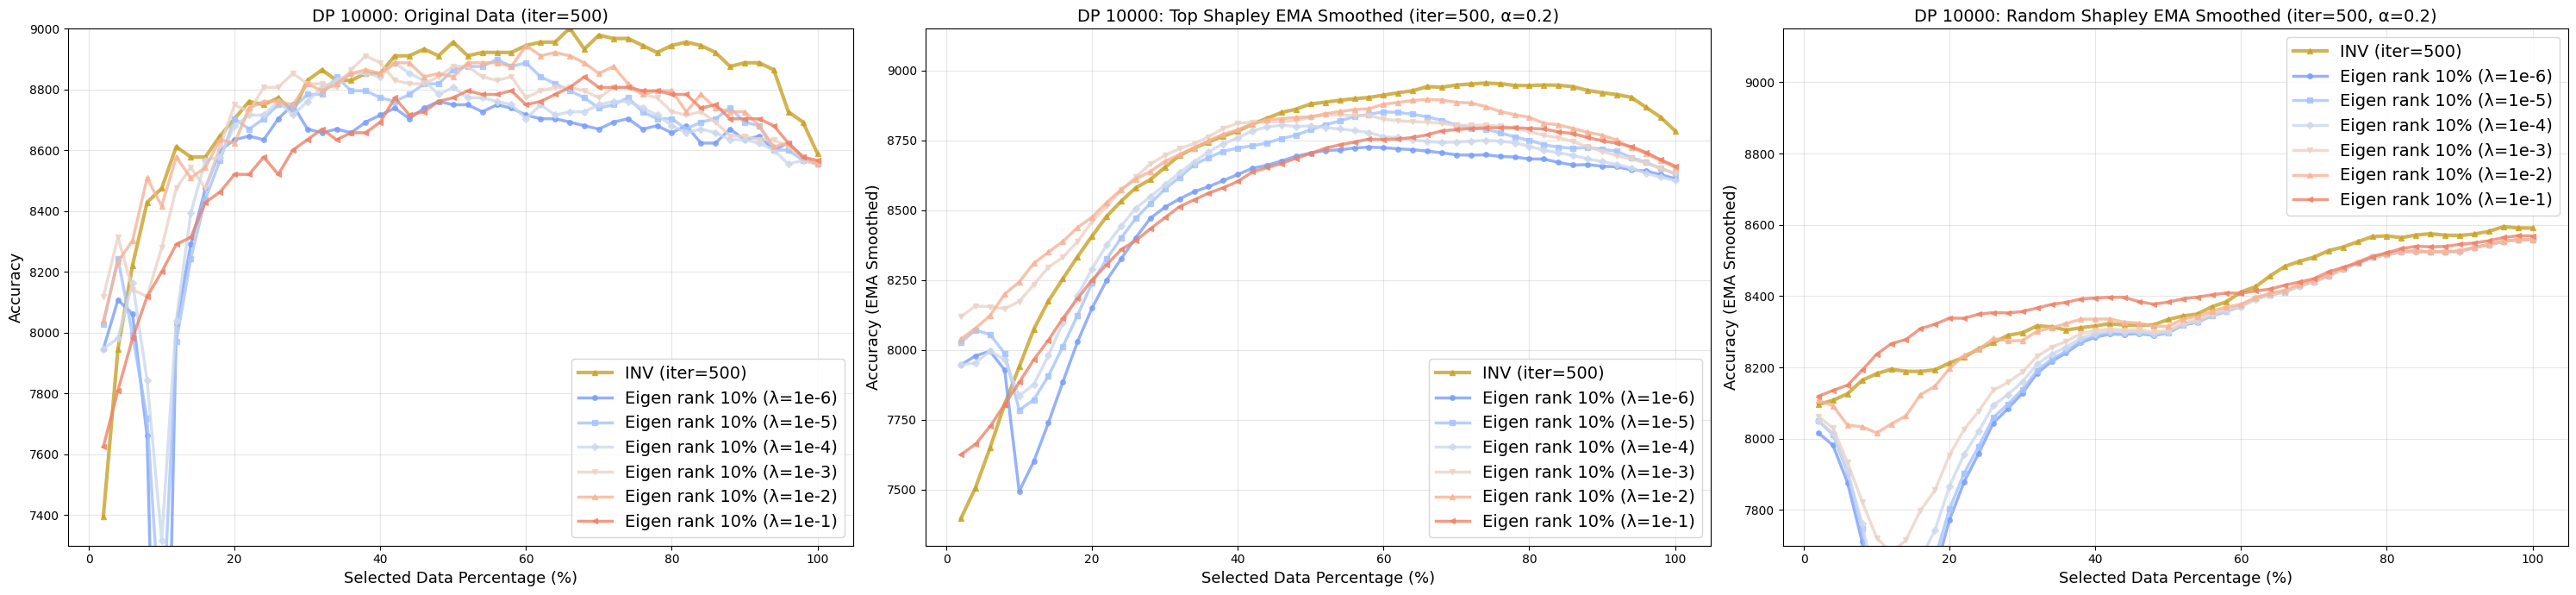

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# ===== Configuration =====
num_dp = 10000
rank = 10
iteration = 500
# =========================

def ema_smooth(data, alpha=0.2):
    """Apply Exponential Moving Average smoothing."""
    ema = [data[0]]
    for i in range(1, len(data)):
        ema.append(alpha * data[i] + (1 - alpha) * ema[-1])
    return ema

selected_dp_percent = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100]

# Prediction with top shapley values
inv_data      = [7397, 7947, 8222, 8429, 8475, 8612, 8578, 8578, 8647, 8704, 8761, 8750, 8773, 8727, 8830, 8865, 8830, 8830, 8853, 8853, 8911, 8911, 8933, 8911, 8956, 8911, 8922, 8922, 8922, 8945, 8956, 8956, 9002, 8933, 8979, 8968, 8968, 8945, 8922, 8945, 8956, 8945, 8922, 8876, 8888, 8888, 8865, 8727, 8693, 8589]
eigen_lam1e_6 = [7947, 8108, 8062, 7661, 5757, 8028, 8291, 8475, 8601, 8635, 8647, 8635, 8704, 8750, 8670, 8658, 8670, 8658, 8693, 8716, 8739, 8704, 8739, 8761, 8750, 8750, 8727, 8750, 8739, 8716, 8704, 8704, 8693, 8681, 8670, 8693, 8704, 8670, 8681, 8658, 8681, 8624, 8624, 8670, 8635, 8647, 8601, 8624, 8578, 8555]
eigen_lam1e_5 = [8028, 8245, 7993, 7718, 6972, 7970, 8245, 8440, 8567, 8704, 8670, 8704, 8750, 8739, 8784, 8784, 8842, 8796, 8796, 8773, 8761, 8784, 8819, 8819, 8865, 8876, 8876, 8899, 8876, 8888, 8842, 8819, 8796, 8773, 8739, 8750, 8773, 8727, 8704, 8704, 8670, 8693, 8704, 8739, 8693, 8681, 8601, 8601, 8567, 8555]
eigen_lam1e_4 = [7947, 7982, 8165, 7844, 7317, 8039, 8394, 8567, 8578, 8681, 8716, 8716, 8761, 8716, 8761, 8807, 8830, 8853, 8853, 8842, 8888, 8853, 8830, 8784, 8807, 8773, 8773, 8761, 8750, 8704, 8750, 8716, 8727, 8727, 8750, 8761, 8761, 8739, 8716, 8681, 8658, 8670, 8658, 8635, 8635, 8624, 8601, 8555, 8567, 8555]
eigen_lam1e_3 = [8119, 8314, 8142, 8119, 8280, 8475, 8544, 8475, 8612, 8750, 8727, 8807, 8807, 8853, 8819, 8819, 8807, 8865, 8911, 8888, 8830, 8819, 8819, 8842, 8876, 8876, 8842, 8830, 8842, 8773, 8796, 8807, 8807, 8796, 8773, 8807, 8807, 8784, 8773, 8727, 8716, 8727, 8693, 8647, 8647, 8635, 8635, 8612, 8578, 8555]
eigen_lam1e_2 = [8039, 8234, 8303, 8509, 8417, 8578, 8509, 8544, 8635, 8624, 8739, 8761, 8761, 8750, 8819, 8796, 8819, 8853, 8865, 8853, 8888, 8888, 8842, 8853, 8842, 8888, 8888, 8888, 8876, 8945, 8911, 8922, 8911, 8888, 8853, 8876, 8819, 8784, 8796, 8796, 8727, 8784, 8739, 8727, 8727, 8681, 8612, 8624, 8578, 8555]
eigen_lam1e_1 = [7626, 7810, 7982, 8119, 8200, 8291, 8314, 8429, 8463, 8521, 8521, 8578, 8521, 8601, 8635, 8670, 8635, 8658, 8658, 8693, 8773, 8716, 8727, 8761, 8773, 8796, 8784, 8784, 8796, 8750, 8761, 8784, 8807, 8842, 8807, 8807, 8807, 8796, 8796, 8784, 8784, 8739, 8750, 8704, 8704, 8704, 8681, 8624, 8578, 8567]

# Prediction with random shapley values
r_inv_data      = [8096, 8154, 8200, 8314, 8257, 8245, 8165, 8188, 8211, 8291, 8291, 8349, 8337, 8372, 8326, 8394, 8303, 8268, 8337, 8337, 8349, 8303, 8314, 8326, 8394, 8383, 8372, 8452, 8440, 8521, 8486, 8578, 8589, 8555, 8555, 8601, 8578, 8612, 8624, 8578, 8544, 8601, 8589, 8555, 8567, 8589, 8612, 8647, 8578, 8589]
r_eigen_lam1e_6 = [8016, 7844, 7454, 7053, 5780, 7305, 7592, 8085, 8062, 8360, 8303, 8280, 8383, 8245, 8303, 8406, 8349, 8337, 8383, 8349, 8326, 8291, 8303, 8268, 8326, 8406, 8360, 8417, 8406, 8429, 8475, 8452, 8440, 8498, 8486, 8521, 8555, 8555, 8578, 8544, 8555, 8532, 8521, 8521, 8532, 8578, 8578, 8589, 8578, 8555]
r_eigen_lam1e_5 = [8050, 7856, 7477, 7122, 6112, 7294, 7592, 8085, 8062, 8360, 8303, 8280, 8383, 8245, 8303, 8406, 8349, 8337, 8383, 8349, 8326, 8291, 8303, 8268, 8326, 8406, 8360, 8417, 8406, 8429, 8475, 8452, 8440, 8498, 8486, 8521, 8555, 8555, 8578, 8544, 8555, 8532, 8521, 8521, 8532, 8578, 8578, 8589, 8578, 8555]
r_eigen_lam1e_4 = [8050, 7878, 7489, 7167, 6812, 7374, 7649, 8096, 8062, 8360, 8314, 8280, 8383, 8245, 8303, 8406, 8349, 8337, 8383, 8349, 8326, 8291, 8303, 8268, 8326, 8406, 8360, 8417, 8406, 8417, 8475, 8452, 8440, 8498, 8486, 8521, 8555, 8555, 8578, 8544, 8555, 8532, 8521, 8521, 8532, 8578, 8578, 8589, 8578, 8555]
r_eigen_lam1e_3 = [8062, 7901, 7546, 7385, 7317, 7511, 7856, 8131, 8085, 8349, 8314, 8280, 8372, 8245, 8303, 8406, 8360, 8337, 8383, 8337, 8326, 8291, 8314, 8268, 8326, 8406, 8372, 8417, 8417, 8406, 8475, 8452, 8440, 8498, 8486, 8521, 8555, 8555, 8578, 8544, 8555, 8532, 8521, 8521, 8532, 8578, 8578, 8589, 8578, 8555]
r_eigen_lam1e_2 = [8108, 8028, 7821, 8016, 7947, 8142, 8154, 8360, 8245, 8394, 8383, 8314, 8406, 8245, 8280, 8406, 8349, 8372, 8383, 8337, 8337, 8291, 8314, 8280, 8314, 8417, 8372, 8417, 8417, 8406, 8475, 8452, 8452, 8498, 8486, 8521, 8555, 8567, 8578, 8544, 8555, 8532, 8509, 8532, 8532, 8578, 8578, 8589, 8578, 8555]
r_eigen_lam1e_1 = [8119, 8200, 8211, 8360, 8417, 8383, 8326, 8429, 8372, 8406, 8337, 8394, 8372, 8349, 8372, 8406, 8417, 8406, 8429, 8406, 8406, 8394, 8337, 8349, 8406, 8429, 8417, 8429, 8429, 8406, 8440, 8440, 8475, 8475, 8486, 8544, 8532, 8544, 8578, 8567, 8578, 8567, 8532, 8544, 8567, 8567, 8578, 8601, 8589, 8567]

# Apply EMA smoothing for top shapley values
alpha = 0.2  # smoothing factor (0.1-0.3 typically works well)
inv_ema = ema_smooth(inv_data, alpha) if inv_data else []
eigen_ema_1e6 = ema_smooth(eigen_lam1e_6, alpha) if eigen_lam1e_6 else []
eigen_ema_1e5 = ema_smooth(eigen_lam1e_5, alpha) if eigen_lam1e_5 else []
eigen_ema_1e4 = ema_smooth(eigen_lam1e_4, alpha) if eigen_lam1e_4 else []
eigen_ema_1e3 = ema_smooth(eigen_lam1e_3, alpha) if eigen_lam1e_3 else []
eigen_ema_1e2 = ema_smooth(eigen_lam1e_2, alpha) if eigen_lam1e_2 else []
eigen_ema_1e1 = ema_smooth(eigen_lam1e_1, alpha) if eigen_lam1e_1 else []

# Apply EMA smoothing for random shapley values
r_inv_ema = ema_smooth(r_inv_data, alpha) if r_inv_data else []
r_eigen_ema_1e6 = ema_smooth(r_eigen_lam1e_6, alpha) if r_eigen_lam1e_6 else []
r_eigen_ema_1e5 = ema_smooth(r_eigen_lam1e_5, alpha) if r_eigen_lam1e_5 else []
r_eigen_ema_1e4 = ema_smooth(r_eigen_lam1e_4, alpha) if r_eigen_lam1e_4 else []
r_eigen_ema_1e3 = ema_smooth(r_eigen_lam1e_3, alpha) if r_eigen_lam1e_3 else []
r_eigen_ema_1e2 = ema_smooth(r_eigen_lam1e_2, alpha) if r_eigen_lam1e_2 else []
r_eigen_ema_1e1 = ema_smooth(r_eigen_lam1e_1, alpha) if r_eigen_lam1e_1 else []

# Create figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(30, 7))

# Lambda configs
lambda_configs_orig = [
    (eigen_lam1e_6, '1e-6', 'o'),
    (eigen_lam1e_5, '1e-5', 's'),
    (eigen_lam1e_4, '1e-4', 'D'),
    (eigen_lam1e_3, '1e-3', 'v'),
    (eigen_lam1e_2, '1e-2', '^'),
    (eigen_lam1e_1, '1e-1', '<'),
]

lambda_configs_ema = [
    (eigen_ema_1e6, '1e-6', 'o'),
    (eigen_ema_1e5, '1e-5', 's'),
    (eigen_ema_1e4, '1e-4', 'D'),
    (eigen_ema_1e3, '1e-3', 'v'),
    (eigen_ema_1e2, '1e-2', '^'),
    (eigen_ema_1e1, '1e-1', '<'),
]

lambda_configs_random_ema = [
    (r_eigen_ema_1e6, '1e-6', 'o'),
    (r_eigen_ema_1e5, '1e-5', 's'),
    (r_eigen_ema_1e4, '1e-4', 'D'),
    (r_eigen_ema_1e3, '1e-3', 'v'),
    (r_eigen_ema_1e2, '1e-2', '^'),
    (r_eigen_ema_1e1, '1e-1', '<'),
]

colors = plt.cm.coolwarm(np.linspace(0.2, 0.8, len(lambda_configs_orig)))

# ===== Left subplot (1,1): Original data =====
ax_left = axes[0]

# Plot baseline (Original)
if inv_data:
    ax_left.plot(selected_dp_percent, inv_data, 
             color='#C9A227', linewidth=3, linestyle='-', 
             label=f'INV (iter={iteration})', marker='^', markersize=5, alpha=0.8)

# Plot eigen with different lambda values (Original)
for i, (data, lam_label, marker) in enumerate(lambda_configs_orig):
    if data:
        ax_left.plot(selected_dp_percent, data, 
                 color=colors[i], linewidth=2.5, linestyle='-', 
                 label=f'Eigen rank {rank}% (λ={lam_label})', 
                 marker=marker, markersize=4, alpha=0.8)

ax_left.set_xlabel('Selected Data Percentage (%)', fontsize=13)
ax_left.set_ylabel('Accuracy', fontsize=13)
ax_left.set_title(f'DP {num_dp}: Original Data (iter={iteration})', fontsize=14)
ax_left.set_ylim(7300, 9000)
ax_left.legend(fontsize=14, loc='best')
ax_left.grid(True, alpha=0.3)

# ===== Middle subplot (1,2): Top Shapley EMA smoothed =====
ax_middle = axes[1]

# Plot baseline (EMA)
if inv_ema:
    ax_middle.plot(selected_dp_percent, inv_ema, 
             color='#C9A227', linewidth=3, linestyle='-', 
             label=f'INV (iter={iteration})', marker='^', markersize=5, alpha=0.8)

# Plot eigen with different lambda values (EMA)
for i, (data, lam_label, marker) in enumerate(lambda_configs_ema):
    if data:
        ax_middle.plot(selected_dp_percent, data, 
                 color=colors[i], linewidth=2.5, linestyle='-', 
                 label=f'Eigen rank {rank}% (λ={lam_label})', 
                 marker=marker, markersize=4, alpha=0.8)

ax_middle.set_xlabel('Selected Data Percentage (%)', fontsize=13)
ax_middle.set_ylabel('Accuracy (EMA Smoothed)', fontsize=13)
ax_middle.set_title(f'DP {num_dp}: Top Shapley EMA Smoothed (iter={iteration}, α={alpha})', fontsize=14)
ax_middle.set_ylim(7300, 9150)
ax_middle.legend(fontsize=14, loc='best')
ax_middle.grid(True, alpha=0.3)

# ===== Right subplot (1,3): Random Shapley EMA smoothed =====
ax_right = axes[2]

# Plot baseline (Random EMA)
if r_inv_ema:
    ax_right.plot(selected_dp_percent, r_inv_ema, 
             color='#C9A227', linewidth=3, linestyle='-', 
             label=f'INV (iter={iteration})', marker='^', markersize=5, alpha=0.8)

# Plot eigen with different lambda values (Random EMA)
for i, (data, lam_label, marker) in enumerate(lambda_configs_random_ema):
    if data:  # Only plot if data exists
        ax_right.plot(selected_dp_percent, data, 
                 color=colors[i], linewidth=2.5, linestyle='-', 
                 label=f'Eigen rank {rank}% (λ={lam_label})', 
                 marker=marker, markersize=4, alpha=0.8)

ax_right.set_xlabel('Selected Data Percentage (%)', fontsize=13)
ax_right.set_ylabel('Accuracy (EMA Smoothed)', fontsize=13)
ax_right.set_title(f'DP {num_dp}: Random Shapley EMA Smoothed (iter={iteration}, α={alpha})', fontsize=14)
ax_right.set_ylim(7700, 9150)
ax_right.legend(fontsize=14, loc='best')
ax_right.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

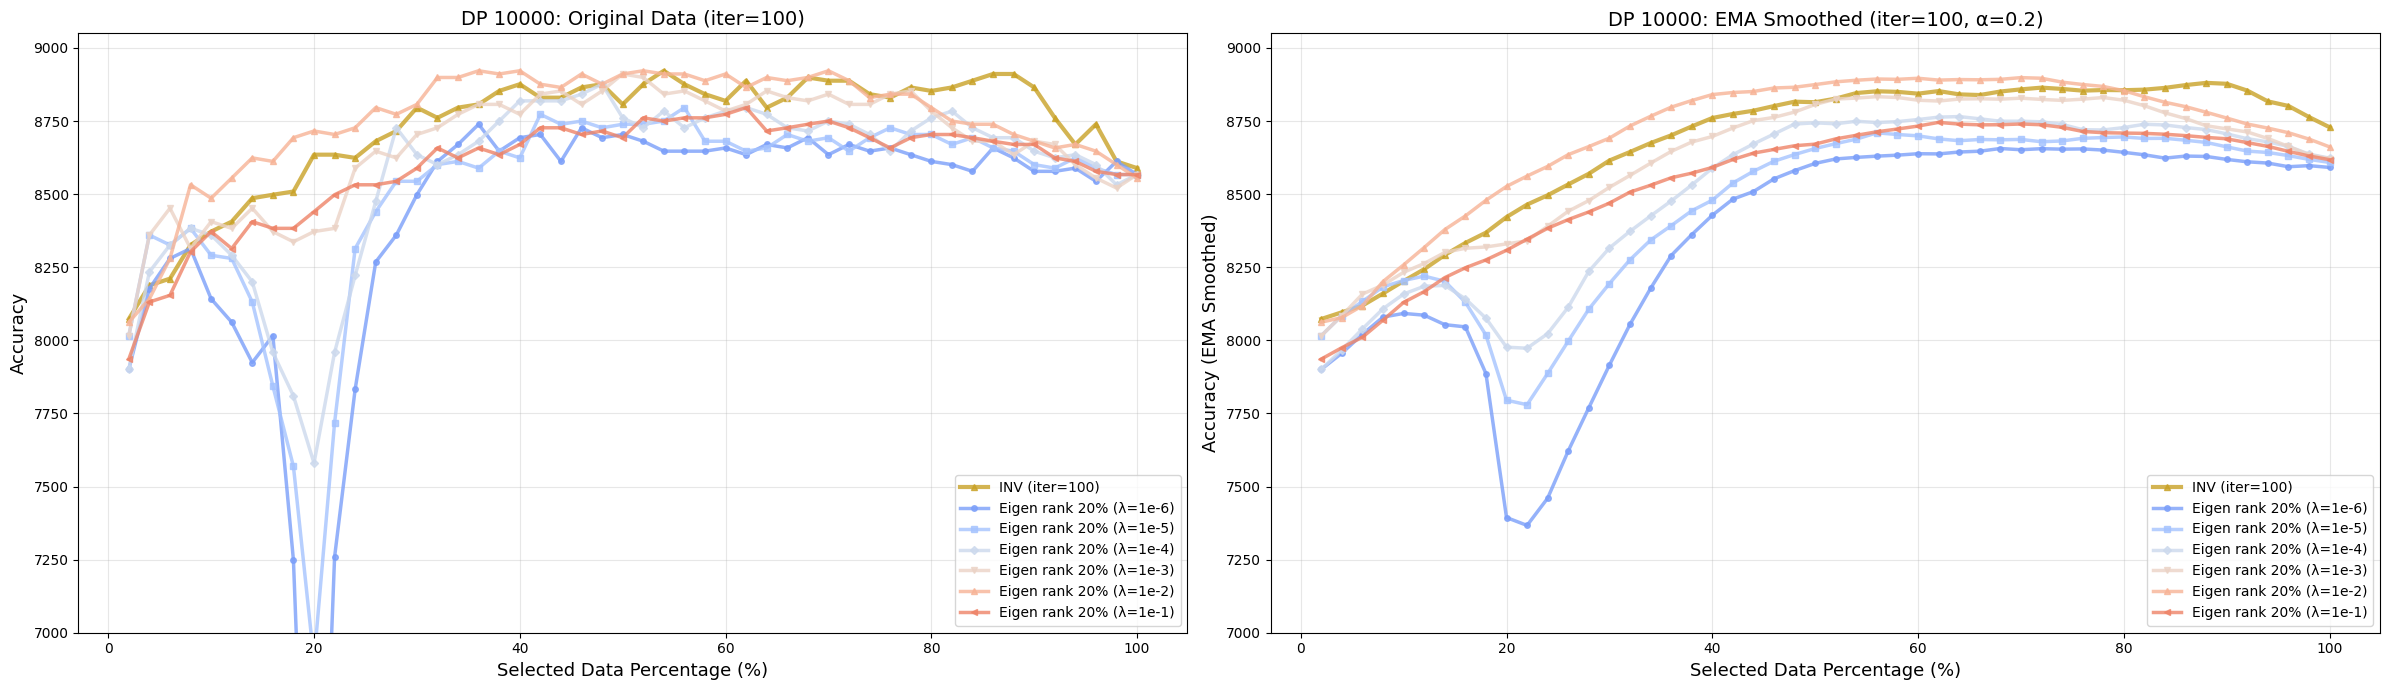

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# ===== Configuration =====
num_dp = 10000
rank = 20
iteration = 500
# =========================

def ema_smooth(data, alpha=0.2):
    """Apply Exponential Moving Average smoothing."""
    ema = [data[0]]
    for i in range(1, len(data)):
        ema.append(alpha * data[i] + (1 - alpha) * ema[-1])
    return ema

selected_dp_percent = [i for i in range(1, 101)]

# Prediction with top shapley values
inv_data      = [7397, 7947, 8222, 8429, 8475, 8612, 8578, 8578, 8647, 8704, 8761, 8750, 8773, 8727, 8830, 8865, 8830, 8830, 8853, 8853, 8911, 8911, 8933, 8911, 8956, 8911, 8922, 8922, 8922, 8945, 8956, 8956, 9002, 8933, 8979, 8968, 8968, 8945, 8922, 8945, 8956, 8945, 8922, 8876, 8888, 8888, 8865, 8727, 8693, 8589]
eigen_lam1e_6 = [7947, 8417, 8498, 8589, 8452, 8372, 8440, 8177, 7385, 5963, 7752, 8337, 8544, 8693, 8773, 8761, 8761, 8888, 8842, 8911, 8888, 8911, 8888, 8945, 8888, 8888, 8899, 8830, 8796, 8784, 8830, 8807, 8830, 8933, 8796, 8819, 8865, 8784, 8773, 8773, 8807, 8739, 8727, 8704, 8647, 8681, 8716, 8624, 8601, 8567]
eigen_lam1e_5 = [7936, 8211, 8154, 8291, 8383, 8440, 8429, 8394, 8337, 8326, 8303, 8360, 8383, 8360, 8521, 8280, 8062, 7729, 7443, 7122, 7431, 7947, 8234, 8394, 8406, 8509, 8521, 8589, 8658, 8635, 8681, 8704, 8819, 8819, 8830, 8865, 8796, 8796, 8796, 8739, 8704, 8773, 8784, 8784, 8842, 8773, 8842, 8853, 8865, 8933, 8911, 8888, 8853, 8876, 8899, 8911, 8922, 8853, 8876, 8888, 8853, 8865, 8876, 8865, 8911, 8899, 8842, 8819, 8807, 8773, 8761, 8830, 8842, 8876, 8865, 8876, 8865, 8865, 8842, 8819, 8819, 8830, 8807, 8819, 8819, 8796, 8796, 8784, 8819, 8739, 8750, 8704, 8647, 8704, 8624, 8658, 8601, 8567, 8555, 8567]
eigen_lam1e_4 = [7856, 8234, 8291, 8303, 8383, 8394, 8475, 8406, 8360, 8417, 8452, 8440, 8463, 8394, 8429, 8303, 8154, 7936, 7856, 7993, 7970, 8142, 8257, 8452, 8532, 8612, 8727, 8750, 8796, 8842, 8853, 8853, 8911, 8830, 8865, 8830, 8876, 8888, 8933, 8876, 8922, 8865, 8911, 8956, 8956, 8968, 8968, 8968, 8991, 8991, 8945, 8956, 8956, 8979, 8979, 8979, 8979, 8956, 8911, 8956, 8945, 8922, 8899, 8922, 8911, 8899, 8899, 8888, 8899, 8888, 8842, 8888, 8888, 8888, 8876, 8830, 8830, 8819, 8842, 8830, 8853, 8819, 8819, 8784, 8784, 8819, 8807, 8819, 8761, 8750, 8716, 8716, 8658, 8635, 8658, 8635, 8635, 8589, 8544, 8567]
eigen_lam1e_3 = [7741, 8028, 8326, 8337, 8360, 8452, 8475, 8452, 8440, 8463, 8452, 8555, 8544, 8463, 8498, 8509, 8544, 8578, 8521, 8544, 8463, 8498, 8589, 8589, 8567, 8601, 8716, 8830, 8830, 8865, 8819, 8819, 8911, 8945, 8945, 9014, 8979, 9037, 9014, 8956, 8979, 8991, 9002, 8956, 8968, 8968, 8933, 8945, 8911, 8899, 8922, 8956, 8911, 8876, 8888, 8876, 8876, 8945, 8922, 8922, 8911, 8945, 8933, 8945, 8899, 8888, 8865, 8842, 8865, 8888, 8888, 8865, 8899, 8899, 8911, 8899, 8888, 8842, 8842, 8819, 8830, 8819, 8853, 8853, 8819, 8796, 8761, 8784, 8784, 8784, 8761, 8693, 8681, 8693, 8681, 8635, 8624, 8601, 8567, 8567]
eigen_lam1e_2 = [7317, 7924, 8222, 8337, 8326, 8394, 8475, 8463, 8509, 8578, 8612, 8601, 8567, 8635, 8589, 8612, 8670, 8727, 8681, 8693, 8704, 8716, 8773, 8830, 8807, 8819, 8876, 8876, 8911, 8888, 8888, 8865, 8888, 8899, 8888, 8956, 8933, 8922, 8991, 8956, 8956, 9025, 8979, 9002, 8991, 8979, 9002, 8945, 8979, 8991, 9014, 9002, 9014, 9025, 9025, 9025, 9014, 9002, 9002, 8991, 9014, 9025, 9025, 9002, 9002, 9025, 9025, 9002, 8968, 8956, 8968, 8945, 8945, 8945, 8956, 8911, 8911, 8922, 8899, 8888, 8888, 8865, 8853, 8853, 8865, 8865, 8853, 8819, 8784, 8796, 8761, 8807, 8773, 8761, 8716, 8704, 8693, 8635, 8555, 8555]
eigen_lam1e_1 = [7213, 7489, 7683, 7833, 7959, 7936, 7947, 8005, 8131, 8188, 8222, 8268, 8314, 8326, 8429, 8486, 8532, 8544, 8544, 8544, 8589, 8567, 8589, 8624, 8612, 8612, 8612, 8612, 8647, 8601, 8624, 8647, 8647, 8670, 8647, 8693, 8739, 8693, 8716, 8704, 8658, 8693, 8716, 8773, 8750, 8750, 8784, 8796, 8807, 8830, 8807, 8773, 8819, 8830, 8842, 8842, 8865, 8853, 8842, 8807, 8807, 8819, 8819, 8807, 8784, 8819, 8842, 8807, 8830, 8853, 8899, 8911, 8899, 8888, 8922, 8865, 8842, 8807, 8807, 8819, 8819, 8796, 8784, 8750, 8750, 8716, 8773, 8727, 8716, 8716, 8704, 8704, 8658, 8658, 8647, 8670, 8647, 8635, 8567, 8567]

# Prediction with random shapley values
r_inv_data      = [8096, 8154, 8200, 8314, 8257, 8245, 8165, 8188, 8211, 8291, 8291, 8349, 8337, 8372, 8326, 8394, 8303, 8268, 8337, 8337, 8349, 8303, 8314, 8326, 8394, 8383, 8372, 8452, 8440, 8521, 8486, 8578, 8589, 8555, 8555, 8601, 8578, 8612, 8624, 8578, 8544, 8601, 8589, 8555, 8567, 8589, 8612, 8647, 8578, 8589]
r_eigen_lam1e_6 = [8085, 8050, 7913, 8062, 7878, 7569, 7087, 7122, 6479, 5711, 7122, 7374, 7615, 7729, 7878, 8096, 8085, 8211, 8177, 8211, 8360, 8314, 8360, 8326, 8383, 8486, 8532, 8475, 8509, 8452, 8463, 8452, 8475, 8486, 8521, 8429, 8509, 8521, 8498, 8440, 8486, 8521, 8509, 8567, 8498, 8532, 8578, 8544, 8532, 8567]
r_eigen_lam1e_5 = [7764, 8062, 7764, 8131, 8028, 7947, 7970, 8073, 8028, 7901, 7718, 7603, 7305, 7156, 7328, 7076, 6812, 6502, 6227, 5883, 6502, 7133, 7248, 7374, 7362, 7615, 7741, 7729, 7764, 7878, 8016, 8108, 8016, 8085, 8154, 8211, 8222, 8177, 8165, 8211, 8303, 8360, 8372, 8314, 8337, 8360, 8303, 8326, 8349, 8383, 8509, 8486, 8452, 8532, 8440, 8475, 8475, 8509, 8498, 8452, 8452, 8463, 8452, 8452, 8475, 8475, 8498, 8486, 8532, 8521, 8509, 8429, 8463, 8509, 8555, 8521, 8475, 8498, 8475, 8440, 8463, 8486, 8509, 8521, 8498, 8509, 8509, 8567, 8486, 8498, 8475, 8532, 8532, 8578, 8555, 8544, 8578, 8532, 8521, 8567]
r_eigen_lam1e_4 = [7741, 8050, 7798, 8119, 8028, 7959, 7970, 8073, 8050, 7924, 7741, 7638, 7305, 7167, 7362, 7144, 6984, 6732, 6640, 6755, 7007, 7259, 7385, 7420, 7362, 7661, 7752, 7741, 7775, 7878, 8005, 8108, 8016, 8085, 8165, 8211, 8211, 8177, 8165, 8211, 8303, 8360, 8372, 8314, 8337, 8360, 8303, 8326, 8349, 8383, 8509, 8486, 8463, 8532, 8440, 8475, 8475, 8498, 8498, 8452, 8452, 8463, 8452, 8452, 8475, 8475, 8498, 8486, 8532, 8521, 8509, 8429, 8463, 8509, 8555, 8521, 8475, 8498, 8475, 8440, 8463, 8486, 8509, 8521, 8498, 8509, 8509, 8567, 8486, 8498, 8475, 8532, 8532, 8578, 8555, 8544, 8578, 8532, 8521, 8567]
r_eigen_lam1e_3 = [7752, 8062, 7798, 8142, 8050, 7936, 8028, 8108, 8050, 7959, 7833, 7695, 7477, 7339, 7603, 7500, 7626, 7603, 7511, 7534, 7580, 7729, 7821, 7787, 7615, 7856, 7982, 7867, 7970, 7993, 8073, 8119, 8050, 8142, 8188, 8245, 8222, 8200, 8222, 8234, 8314, 8337, 8360, 8314, 8337, 8360, 8314, 8326, 8360, 8383, 8521, 8475, 8498, 8532, 8429, 8475, 8475, 8498, 8498, 8452, 8463, 8463, 8475, 8452, 8475, 8475, 8486, 8486, 8544, 8521, 8509, 8429, 8463, 8509, 8555, 8509, 8475, 8498, 8475, 8440, 8463, 8486, 8509, 8509, 8498, 8521, 8509, 8567, 8486, 8498, 8475, 8532, 8532, 8567, 8555, 8544, 8578, 8532, 8521, 8567]
r_eigen_lam1e_2 = [7775, 8073, 7844, 8188, 8142, 8050, 8062, 8234, 8188, 8131, 7993, 7982, 7993, 7959, 8131, 8142, 8165, 8085, 8154, 8200, 8211, 8234, 8268, 8291, 8268, 8314, 8268, 8234, 8200, 8211, 8245, 8268, 8245, 8326, 8303, 8429, 8349, 8360, 8349, 8383, 8360, 8383, 8429, 8429, 8440, 8383, 8417, 8394, 8394, 8417, 8532, 8486, 8486, 8521, 8486, 8475, 8475, 8509, 8509, 8452, 8486, 8475, 8475, 8475, 8486, 8521, 8486, 8498, 8532, 8509, 8521, 8440, 8486, 8509, 8578, 8532, 8486, 8498, 8452, 8452, 8452, 8475, 8498, 8498, 8498, 8532, 8509, 8544, 8521, 8509, 8486, 8532, 8532, 8567, 8544, 8555, 8567, 8532, 8532, 8555]
r_eigen_lam1e_1 = [7810, 8108, 8096, 8177, 8257, 8268, 8429, 8337, 8417, 8417, 8360, 8349, 8280, 8303, 8417, 8417, 8440, 8394, 8406, 8475, 8452, 8429, 8475, 8463, 8486, 8486, 8463, 8452, 8440, 8394, 8372, 8452, 8486, 8463, 8452, 8486, 8486, 8532, 8532, 8567, 8521, 8509, 8440, 8509, 8463, 8440, 8463, 8452, 8532, 8475, 8532, 8555, 8578, 8601, 8532, 8544, 8521, 8521, 8532, 8521, 8509, 8544, 8521, 8544, 8521, 8555, 8509, 8498, 8509, 8532, 8532, 8555, 8532, 8555, 8567, 8532, 8509, 8509, 8498, 8509, 8544, 8521, 8532, 8521, 8509, 8509, 8532, 8509, 8509, 8486, 8532, 8555, 8555, 8555, 8544, 8544, 8555, 8532, 8544, 8567]

# Apply EMA smoothing for top shapley values
alpha = 0.2  # smoothing factor (0.1-0.3 typically works well)
inv_ema = ema_smooth(inv_data, alpha) if inv_data else []
eigen_ema_1e6 = ema_smooth(eigen_lam1e_6, alpha) if eigen_lam1e_6 else []
eigen_ema_1e5 = ema_smooth(eigen_lam1e_5, alpha) if eigen_lam1e_5 else []
eigen_ema_1e4 = ema_smooth(eigen_lam1e_4, alpha) if eigen_lam1e_4 else []
eigen_ema_1e3 = ema_smooth(eigen_lam1e_3, alpha) if eigen_lam1e_3 else []
eigen_ema_1e2 = ema_smooth(eigen_lam1e_2, alpha) if eigen_lam1e_2 else []
eigen_ema_1e1 = ema_smooth(eigen_lam1e_1, alpha) if eigen_lam1e_1 else []

# Apply EMA smoothing for random shapley values
r_inv_ema = ema_smooth(r_inv_data, alpha) if r_inv_data else []
r_eigen_ema_1e6 = ema_smooth(r_eigen_lam1e_6, alpha) if r_eigen_lam1e_6 else []
r_eigen_ema_1e5 = ema_smooth(r_eigen_lam1e_5, alpha) if r_eigen_lam1e_5 else []
r_eigen_ema_1e4 = ema_smooth(r_eigen_lam1e_4, alpha) if r_eigen_lam1e_4 else []
r_eigen_ema_1e3 = ema_smooth(r_eigen_lam1e_3, alpha) if r_eigen_lam1e_3 else []
r_eigen_ema_1e2 = ema_smooth(r_eigen_lam1e_2, alpha) if r_eigen_lam1e_2 else []
r_eigen_ema_1e1 = ema_smooth(r_eigen_lam1e_1, alpha) if r_eigen_lam1e_1 else []

# Create figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(30, 7))

# Lambda configs
lambda_configs_orig = [
    (eigen_lam1e_6, '1e-6', 'o'),
    (eigen_lam1e_5, '1e-5', 's'),
    (eigen_lam1e_4, '1e-4', 'D'),
    (eigen_lam1e_3, '1e-3', 'v'),
    (eigen_lam1e_2, '1e-2', '^'),
    (eigen_lam1e_1, '1e-1', '<'),
]

lambda_configs_ema = [
    (eigen_ema_1e6, '1e-6', 'o'),
    (eigen_ema_1e5, '1e-5', 's'),
    (eigen_ema_1e4, '1e-4', 'D'),
    (eigen_ema_1e3, '1e-3', 'v'),
    (eigen_ema_1e2, '1e-2', '^'),
    (eigen_ema_1e1, '1e-1', '<'),
]

lambda_configs_random_ema = [
    (r_eigen_ema_1e6, '1e-6', 'o'),
    (r_eigen_ema_1e5, '1e-5', 's'),
    (r_eigen_ema_1e4, '1e-4', 'D'),
    (r_eigen_ema_1e3, '1e-3', 'v'),
    (r_eigen_ema_1e2, '1e-2', '^'),
    (r_eigen_ema_1e1, '1e-1', '<'),
]

colors = plt.cm.coolwarm(np.linspace(0.2, 0.8, len(lambda_configs_orig)))

# ===== Left subplot (1,1): Original data =====
ax_left = axes[0]

# Plot baseline (Original)
if inv_data:
    ax_left.plot(selected_dp_percent, inv_data, 
             color='#C9A227', linewidth=3, linestyle='-', 
             label=f'INV (iter={iteration})', marker='^', markersize=5, alpha=0.8)

# Plot eigen with different lambda values (Original)
for i, (data, lam_label, marker) in enumerate(lambda_configs_orig):
    if data:
        ax_left.plot(selected_dp_percent, data, 
                 color=colors[i], linewidth=2.5, linestyle='-', 
                 label=f'Eigen rank {rank}% (λ={lam_label})', 
                 marker=marker, markersize=4, alpha=0.8)

ax_left.set_xlabel('Selected Data Percentage (%)', fontsize=13)
ax_left.set_ylabel('Accuracy', fontsize=13)
ax_left.set_title(f'DP {num_dp}: Original Data (iter={iteration})', fontsize=14)
ax_left.set_ylim(7000, 9050)
ax_left.legend(fontsize=14, loc='best')
ax_left.grid(True, alpha=0.3)

# ===== Middle subplot (1,2): Top Shapley EMA smoothed =====
ax_middle = axes[1]

# Plot baseline (EMA)
if inv_ema:
    ax_middle.plot(selected_dp_percent, inv_ema, 
             color='#C9A227', linewidth=3, linestyle='-', 
             label=f'INV (iter={iteration})', marker='^', markersize=5, alpha=0.8)

# Plot eigen with different lambda values (EMA)
for i, (data, lam_label, marker) in enumerate(lambda_configs_ema):
    if data:
        ax_middle.plot(selected_dp_percent, data, 
                 color=colors[i], linewidth=2.5, linestyle='-', 
                 label=f'Eigen rank {rank}% (λ={lam_label})', 
                 marker=marker, markersize=4, alpha=0.8)

ax_middle.set_xlabel('Selected Data Percentage (%)', fontsize=13)
ax_middle.set_ylabel('Accuracy (EMA Smoothed)', fontsize=13)
ax_middle.set_title(f'DP {num_dp}: Top Shapley EMA Smoothed (iter={iteration}, α={alpha})', fontsize=14)
ax_middle.set_ylim(7000, 9050)
ax_middle.legend(fontsize=14, loc='best')
ax_middle.grid(True, alpha=0.3)

# ===== Right subplot (1,3): Random Shapley EMA smoothed =====
ax_right = axes[2]

# Plot baseline (Random EMA)
if r_inv_ema:
    ax_right.plot(selected_dp_percent, r_inv_ema, 
             color='#C9A227', linewidth=3, linestyle='-', 
             label=f'INV (iter={iteration})', marker='^', markersize=5, alpha=0.8)

# Plot eigen with different lambda values (Random EMA)
for i, (data, lam_label, marker) in enumerate(lambda_configs_random_ema):
    if data:  # Only plot if data exists
        ax_right.plot(selected_dp_percent, data, 
                 color=colors[i], linewidth=2.5, linestyle='-', 
                 label=f'Eigen rank {rank}% (λ={lam_label})', 
                 marker=marker, markersize=4, alpha=0.8)

ax_right.set_xlabel('Selected Data Percentage (%)', fontsize=13)
ax_right.set_ylabel('Accuracy (EMA Smoothed)', fontsize=13)
ax_right.set_title(f'DP {num_dp}: Random Shapley EMA Smoothed (iter={iteration}, α={alpha})', fontsize=14)
ax_right.set_ylim(7000, 9050)
ax_right.legend(fontsize=14, loc='best')
ax_right.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

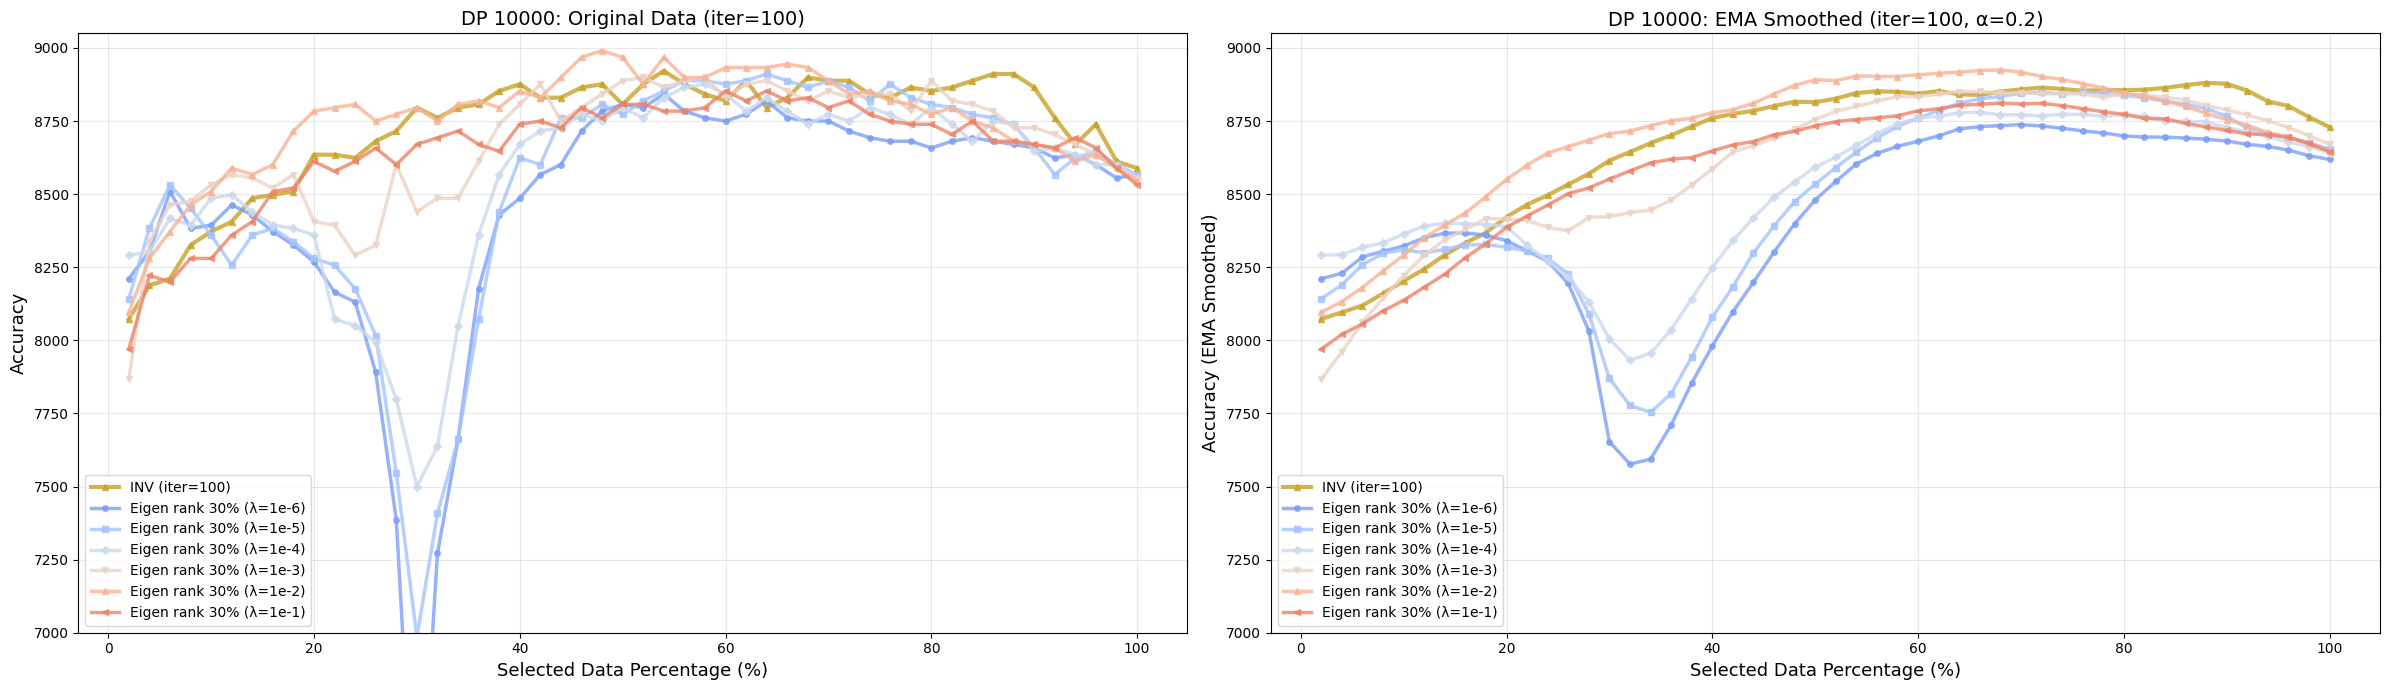

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# ===== Configuration =====
num_dp = 10000
rank = 30
iteration = 500
# =========================

def ema_smooth(data, alpha=0.2):
    """Apply Exponential Moving Average smoothing."""
    ema = [data[0]]
    for i in range(1, len(data)):
        ema.append(alpha * data[i] + (1 - alpha) * ema[-1])
    return ema

selected_dp_percent = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100]

# Prediction with top shapley values
inv_data      = [7397, 7947, 8222, 8429, 8475, 8612, 8578, 8578, 8647, 8704, 8761, 8750, 8773, 8727, 8830, 8865, 8830, 8830, 8853, 8853, 8911, 8911, 8933, 8911, 8956, 8911, 8922, 8922, 8922, 8945, 8956, 8956, 9002, 8933, 8979, 8968, 8968, 8945, 8922, 8945, 8956, 8945, 8922, 8876, 8888, 8888, 8865, 8727, 8693, 8589]
eigen_lam1e_6 = []
eigen_lam1e_5 = []
eigen_lam1e_4 = []
eigen_lam1e_3 = []
eigen_lam1e_2 = []
eigen_lam1e_1 = []

# Prediction with random shapley values
r_inv_data      = [8096, 8154, 8200, 8314, 8257, 8245, 8165, 8188, 8211, 8291, 8291, 8349, 8337, 8372, 8326, 8394, 8303, 8268, 8337, 8337, 8349, 8303, 8314, 8326, 8394, 8383, 8372, 8452, 8440, 8521, 8486, 8578, 8589, 8555, 8555, 8601, 8578, 8612, 8624, 8578, 8544, 8601, 8589, 8555, 8567, 8589, 8612, 8647, 8578, 8589]
r_eigen_lam1e_6 = []
r_eigen_lam1e_5 = []
r_eigen_lam1e_4 = []
r_eigen_lam1e_3 = []
r_eigen_lam1e_2 = []
r_eigen_lam1e_1 = []

# Apply EMA smoothing for top shapley values
alpha = 0.2  # smoothing factor (0.1-0.3 typically works well)
inv_ema = ema_smooth(inv_data, alpha) if inv_data else []
eigen_ema_1e6 = ema_smooth(eigen_lam1e_6, alpha) if eigen_lam1e_6 else []
eigen_ema_1e5 = ema_smooth(eigen_lam1e_5, alpha) if eigen_lam1e_5 else []
eigen_ema_1e4 = ema_smooth(eigen_lam1e_4, alpha) if eigen_lam1e_4 else []
eigen_ema_1e3 = ema_smooth(eigen_lam1e_3, alpha) if eigen_lam1e_3 else []
eigen_ema_1e2 = ema_smooth(eigen_lam1e_2, alpha) if eigen_lam1e_2 else []
eigen_ema_1e1 = ema_smooth(eigen_lam1e_1, alpha) if eigen_lam1e_1 else []

# Apply EMA smoothing for random shapley values
r_inv_ema = ema_smooth(r_inv_data, alpha) if r_inv_data else []
r_eigen_ema_1e6 = ema_smooth(r_eigen_lam1e_6, alpha) if r_eigen_lam1e_6 else []
r_eigen_ema_1e5 = ema_smooth(r_eigen_lam1e_5, alpha) if r_eigen_lam1e_5 else []
r_eigen_ema_1e4 = ema_smooth(r_eigen_lam1e_4, alpha) if r_eigen_lam1e_4 else []
r_eigen_ema_1e3 = ema_smooth(r_eigen_lam1e_3, alpha) if r_eigen_lam1e_3 else []
r_eigen_ema_1e2 = ema_smooth(r_eigen_lam1e_2, alpha) if r_eigen_lam1e_2 else []
r_eigen_ema_1e1 = ema_smooth(r_eigen_lam1e_1, alpha) if r_eigen_lam1e_1 else []

# Create figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(30, 7))

# Lambda configs
lambda_configs_orig = [
    (eigen_lam1e_6, '1e-6', 'o'),
    (eigen_lam1e_5, '1e-5', 's'),
    (eigen_lam1e_4, '1e-4', 'D'),
    (eigen_lam1e_3, '1e-3', 'v'),
    (eigen_lam1e_2, '1e-2', '^'),
    (eigen_lam1e_1, '1e-1', '<'),
]

lambda_configs_ema = [
    (eigen_ema_1e6, '1e-6', 'o'),
    (eigen_ema_1e5, '1e-5', 's'),
    (eigen_ema_1e4, '1e-4', 'D'),
    (eigen_ema_1e3, '1e-3', 'v'),
    (eigen_ema_1e2, '1e-2', '^'),
    (eigen_ema_1e1, '1e-1', '<'),
]

lambda_configs_random_ema = [
    (r_eigen_ema_1e6, '1e-6', 'o'),
    (r_eigen_ema_1e5, '1e-5', 's'),
    (r_eigen_ema_1e4, '1e-4', 'D'),
    (r_eigen_ema_1e3, '1e-3', 'v'),
    (r_eigen_ema_1e2, '1e-2', '^'),
    (r_eigen_ema_1e1, '1e-1', '<'),
]

colors = plt.cm.coolwarm(np.linspace(0.2, 0.8, len(lambda_configs_orig)))

# ===== Left subplot (1,1): Original data =====
ax_left = axes[0]

# Plot baseline (Original)
if inv_data:
    ax_left.plot(selected_dp_percent, inv_data, 
             color='#C9A227', linewidth=3, linestyle='-', 
             label=f'INV (iter={iteration})', marker='^', markersize=5, alpha=0.8)

# Plot eigen with different lambda values (Original)
for i, (data, lam_label, marker) in enumerate(lambda_configs_orig):
    if data:
        ax_left.plot(selected_dp_percent, data, 
                 color=colors[i], linewidth=2.5, linestyle='-', 
                 label=f'Eigen rank {rank}% (λ={lam_label})', 
                 marker=marker, markersize=4, alpha=0.8)

ax_left.set_xlabel('Selected Data Percentage (%)', fontsize=13)
ax_left.set_ylabel('Accuracy', fontsize=13)
ax_left.set_title(f'DP {num_dp}: Original Data (iter={iteration})', fontsize=14)
ax_left.set_ylim(7000, 9050)
ax_left.legend(fontsize=14, loc='best')
ax_left.grid(True, alpha=0.3)

# ===== Middle subplot (1,2): Top Shapley EMA smoothed =====
ax_middle = axes[1]

# Plot baseline (EMA)
if inv_ema:
    ax_middle.plot(selected_dp_percent, inv_ema, 
             color='#C9A227', linewidth=3, linestyle='-', 
             label=f'INV (iter={iteration})', marker='^', markersize=5, alpha=0.8)

# Plot eigen with different lambda values (EMA)
for i, (data, lam_label, marker) in enumerate(lambda_configs_ema):
    if data:
        ax_middle.plot(selected_dp_percent, data, 
                 color=colors[i], linewidth=2.5, linestyle='-', 
                 label=f'Eigen rank {rank}% (λ={lam_label})', 
                 marker=marker, markersize=4, alpha=0.8)

ax_middle.set_xlabel('Selected Data Percentage (%)', fontsize=13)
ax_middle.set_ylabel('Accuracy (EMA Smoothed)', fontsize=13)
ax_middle.set_title(f'DP {num_dp}: Top Shapley EMA Smoothed (iter={iteration}, α={alpha})', fontsize=14)
ax_middle.set_ylim(7000, 9050)
ax_middle.legend(fontsize=14, loc='best')
ax_middle.grid(True, alpha=0.3)

# ===== Right subplot (1,3): Random Shapley EMA smoothed =====
ax_right = axes[2]

# Plot baseline (Random EMA)
if r_inv_ema:
    ax_right.plot(selected_dp_percent, r_inv_ema, 
             color='#C9A227', linewidth=3, linestyle='-', 
             label=f'INV (iter={iteration})', marker='^', markersize=5, alpha=0.8)

# Plot eigen with different lambda values (Random EMA)
for i, (data, lam_label, marker) in enumerate(lambda_configs_random_ema):
    if data:  # Only plot if data exists
        ax_right.plot(selected_dp_percent, data, 
                 color=colors[i], linewidth=2.5, linestyle='-', 
                 label=f'Eigen rank {rank}% (λ={lam_label})', 
                 marker=marker, markersize=4, alpha=0.8)

ax_right.set_xlabel('Selected Data Percentage (%)', fontsize=13)
ax_right.set_ylabel('Accuracy (EMA Smoothed)', fontsize=13)
ax_right.set_title(f'DP {num_dp}: Random Shapley EMA Smoothed (iter={iteration}, α={alpha})', fontsize=14)
ax_right.set_ylim(7000, 9050)
ax_right.legend(fontsize=14, loc='best')
ax_right.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()